Bernat Sort Rufat


Máster en Data Science


Artificial Intelligence for Data Science


# Predicción del precio de venta de la vivienda en la ciudad de Barcelona
<i>Bagging & Boosting Project<i>

## Contexto

Imaginemos que queremos comprar la vivienda en la que residimos de alquiler y nuestro casero nos hace una oferta para comprarle el piso. De cara a tomar esta decisión nos planteamos generar un modelo de machine learning que nos ayude a determinar cuánto debemos pagar por la vivienda. 

## Objetivo

El objetivo es generar un modelo que sea capaz de predecir el precio de venta de una vivienda en base al dataset de venta y posteriormente hacer uso de esa información en el dataset de alquiler.


## Steps

**1. Exploratory Data Analysis**
- Estadística descriptiva y calidad general de los datos.
- Visualización y distribución de la variable objetivo. 
- Distribución de las variables numéricas.
- Relación entre los atributos numéricos y la variable objetivo.

**2. Data pre-processing & Feature engineering (1)**
- Eliminación inicial de variables no relevantes.
- Tratamiento de missing values y creación de nuevas variables.
- Reducción de dimensionalidad de ciertas variables. 

**3. Correlation Analysis**
- Análisis de correlación. 
- Eliminación de variables altamente correlacionadas. 
- Creación de nuevas variables. 

**3. Variables categóricas**
- Distribución de las variables categóricas.
- Relación entre las variables categóricas y la variable objetivo.

**4. Eliminación de variables no útiles (no predictoras)**

**5. Técnicas de reducción de dimensionalidad y Feature Importance**
- PCA
- Mutual Information 
- ANOVA / Kruskall - Wallis
- ExtraTreesRegressor

**6. Test dataset pre-processing**

**7. Modeling**
- Bagging: BaggingRegressor(DecisionTreeRegressor)
- Random Forest: RandomForestRegressor
- Boosting: CatBoostRegressor

**8. SHAP Values Analysis**
- Análisis de Shap values para el modelo de boosting (catboost).

**9. Generación de predicciones y análisis de rentabilidad**
- Entender qué tipos de viviendas son las más rentables para comprar.

**10. Resultados finales, conclusiones y vías abiertas**
- Resultado de R2 para el dataset de validación de nuestro mejor modelo. 
- Limitaciones del modelo. 
- Uso en la vida real.
- Propuestas de mejoras de los resultados obtenidos. 


**TODO**

Análisis exploratorio y limpieza de instancias: 
- Entender bien el dataset y hacer las transformaciones necesarias para entender mejor los datos. Se valorará mediante:

    - Estadística descriptiva y calidad general de los datos.
    - Visualizaciones que ayuxden a entender la distribución de las variables y categorías
    - Visualizaciones que ayuden a entender la relación entre los atributos y la variable objetivo precio_de_venta.
    - Estadísticos que nos ayuden a comprender mejor la relación (PCA, ANOVA, Correlación...).
    - Resumen de las conclusiones sacadas en este punto.

Creación y comparación de modelos: 
- Desarrollo de al menos 1 modelo de Bagging, 1 modelo de Random Forest y 1 modelo de Boosting a escoger entre CATBoost, XGBoost o LightGBM. Cada modelo debe seguir los siguientes pasos:

    - Preprocesamiento de los datos: hacer las transformaciones necesarias para que cada modelo pueda ser entrenado.
    - Split entre training y test.
    - Hiperoptimización de parámetros mediante grid search. En el caso de boosting debemos mostrar las visualizaciones del número de iteraciones con respecto a la variable objetivo para train y test.
    - Entrenamiento del modelo en training mediante 10 Fold Cross Validation.
    - Entrenamiento del modelo con todos los datos de training y validación con test.
    - Comparación de resultados obtenidos tanto en training cómo en test.
    
Como condiciones, el split entre train y test debe ser del 80% - 20% y la métrica de validación debe ser el R2.

Análisis de Shap values para el modelo de boosting escogido:
- Desarrollar un análisis completo de Shap sobre el modelo de boosting desarrollado en el punto anterior.

Generación de predicciones y análisis de rentabilidad:
- Entender qué tipos de viviendas son las más rentables para comprar. Para ello se realizarán los siguientes pasos:
    - Selección del mejor modelo de entre todos los calculados para predecir el precio de la vivienda.
    - Preparación del dataset de alquiler de pisos: el modelo que hemos generado admite datos que hemos transformado previamente (Cambio de variable para la variable objetivo, sustitución de null values, columnas no utilizadas...).
    - Cálculo de las predicciones sobre el dataset de alquiler.
    - Cálculo de la métrica de Break-even, resultante de dividir la predicción del precio de la vivienda por el precio de alquiler por mes.
    - Análisis exploratorio de esta métrica. ¿Qué tipo de viviendas son las más rentables para comprar?, ¿En qué barrios?, ¿Qué condiciones?

Resultados finales, conclusiones y vías abiertas:
- Incluir el resultado de R2 para el dataset de validación de nuestro mejor modelo. 
- Posteriormente, desarrolar los siguientes puntos: ¿Qué limitaciones hemos tenido con nuestro modelo?, ¿Lo utilizaríamos en la vida real?, ¿Cómo podemos mejorar los resultados obtenidos?

## Carga de librerías

In [41]:
import pandas as pd
import numpy as np
import math

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.colors import TwoSlopeNorm
plt.style.use('seaborn-v0_8') 


# Funciones para hacer cálculo estadístico
import pingouin as pg
from scipy import stats
from scipy.stats import jarque_bera
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA


# Data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


# Clustering
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Type hint
from typing import Dict, List, Union, Tuple,Optional


# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics # Calcula métricas para un modelo
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
import catboost
from catboost import CatBoostRegressor

# interactive widgets for Jupyter notebooks (catboost)
import ipywidgets
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension # for the interactive widgets to work properly


# Shap library
import shap
# print the JS visualization code to the notebook 
shap.initjs()

# Define constants that we'll use throughout the notebook:
    # All of the models in this notebook are fitted in a k-fold cross-validation 
    # manner. This constant represents the value of `k`. 
    # The target variable is 'price' for all the models. 
    # Random state = 42 for reproducibility
CROSS_VALIDATION_FOLDS = 10
TARGET_VARIABLE = 'price'
RANDOM_STATE = 42

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [42]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Tipo de problema

- Se trata de un problema de regresión ya que la variable objetivo es el precio de venta de la vivienda (variable numérica). 

- Es supervisado ya que al algoritmo le estamos dando datos etiquetados: le proporcionamos muchas viviendas y le decimos cuánto cuesta cada una. 


## Carga de datos

In [14]:
raw_data = pd.read_csv('sale_Barcelona.csv', delimiter = ',')
display(raw_data.head())
# dimensión del df (filas y columnas)
print(f"{raw_data.shape}\n")
# info de las columnas del df
print(raw_data.info())

id   price currency   latitude  longitude  sq_meters  \
0    320294  150000        €  41.459649   2.174793       63.0   
1   1786997  150000        €  41.422081   2.155370       48.0   
2   1787143  395000        €  41.402928   2.207851       84.0   
3   1976767  540000        €  41.394692   2.144422        NaN   
4  27972575  650000        €  41.398971   2.120754        NaN   

   sq_meters_built  rooms  bathrooms  balcony  terrace  exterior orientation  \
0               67      3          1      NaN      1.0       1.0        este   
1               52      2          1      NaN      NaN       1.0         NaN   
2               91      2          2      NaN      NaN       1.0         NaN   
3              100      3          1      NaN      NaN       1.0         sur   
4              141      3          2      NaN      NaN       1.0        este   

   floor  rooftop  elevator  doorman  pool   ac     heating  year_built  \
0    5.0      NaN       0.0      NaN   NaN  1.0         NaN         NaN   
1    3.0      NaN       0.0      NaN   NaN  1.0  individual         NaN   
2    NaN      NaN       0.0      NaN   NaN  1.0    electric         NaN   
3    1.0      NaN       1.0      NaN   NaN  1.0         NaN         NaN   
4    1.0      NaN       1.0      NaN   NaN  1.0         NaN         NaN   

   quality       city                              neighborhood  \
0        2  Barcelona  Ciutat Meridiana - Torre Baró - Vallbona   
1        2  Barcelona                                 El Carmel   
2        2  Barcelona                               El Poblenou   
3        2  Barcelona                    Sant Gervasi - Galvany   
4        2  Barcelona                                    Sarrià   

   dist_city_center  furniture  garage property_type  garden  \
0          7.990993        NaN     NaN          piso     NaN   
1          3.991000        NaN     NaN          piso     NaN   
2          3.579261        NaN     NaN        duplex     NaN   
3          2.257852        NaN     1.0          piso     NaN   
4          4.283368        NaN     1.0          piso     NaN   

    closest_station  dist_closest_station       created_at         last_seen  
0  Ciutat Meridiana              0.121438   9/3/2021 10:16  11/12/2021 13:50  
1         El Carmel              0.277336   9/3/2021 10:16  11/12/2021 13:50  
2          Poblenou              0.383878  8/30/2021 12:17   8/30/2021 12:17  
3   Hospital Clínic              0.875652   9/1/2021 14:04    9/2/2021 13:50  
4    Maria Cristina              1.310073  8/29/2021 11:47    9/2/2021 11:01

(5847, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5847 non-null   int64  
 1   price                 5847 non-null   int64  
 2   currency              5847 non-null   object 
 3   latitude              5847 non-null   float64
 4   longitude             5847 non-null   float64
 5   sq_meters             3274 non-null   float64
 6   sq_meters_built       5847 non-null   int64  
 7   rooms                 5847 non-null   int64  
 8   bathrooms             5847 non-null   int64  
 9   balcony               2210 non-null   float64
 10  terrace               1428 non-null   float64
 11  exterior              4770 non-null   float64
 12  orientation           3134 non-null   object 
 13  floor                 3765 non-null   float64
 14  rooftop               407 non-null    float64
 15  elevator 

## Descripción del dataset

|Columna|Descripción|Key|
|--|--|--|
|id|Identificador numérico de la vivienda||
|price|Precio de mercado de la vivienda||
|currency|Moneda|Euros|
|latitude|Latitud de las coordenadas geográficas de la vivienda||
|longitude|Longitud de las coordenadas geográficas de la vivienda||
|sq_meters|Metros cuadrados de la vivienda||
|sq_meters_built|Metros cuadrados construídos de la vivienda||
|rooms|Número de habitaciones||
|bathrooms|Número de baños||
|balcony|Indicador si la vivienda tiene balcón|1, 0|
|terrace|Indicador si la vivienda tiene terraza|1, 0|
|exterior|Indicador si la vivienda tiene una orientación exterior o interior en el edificio|1, 0|
|orientation|Orientación principal de la vivienda|norte, sur, este, oeste|
|floor|Piso de la vivienda||
|rooftop|Indicador si la vivienda es un ático|1, 0|
|elevator|Indicador si el edificio de la vivienda tiene ascensor|1, 0|
|doorman|Indicador si el edificio tiene portero|1,0|
|pool|Indicador si la vivienda cuenta con piscina o derecho de uso de piscina|1,0|
|ac|Indicador si tiene aire acondicionado|1,0|
|heating|Indicador si tiene calefacción|bomba, electric, gas, individual|
|year_built|Año de construcción||
|quality|Indicador de calidad de la vivienda|2 - En buen estado|
|city|Ciudad de la vivienda||
|neighborhood|Barrio de la vivienda||
|dist_city_center|Distancia en kilómetros al centro de la ciudad||
|furniture|Indicador si la vivienda cuenta con mobiliario|1: Sin Equipar; 2: Cocina Equipada; 3: Amueblado|
|garage|Indicador si la vivienda tiene garage|1, 0|
|property_type|Tipo de vivienda||
|garden|Indicador si la vivienda cuenta con jardín|1,0|
|closest_station|Nombre de la estación de metro más cercana||
|dist_closest_station|Distancia en kilómetros a la estación de metro más cercana||
|created_at|Fecha de creación del anuncio||
|last_seen|Fecha última en la que el anuncio fue publicado en la web||


## Separación de datasets en train y test

El primer paso debe ser separar los datos en conjuntos de train y test. Los separaremos en distintos archivos CSV, y el dataset de test de momento no lo trataremos (nos olvidamos de él por el momento). Esto lo hacemos de esta forma porque cada vez que se toca el conjunto de datos antes de dividirlo, se corre el riesgo de que se filtren datos ('data leakage'). El data leakage es hacer trampas, nuestro modelo parecerá mejor de lo que realmente es. 

Por tanto, primero preprocesamos y transformamos el dataset de train. Luego, por separado, aplicamos el mismo preprocesamiento y transformación al dataset de test. Una vez procesados los datasets de train y test por separado, podremos aplicar los algoritmos de bagging, random forests y boosting. 

In [4]:
# Separar los datos en conjuntos de train y test (80-20)
train_data, test_data = train_test_split(raw_data, test_size=0.2, random_state=42)

# Guardar los conjuntos de datos en archivos CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Cargamos el train dataset: 

In [8]:
sale_df = pd.read_csv('train_data.csv', delimiter = ',')
print("Full train dataset shape is {}".format(sale_df.shape))

Full train dataset shape is (4677, 33)


## Exploratory Data Analysis (EDA)

### Exploración ràpida

In [4]:
def explore_data(df: pd.DataFrame) -> None:
    """
    Takes in a pandas DataFrame and performs exploratory data analysis.

    Parameters:
    -----------
    df: pandas DataFrame
        The DataFrame to be analyzed.

    Returns:
    --------
    None
    """

    # Print the dimensions of the DataFrame
    print(f"The dataset includes {df.shape[0]} instances (rows) and {df.shape[1]} variables (columns).\n")

    # Display the first few rows of the DataFrame
    display(df.head())
    print("\n")

    # Print the column information for the DataFrame
    print(df.info())
    print("\n")
    
    # Check missing values
    print(f"Missing values: \n{df.isna().sum()}")
    print("\n")

    # Select only the numeric features
    numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns

    # Calculate the descriptive statistics for the numeric variables
    display(df[numeric_vars].describe())
    
    # Check duplicates
    print(f"\n Number of duplicates: {df.duplicated().sum()}")


In [40]:
explore_data(sale_df)

The dataset includes 4677 instances (rows) and 33 variables (columns).



id    price currency   latitude  longitude  sq_meters  \
0  85122800  2290000        €  41.409071   2.099850      383.0   
1  95206437    90000        €  41.434545   2.171110       42.0   
2  94361131   145000        €  41.444518   2.175309        NaN   
3  95156089   675000        €  41.392209   2.153368       93.0   
4  94994259   319000        €  41.413385   2.162246        NaN   

   sq_meters_built  rooms  bathrooms  balcony  terrace  exterior orientation  \
0              532      5          6      1.0      1.0       NaN         sur   
1               50      1          1      NaN      NaN       1.0       norte   
2               53      3          1      1.0      NaN       1.0         NaN   
3              120      4          2      NaN      1.0       NaN       norte   
4               69      3          1      NaN      NaN       1.0         NaN   

   floor  rooftop  elevator  doorman  pool   ac     heating  year_built  \
0    4.0      NaN       NaN      NaN   1.0  1.0  individual      2002.0   
1    NaN      NaN       1.0      NaN   NaN  1.0       bomba      1960.0   
2    2.0      NaN       0.0      NaN   NaN  NaN         NaN         NaN   
3    NaN      1.0       1.0      NaN   NaN  1.0  individual      1967.0   
4    8.0      1.0       1.0      NaN   NaN  NaN         NaN      1952.0   

   quality       city                            neighborhood  \
0        2  Barcelona  Vallvidrera - El Tibidabo i les Planes   
1        2  Barcelona       Can Peguera - El Turó de la Peira   
2        2  Barcelona                                  Verdun   
3        2  Barcelona         L'Antiga Esquerra de l'Eixample   
4        2  Barcelona                        El Baix Guinardó   

   dist_city_center  furniture  garage         property_type  garden  \
0          6.302847        NaN     1.0  chalet_independiente     1.0   
1          5.189265        NaN     NaN                  piso     NaN   
2          6.313668        NaN     NaN                  piso     NaN   
3          1.462060        NaN     NaN                 atico     NaN   
4          2.906147        NaN     NaN                  piso     NaN   

      closest_station  dist_closest_station       created_at         last_seen  
0  Zona Universitària              2.949904  8/28/2021 22:42   8/29/2021 17:23  
1           Llucmajor              0.329115  10/3/2021 22:52  11/12/2021 16:40  
2           Via Júlia              0.284071   9/3/2021 10:47  10/23/2021 22:21  
3     Hospital Clínic              0.443717   9/2/2021 13:50    9/2/2021 13:50  
4            Alfons X              0.371854  8/30/2021 12:17   8/30/2021 12:17



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4677 non-null   int64  
 1   price                 4677 non-null   int64  
 2   currency              4677 non-null   object 
 3   latitude              4677 non-null   float64
 4   longitude             4677 non-null   float64
 5   sq_meters             2589 non-null   float64
 6   sq_meters_built       4677 non-null   int64  
 7   rooms                 4677 non-null   int64  
 8   bathrooms             4677 non-null   int64  
 9   balcony               1759 non-null   float64
 10  terrace               1121 non-null   float64
 11  exterior              3803 non-null   float64
 12  orientation           2524 non-null   object 
 13  floor                 2997 non-null   float64
 14  rooftop               324 non-null    float64
 15  elevator           

id         price     latitude    longitude    sq_meters  \
count  4.677000e+03  4.677000e+03  4677.000000  4677.000000  2589.000000   
mean   9.351317e+07  3.581391e+05    41.406605     2.168259    70.815759   
std    6.171778e+06  4.965949e+05     0.026132     0.022778    48.171348   
min    3.202940e+05  2.800000e+04    41.355002     2.092727     3.000000   
25%    9.379396e+07  1.350000e+05    41.382507     2.153542    48.000000   
50%    9.498449e+07  1.870000e+05    41.404373     2.170357    60.000000   
75%    9.513342e+07  3.900000e+05    41.424723     2.180815    78.000000   
max    9.589391e+07  9.500000e+06    41.465303     2.220785   689.000000   

       sq_meters_built        rooms    bathrooms  balcony  terrace  \
count      4677.000000  4677.000000  4677.000000   1759.0   1121.0   
mean         86.017746     2.581997     1.411375      1.0      1.0   
std          67.622299     1.161822     0.794350      0.0      0.0   
min          13.000000     0.000000     1.000000      1.0      1.0   
25%          55.000000     2.000000     1.000000      1.0      1.0   
50%          68.000000     3.000000     1.000000      1.0      1.0   
75%          92.000000     3.000000     2.000000      1.0      1.0   
max         970.000000    11.000000     9.000000      1.0      1.0   

          exterior        floor  rooftop     elevator  doorman   pool      ac  \
count  3803.000000  2997.000000    324.0  4207.000000      0.0  124.0  2108.0   
mean      0.868788     3.184518      1.0     0.625862      NaN    1.0     1.0   
std       0.337677     2.267269      0.0     0.483957      NaN    0.0     0.0   
min       0.000000     1.000000      1.0     0.000000      NaN    1.0     1.0   
25%       1.000000     1.000000      1.0     0.000000      NaN    1.0     1.0   
50%       1.000000     3.000000      1.0     1.000000      NaN    1.0     1.0   
75%       1.000000     4.000000      1.0     1.000000      NaN    1.0     1.0   
max       1.000000    25.000000      1.0     1.000000      NaN    1.0     1.0   

        year_built  quality  dist_city_center  furniture  garage  garden  \
count  3262.000000   4677.0       4677.000000        0.0   322.0    50.0   
mean   1954.382281      2.0          3.502737        NaN     1.0     1.0   
std      36.387571      0.0          2.034107        NaN     0.0     0.0   
min    1777.000000      2.0          0.075001        NaN     1.0     1.0   
25%    1940.000000      2.0          1.749035        NaN     1.0     1.0   
50%    1964.000000      2.0          3.361964        NaN     1.0     1.0   
75%    1972.000000      2.0          4.915237        NaN     1.0     1.0   
max    2021.000000      2.0          8.627149        NaN     1.0     1.0   

       dist_closest_station  
count           4677.000000  
mean               0.360227  
std                0.283624  
min                0.003595  
25%                0.212806  
50%                0.311484  
75%                0.421032  
max                4.203571


 Number of duplicates: 0


Información de las columnas: 
- Observamos que sq_meters, balcony, terrace, exterior, orientation, floor, rooftop, elevator, pool, ac, heating, year_built, garage, property_type y garden tienen missing values. 
- Las columnas doorman y furniture están vacías (todas las instancias están vacías). 
- En realidad, balcony, terrace, exterior, rooftop, elevator, pool, ac, garage y garden son variables categóricas. Por lo tanto, las convertiremos de numéricas a categóricas una vez hayamos tratado los missing values.  

El método df.describe() genera estadísticas descriptivas de un df. Obtenemos el recuento, la media, la desviación estándar, el mínimo, el primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el máximo de cada columna.

Esta información puede ser útil para comprender la distribución y el rango de valores de cada columna numérica del df.

Por ejemplo, podemos observar que: 
- El precio medio de las viviendas es de 358139 €, con una desviación típica de 496594 €. El precio mínimo es de 28000 € y el máximo de 9500000 €. Esto indica que existe una gran variación en los precios de las viviendas del dataset: el conjunto de datos incluye tanto propiedades muy baratas como muy caras.

- La propiedad más antigua del conjunto de datos se construyó en 1777, y la más reciente, en 2021.

- La superficie media de las propiedades (en metros cuadrados) es de 70.81 metros cuadrados, con una desviación típica de 48.17 metros cuadrados. La superficie mínima es de 3 metros cuadrados (muy pequeña), y la máxima, de 689 metros cuadrados (muy grande).

### Variable objetivo (price)

La variable objetivo en este caso es la columna "price", que indica el precio de mercado de la vivienda. Es decir, la variable que queremos predecir con nuestros modelos de machine learning.





Definimos la varable objetivo como una constante en el apartado de carga de librerías: TARGET_VARIABLE = 'price'

**Histograma**

Histograma para entender la distribución del precio. 

In [360]:
def plot_histogram(data: pd.DataFrame, variable: str) -> None:
    """
    Creates a histogram of a given variable in a given DataFrame.

    Parameters:
    -----------
    data : pandas DataFrame
        The DataFrame containing the target variable to be plotted.
    target_variable : str
        The name of the target variable to be plotted.

    Returns:
    --------
    None
    """

    fig, axs = plt.subplots(figsize=(10, 5))
    sns.histplot(data[variable])
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuency')
    plt.show()

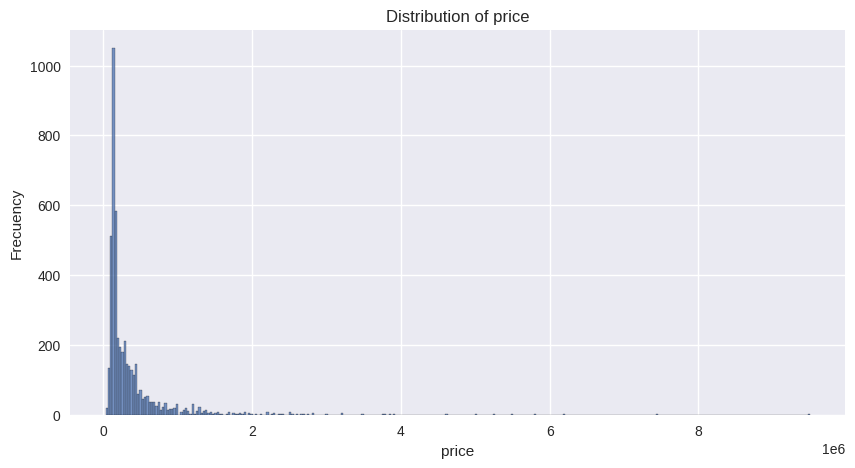

In [54]:
# Histograma de la variable precio
plot_histogram(sale_df, TARGET_VARIABLE)

**Boxplot**

Boxplot para ver si existen valores atípicos (outliers).

In [80]:
def plot_boxplot(data: pd.DataFrame, target_variable: str, show_outliers: bool = False) -> None:
    """
    Creates a boxplot of a given variable in a given DataFrame.

    Parameters:
    -----------
    data : pandas DataFrame
        The DataFrame containing the target variable to be plotted.
    target_variable : str
        The name of the target variable to be plotted.
    show_outliers : bool, optional (default=False)
        Whether to show or hide the outliers in the boxplot.

    Returns:
    --------
    None
    """

    sns.set(rc={"figure.figsize": (10, 5)}, style='whitegrid')  
    if show_outliers:
        b = sns.boxplot(x=data[target_variable],
                      palette ='pastel') 
    else:
        b = sns.boxplot(x=data[target_variable],
                      palette ='pastel', 
                      showfliers = False)

    b.set_xlabel(target_variable, fontsize=14)
    b.set_title(f"Boxplot of {target_variable} ({'showing outliers' if show_outliers else 'without showing outliers'})", fontsize=16)

    for patch in b.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .4))

    plt.show()

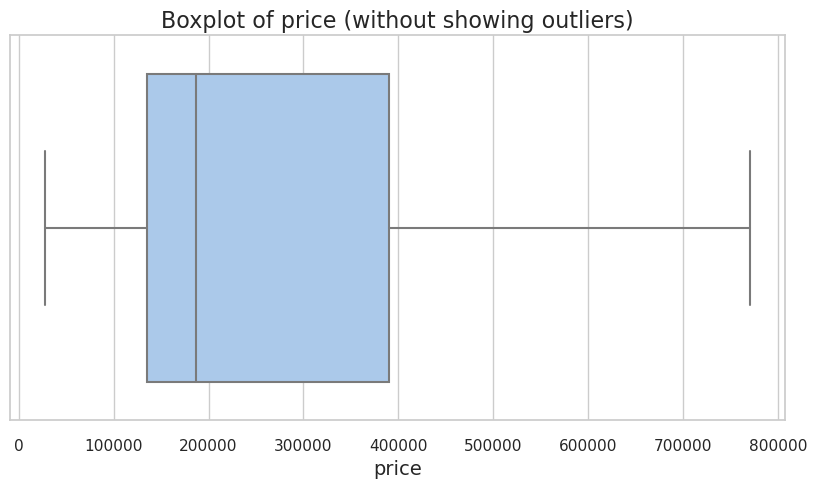

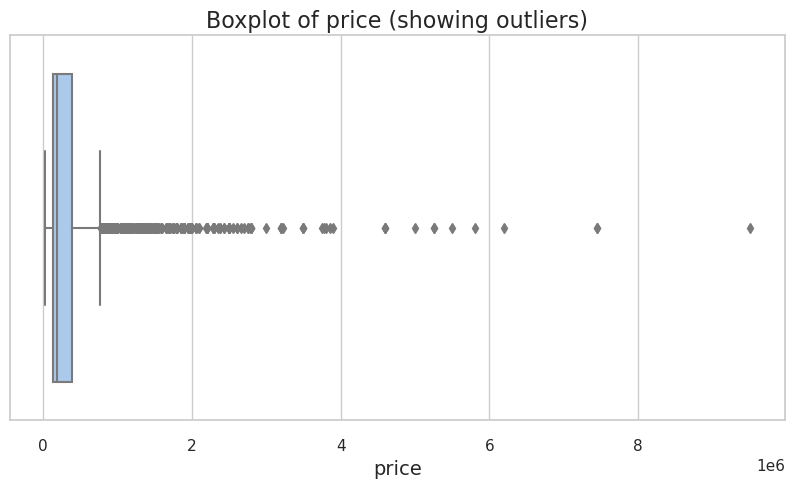

In [81]:
# boxplot sin mostrar outliers
plot_boxplot(sale_df, TARGET_VARIABLE, show_outliers = False)
# boxplot mostrando outliers
plot_boxplot(sale_df, TARGET_VARIABLE, show_outliers = True)

**Estadísticas descriptivas**

In [82]:
# Estadísticas descriptivas de la variable precio
sale_df[TARGET_VARIABLE].describe()

count    4.677000e+03
mean     3.581391e+05
std      4.965949e+05
min      2.800000e+04
25%      1.350000e+05
50%      1.870000e+05
75%      3.900000e+05
max      9.500000e+06
Name: price, dtype: float64

- El precio medio de las viviendas es de 358139 €, con una desviación típica de 496594 €. El precio mínimo es de 28000 € y el máximo de 9500000 €. Esto indica que existe una gran variación en los precios de las viviendas del dataset: el conjunto de datos incluye tanto propiedades muy baratas como muy caras.

- El 50% de las propiedades tienen un precio entre 135000 y 390000 €, el 25% de las propiedades son más baratas que 135000 € y el 25% son más caras que 390000 €. 

- También se puede observar que la distribución del precio es asimétrica (asimetría positiva) y que hay una gran diferencia entre el precio medio y el precio máximo, lo que sugiere que hay valores atípicos o outliers, como se observar en el boxplot y en el histograma. 

### Distribución de las variables numéricas

Exploramos la distribución de las variables numéricas. La distribución de las variables categóricas la exploraremos más adelante, una vez hayamos tratado los missing values, para poder ver la distribución correctamente. 

In [126]:
# variables numéricas
numeric_vars: List[str] = sale_df[['price', # target
                                   'sq_meters_built',
                                   'sq_meters',
                                   'rooms',
                                   'bathrooms',
                                   'floor',
                                   'year_built',
                                   'dist_city_center',
                                   'dist_closest_station',
                                   'latitude',
                                   'longitude']].columns

# variables numéricas (sin la variable objetivo price)
numeric_vars_no_target: List[str] = sale_df[['sq_meters_built',
                                             'sq_meters',
                                             'rooms',
                                             'bathrooms',
                                             'floor',
                                             'year_built',
                                             'dist_city_center',
                                             'dist_closest_station',
                                             'latitude',
                                             'longitude']].columns

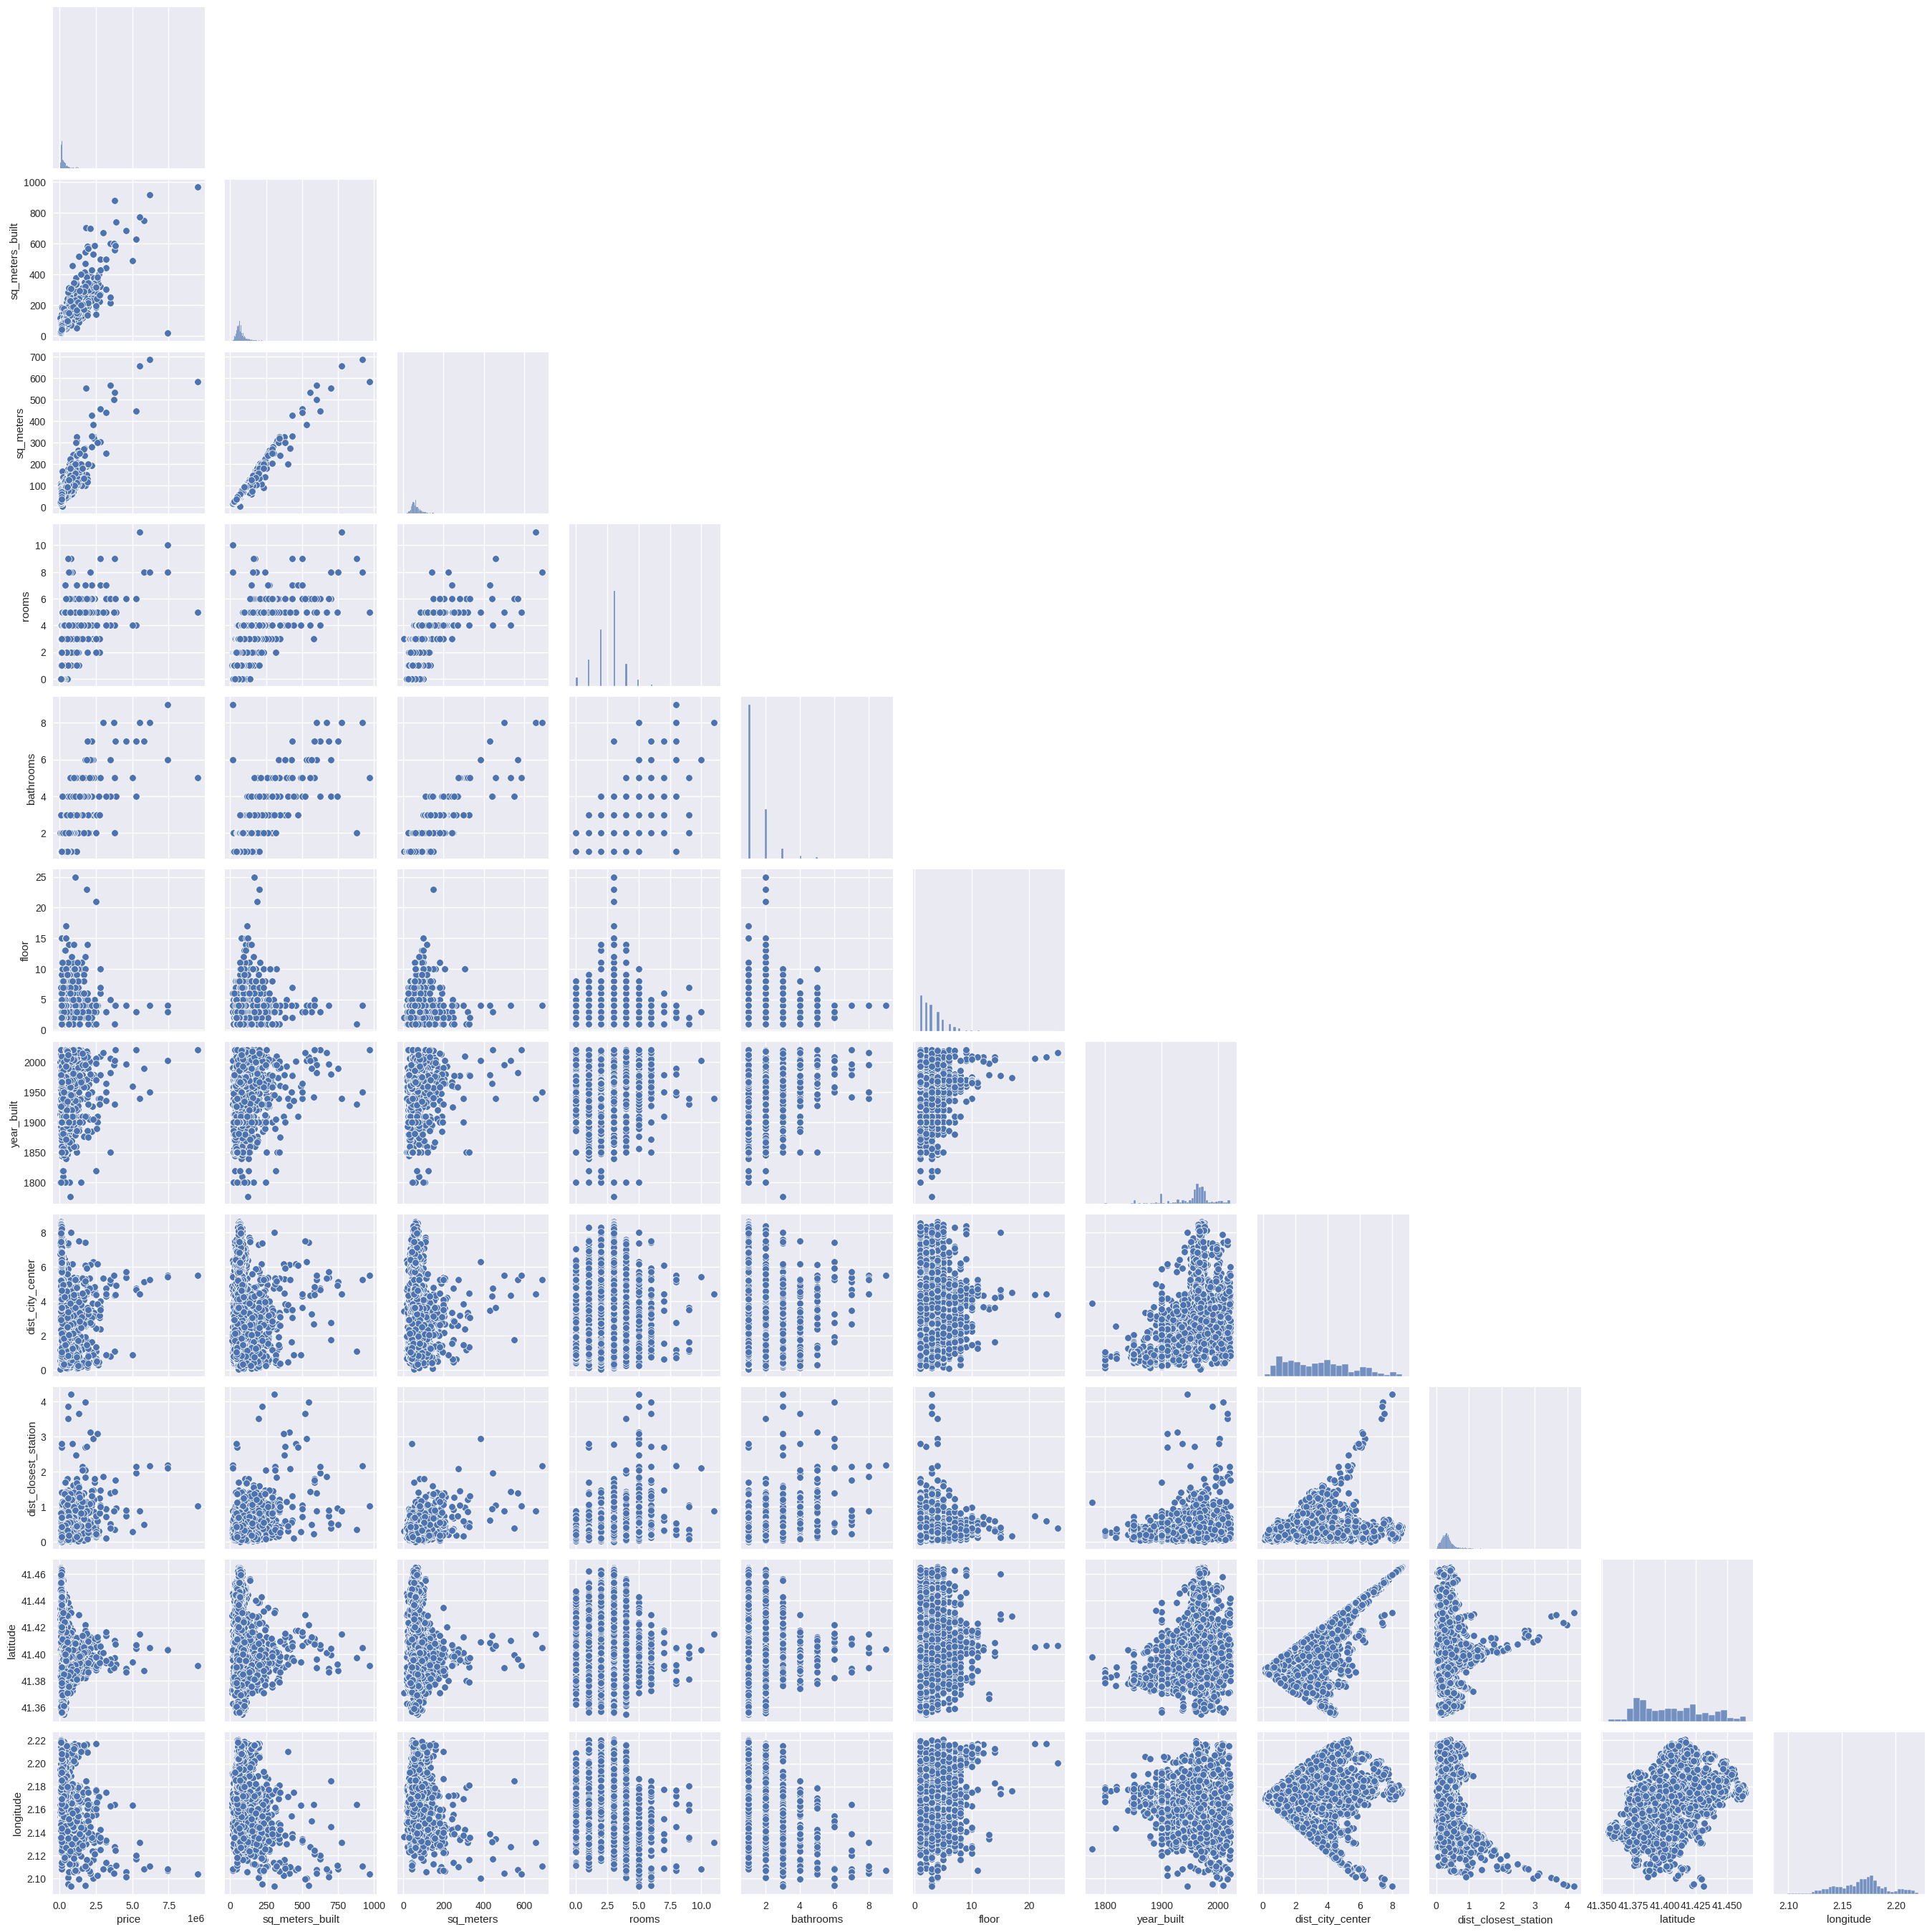

In [97]:
# gráfico de pares para todas las variables numéricas
plt.style.use('seaborn-v0_8') 
sns.pairplot(sale_df[numeric_vars], corner=True)
plt.show()

- Cada punto en el gráfico representa una observación y la distribución conjunta de dos variables se muestra en los paneles de diagonal.
- Los paneles no diagonales muestran una dispersión bidimensional de dos variables.

- Parece que hay una relación lineal entre sq_meters y sq_meters_build. 

- También parece que que cuántos más metros cuadrados habitables (y construídos) de la vivienda, más alto es el precio de la vivienda. 

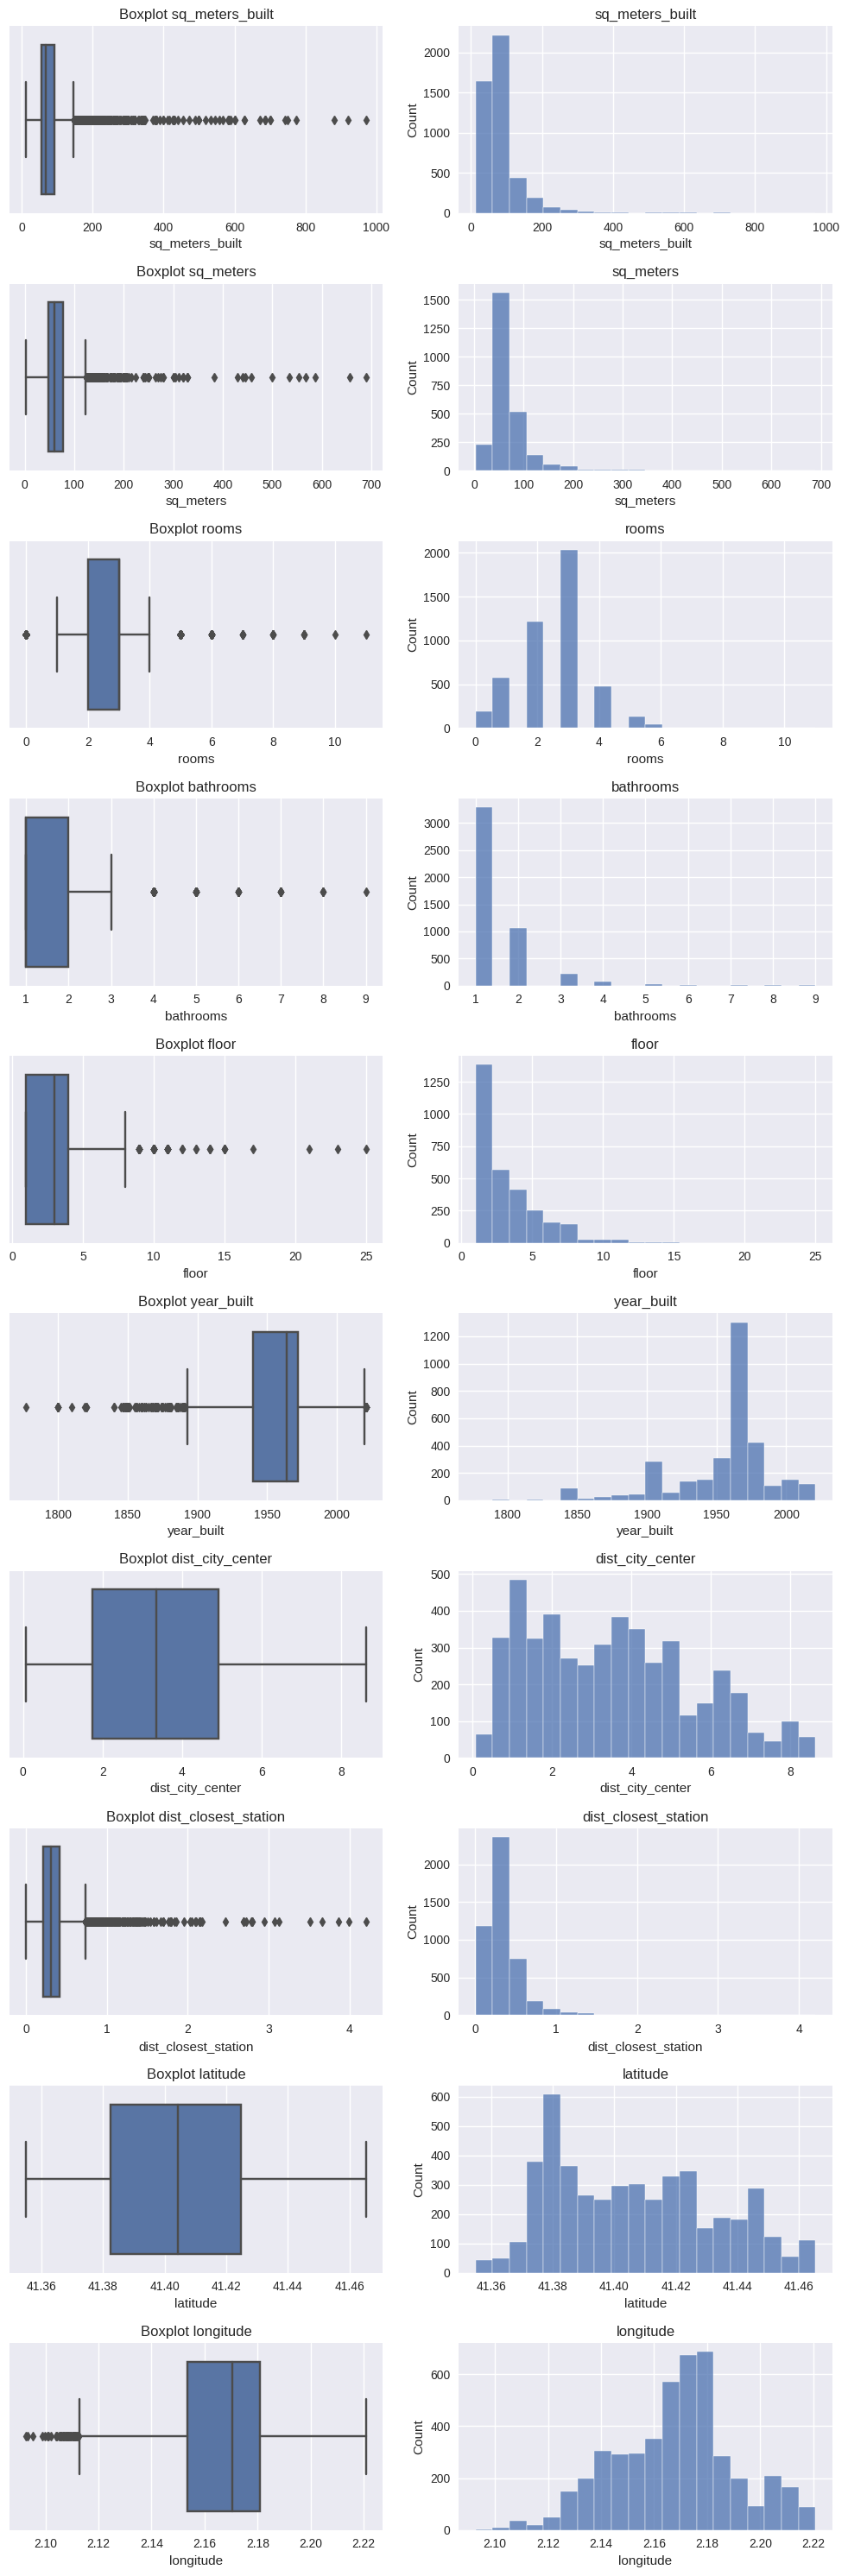

In [102]:
# crear subplots con 5 filas y 2 columnas
plt.style.use('seaborn-v0_8') 
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 30))

# aplanar la matriz de subplots para iterar más fácilmente
axes = axes.flatten()

# iterar por cada variable y crear un histograma y boxplot en el subplot correspondiente
for i, col in enumerate(sale_df[numeric_vars_no_target].columns):
    ax = axes[i*2+1]
    sns.histplot(ax=ax, data=sale_df[numeric_vars_no_target], x=col, bins=20)
    ax.set_title(col)
    
    ax = axes[i*2]
    sns.boxplot(ax=ax, data=sale_df[numeric_vars_no_target], x=col, showfliers = True)
    ax.set_title("Boxplot " + col)

# ajustar el espacio entre los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

- Observamos una asimetría positiva en las variables sq_meters_built, sq_meters, floor y dist_closest_station.

- Rooms y longitude parecen seguir una distribución normal.

- Observamos outliers en la mayoría de variables numéricas.  


### Relación entre los atributos numéricos y la variable objetivo price

Exploramos la distribución entre las variables numéricas y la variable objetivo price. La distribución entre las variables categóricas y la variable objetivo price la exploraremos más adelante, una vez hayamos tratado los missing values y hayamos hecho feature engineering. 

**Scatter plots**

In [156]:
def scatter_plots(df: pd.DataFrame, 
                  target: str,
                  numeric_vars: List[str], 
                  figsize: Tuple[int, int]=(15,20)) -> None:
    """
    Creates scatter plots for each numeric variable in the given DataFrame (excluding the target variable).
    
    Args:
    - df: Pandas DataFrame.
    - target: Name of the target variable.
    - numeric_vars: List of names of the numeric variables to plot.
    - figsize: Tuple indicating the size of the figure to create.
    
    Returns: None.
    """
    
    # Create subplots with number of rows and columns based on number of numeric variables
    n_vars = len(numeric_vars)
    n_rows = (n_vars - 1) // 2 + 1
    fig, axs = plt.subplots(n_rows, 2, figsize=figsize)
    
    # Flatten the matrix of subplots for easier iteration
    axs = axs.flatten()
    
    # Iterate over each variable and create a scatter plot on the corresponding subplot
    for i, col in enumerate(numeric_vars):
        ax = axs[i]
        ax.scatter(df[col], df[target], alpha=0.2)
        ax.set_title(f"Relationship between {col} and {target}")
        ax.set_xlabel(col)
        ax.set_ylabel(target)
        
    # Adjust the space between the subplots and remove empty plot if number of variables is odd
    plt.tight_layout()
    if n_vars % 2 != 0:
        axs[-1].remove()
        
    # Show the plot
    plt.show()


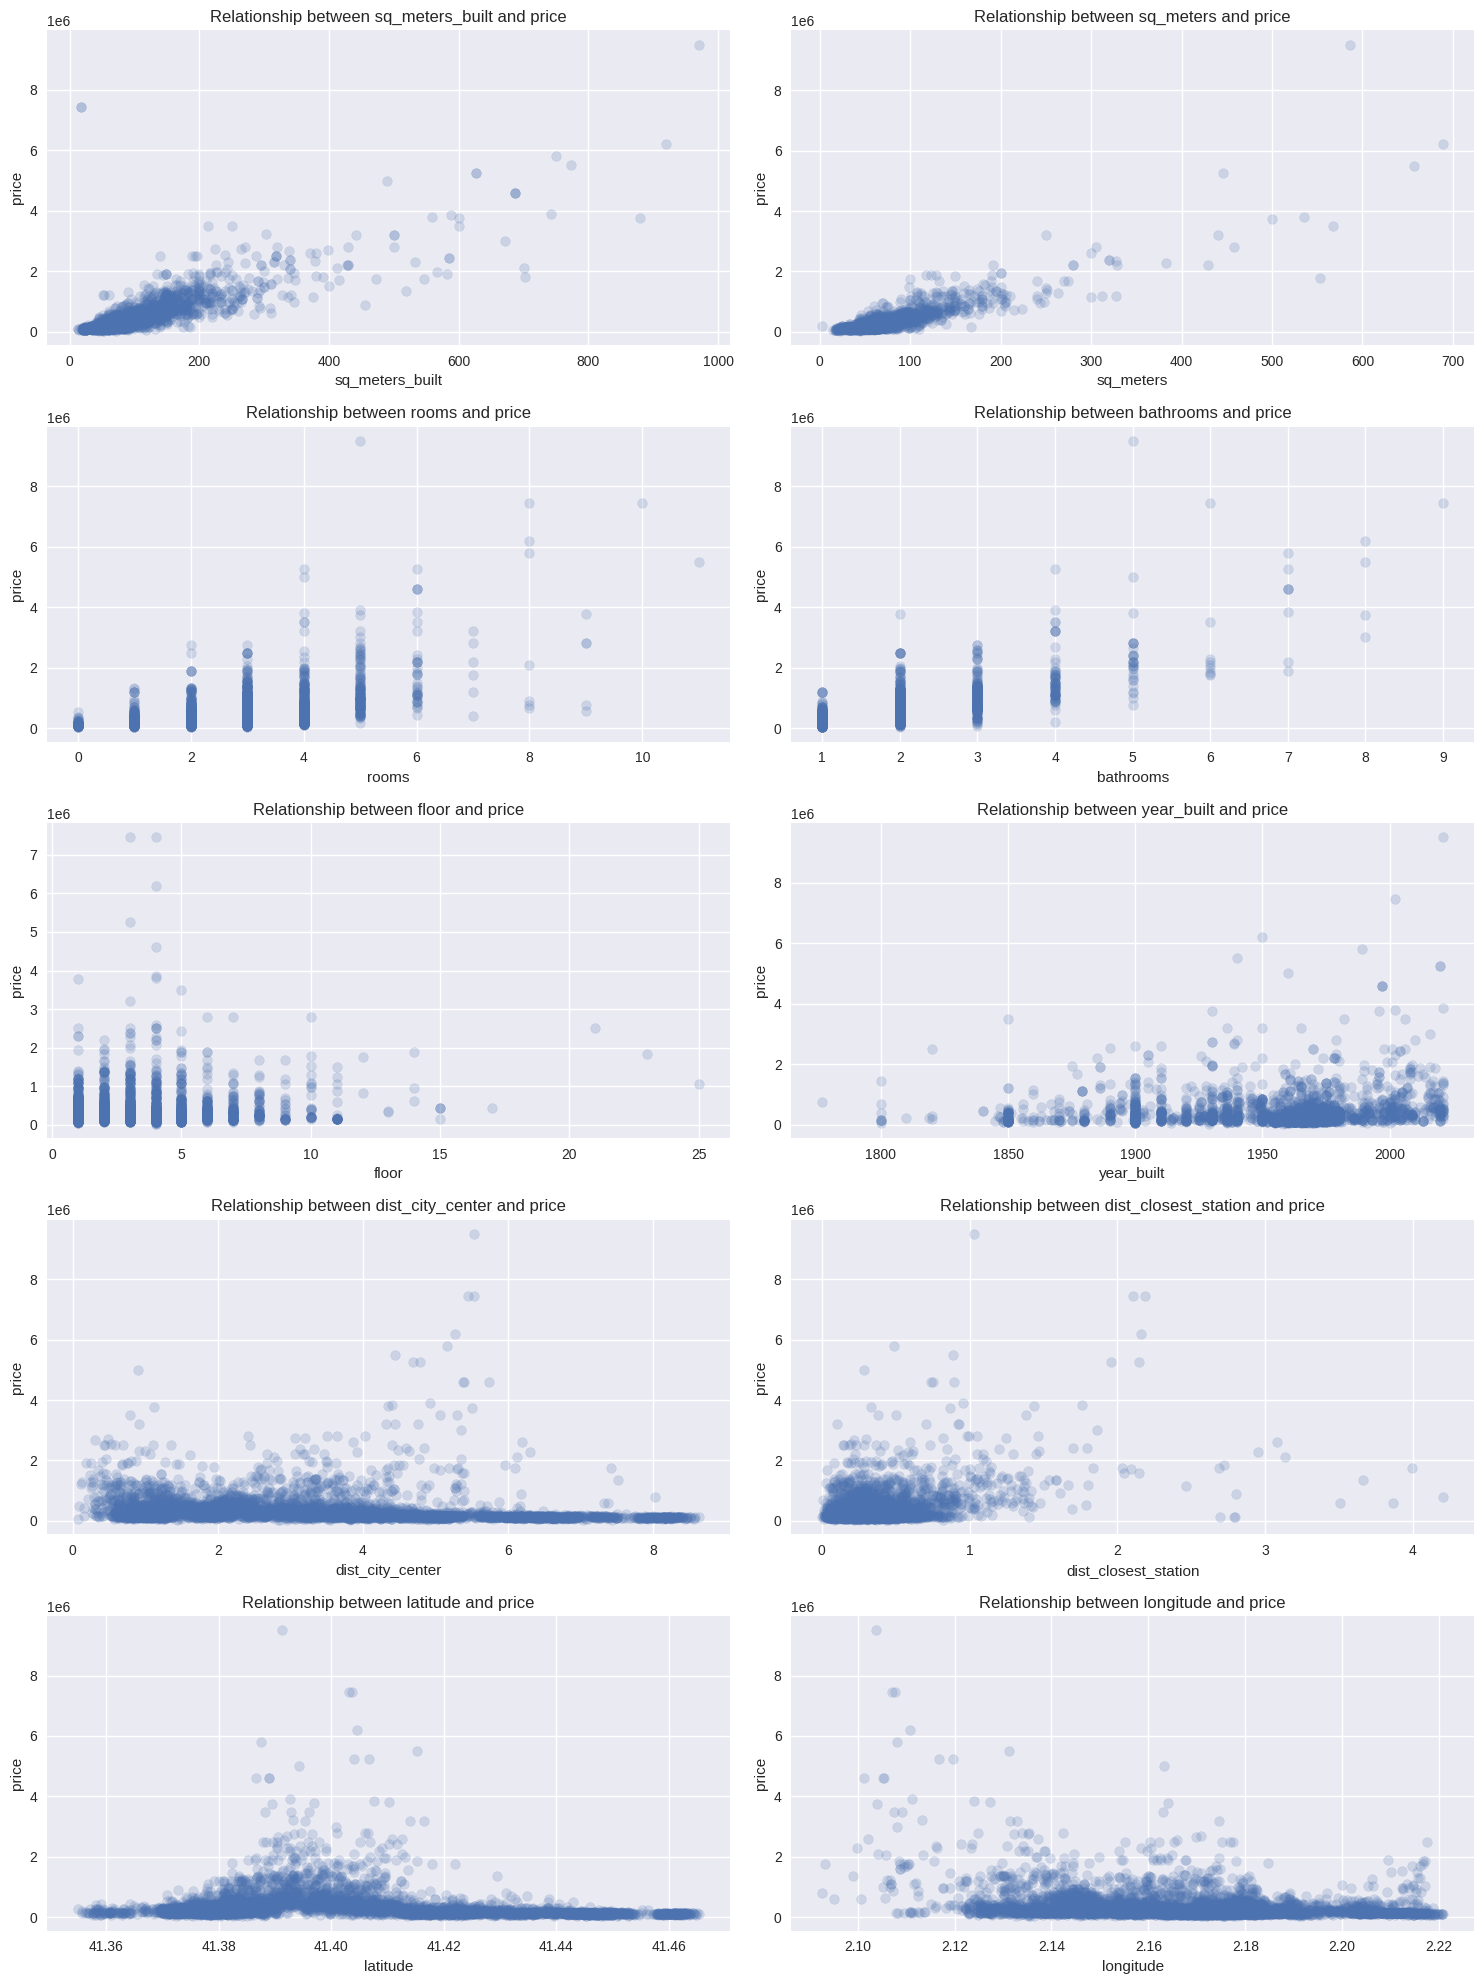

In [158]:
scatter_plots(sale_df, TARGET_VARIABLE, numeric_vars_no_target)

- Parece ser que cuántos más metros cuadrados habitables de la vivienda (y construídos), más alto es el precio de la vivienda. 

## Data pre-processing & Feature engineering (1)

### Eliminación inicial de variables no relevantes 

Lo que nos interesa de este dataset es el precio y todo lo que nos ayude a predecir el precio. El resto, lo eliminaremos.
Por tanto, retiramos las variables que no nos importan para el modelo.

Miramos las variables que tienen el mismo valor en todas las filas:

In [162]:
def find_constant_variables(df: pd.DataFrame) -> list:
    """
    Returns a list of column names that have the same value in all rows of the dataframe
    
    Parameters:
    df (pandas dataframe): input dataframe
    
    Returns:
    list: list of column names that have the same value in all rows
    """
    constant_vars = []
    for col in df.columns:
        if df[col].nunique() == 1:
            constant_vars.append(col)
    return constant_vars

In [163]:
find_constant_variables(sale_df)

['currency',
 'balcony',
 'terrace',
 'rooftop',
 'pool',
 'ac',
 'quality',
 'city',
 'garage',
 'garden']

Balcony, terrace, rooftop, pool, ac, garage y garden son binarias (0 y 1) y solo hay el valor 1 ya que los 0 no se han puesto debido a que la casa no disponía de estas características y simplemente los propietarios no lo especificaron. Por tanto, exploramos las demás: 

In [159]:
# checking 'quality'
raw_data['quality'].value_counts()

2    5847
Name: quality, dtype: int64

In [160]:
# checking 'city'
raw_data['city'].value_counts()

Barcelona    5847
Name: city, dtype: int64

In [161]:
# checking 'currency'
raw_data['currency'].value_counts()

 €    5847
Name: currency, dtype: int64

Inicialmente eliminamos: 
- id: identificador único para cada propiedad y no aporta información relevante para el modelo.
- currency: dado que todos los precios están en euros, esta variable no aporta información relevante para el modelo.
- doorman: instancia vacía, podemos eliminarla. 
- quality: todas las viviendas están en buen estado (quality = 2).
- city: todas las viviendas están en Barcelona.
- furniture: instancia vacía, podemos eliminarla. 
- closest_station:  nos quedamos con dist_closest_station.
- created_at y last_seen: no aportan información relevante para el modelo de predicción del precio de la propiedad, ya que se refieren a la fecha de creación y última visualización del anuncio y no a las características de la propiedad en sí.

In [294]:
# creamos un nuevo df:
    # deep=True para asegurarnos de que los cambios realizados en el nuevo df 
    # no afecten al df original (objeto nuevo e independiente que no 
    # haga referencia a los mismos datos que el original)
sale_clean_df = sale_df.copy(deep=True)

# variables que no nos interesan
not_useful_vars = ['id', 
                   'doorman', 
                   'quality', 
                   'city', 
                   'currency', 
                   'furniture', 
                   'closest_station',
                   'created_at',
                   'last_seen'
                  ]
# eliminamos las variables que no nos interesan
sale_clean_df.drop(not_useful_vars, axis=1, inplace=True)

# Print the dimensions of the DataFrame
print(f"The dataset includes {sale_clean_df.shape[0]} instances (rows) and {sale_clean_df.shape[1]} variables (columns).\n")

The dataset includes 4677 instances (rows) and 24 variables (columns).



### Tratamiento de missing values y creación de nuevas variables

Miramos qué columnas tienen missing values: 

In [295]:
def count_null_values(df: pd.DataFrame) -> None:
    """
    Print the names of any columns in a Pandas DataFrame that contain null values, and the number of null values in each column.
    Also plots a bar chart showing the number of null values for each variable in the DataFrame.

    Parameters:
    -----------
    df: pd.DataFrame
        The DataFrame to check for null values.
    """
    null_counts = df.isnull().sum()
    null_vars = null_counts[null_counts != 0].index.tolist()
    
    if null_vars:
        print("Variables con valores nulos:\n")
        for var in null_vars:
            print(f"\t- '{var}':  {null_counts[var]}")

        # plot the number of null values for each variable
        fig, ax = plt.subplots(figsize=(8, 4))
        null_counts[null_vars].plot(kind='bar', ax=ax)
        ax.set_title('Number of missing values per variable')
        ax.set_xlabel('Variable')
        ax.set_ylabel('Count')
        plt.show()

    else:
        print("No se encontraron valores nulos en el dataset.\n")

Variables con valores nulos:

	- 'sq_meters':  2088
	- 'balcony':  2918
	- 'terrace':  3556
	- 'exterior':  874
	- 'orientation':  2153
	- 'floor':  1680
	- 'rooftop':  4353
	- 'elevator':  470
	- 'pool':  4553
	- 'ac':  2569
	- 'heating':  1986
	- 'year_built':  1415
	- 'garage':  4355
	- 'property_type':  2
	- 'garden':  4627


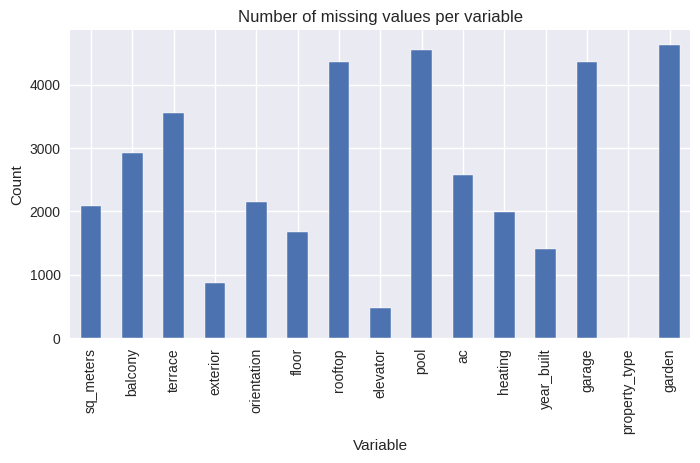

In [296]:
# columnas con missing values
count_null_values(sale_clean_df)

#### Binary variables

Los datos vienen de un portal immobiliario y habrá campos obligatorios y otros opcionales. 

Por ejemplo, en el caso de si la casa tiene piscina o no, los que tengan piscina van a poner que sí tienen piscina, pero los que no, tienen la opción de poner “NO” o no poner nada. Por tanto, el usuario no va a poner nada. En este caso, la transformación de los valores nulos a 0 es correcta para las variables numéricas porque van a ser vectores binarios (1 o 0). 

Variables a las que se les aplicará la transformación de los valores nulos a 0:
- balcony 
- terrace
- exterior
- rooftop
- elevator
- pool
- ac
- garage
- garden


In [149]:
def get_binary_cols(df: pd.DataFrame) -> list[str]:
    """
    Returns a list with the names of the binary variables in a Pandas DataFrame.
    
    Parameters:
        df: Pandas DataFrame to check for binary variables.
        
    Returns:
        A list with the names of the binary variables in the DataFrame.
    """
    binary_cols = [col for col in df if (len(df[col].value_counts()) > 0) and all(df[col].value_counts().index.isin([0, 1]))]

    return binary_cols


In [298]:
get_binary_cols(sale_clean_df)

['balcony',
 'terrace',
 'exterior',
 'rooftop',
 'elevator',
 'pool',
 'ac',
 'garage',
 'garden']

Sustituimos los valores nulos por 0: 

In [5]:
def replace_binary_cols_nulls_by_zero(df: pd.DataFrame) -> None:
    """
    Replaces missing values in binary columns of a pandas DataFrame with 0.
    
    Parameters:
        df: Input pandas DataFrame
        
    Returns: 
        None    
    """
    binary_cols = get_binary_cols(df)
    df.loc[:, binary_cols] = df.loc[:, binary_cols].fillna(0)

In [300]:
# sustituimos los valores nulos por 0:
replace_binary_cols_nulls_by_zero(sale_clean_df)

Variables con valores nulos:

	- 'sq_meters':  2088
	- 'orientation':  2153
	- 'floor':  1680
	- 'heating':  1986
	- 'year_built':  1415
	- 'property_type':  2


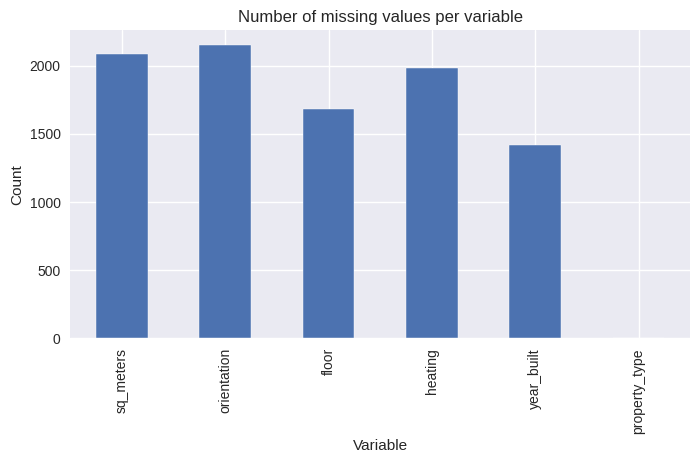

In [301]:
# variables con missing values
count_null_values(sale_clean_df)

In [302]:
sale_clean_df.loc[:, get_binary_cols(sale_clean_df)].head()

balcony  terrace  exterior  rooftop  elevator  pool   ac  garage  garden
0      1.0      1.0       0.0      0.0       0.0   1.0  1.0     1.0     1.0
1      0.0      0.0       1.0      0.0       1.0   0.0  1.0     0.0     0.0
2      1.0      0.0       1.0      0.0       0.0   0.0  0.0     0.0     0.0
3      0.0      1.0       0.0      1.0       1.0   0.0  1.0     0.0     0.0
4      0.0      0.0       1.0      1.0       1.0   0.0  0.0     0.0     0.0

- Las variables binarias ya no tienen valores nulos: se han sustituido los missing values por 0. 

##### Conversión de numéricas a categóricas binarias

 En realidad, balcony, terrace, exterior, rooftop, elevator, pool, ac, garage y garden son variables categóricas. Por lo tanto, las convertiremos de numéricas a categóricas: 

In [404]:
# variables numéricas que son 0 y 1 y queremos convertir a categóricas (binarias)
get_binary_cols(sale_clean_df)

['balcony',
 'terrace',
 'exterior',
 'rooftop',
 'elevator',
 'pool',
 'ac',
 'garage',
 'garden']

In [405]:
# data types
sale_clean_df[get_binary_cols(sale_clean_df)].dtypes

balcony     float64
terrace     float64
exterior    float64
rooftop     float64
elevator    float64
pool        float64
ac          float64
garage      float64
garden      float64
dtype: object

- Todas son float64 (0.0 y 1.0)

In [406]:
# primero las convertimos a int64 para eliminar los decimales: 0 y 1
sale_clean_df[get_binary_cols(sale_clean_df)] = sale_clean_df[get_binary_cols(sale_clean_df)].astype("int64")
# luego las convertimos a 'category': '0' y '1'
sale_clean_df[get_binary_cols(sale_clean_df)] = sale_clean_df[get_binary_cols(sale_clean_df)].astype("category")
# data types
sale_clean_df[get_binary_cols(sale_clean_df)].dtypes

balcony     category
terrace     category
exterior    category
rooftop     category
elevator    category
pool        category
ac          category
garage      category
garden      category
dtype: object

- Ya tenemos las variables categóricas binarias como 'category'. 

#### Edad de las viviendas

Tenemos el año de construcción de la vivienda (year_built), pero en realidad, lo que nos interesa no es el año de construcción, sino la edad relativa del edificio, es decir, como de viejo o nuevo es el edificio. 

Definimos una nueva variable que será cuál es la edad de la vivienda (property_age). 

- Como hemos visto anteriormente, tenemos una gran cantidad de nulos para la variable year_built (1415). Para solucionar esto, emplearemos una técnica que funciona bien en variables numéricas para poder sacar información: vamos a hacer una transformación categórica, de forma que los valores nulos les ponemos ‘Unknown’ y en el resto tratamos de hacer categorías con cierto criterio.



Creamos la edad (años) de la vivienda:

In [303]:
sale_clean_df['property_age'] = 2023 - sale_clean_df['year_built']
display(sale_clean_df.head())
print(sale_clean_df.shape)

price   latitude  longitude  sq_meters  sq_meters_built  rooms  \
0  2290000  41.409071   2.099850      383.0              532      5   
1    90000  41.434545   2.171110       42.0               50      1   
2   145000  41.444518   2.175309        NaN               53      3   
3   675000  41.392209   2.153368       93.0              120      4   
4   319000  41.413385   2.162246        NaN               69      3   

   bathrooms  balcony  terrace  exterior orientation  floor  rooftop  \
0          6      1.0      1.0       0.0         sur    4.0      0.0   
1          1      0.0      0.0       1.0       norte    NaN      0.0   
2          1      1.0      0.0       1.0         NaN    2.0      0.0   
3          2      0.0      1.0       0.0       norte    NaN      1.0   
4          1      0.0      0.0       1.0         NaN    8.0      1.0   

   elevator  pool   ac     heating  year_built  \
0       0.0   1.0  1.0  individual      2002.0   
1       1.0   0.0  1.0       bomba      1960.0   
2       0.0   0.0  0.0         NaN         NaN   
3       1.0   0.0  1.0  individual      1967.0   
4       1.0   0.0  0.0         NaN      1952.0   

                             neighborhood  dist_city_center  garage  \
0  Vallvidrera - El Tibidabo i les Planes          6.302847     1.0   
1       Can Peguera - El Turó de la Peira          5.189265     0.0   
2                                  Verdun          6.313668     0.0   
3         L'Antiga Esquerra de l'Eixample          1.462060     0.0   
4                        El Baix Guinardó          2.906147     0.0   

          property_type  garden  dist_closest_station  property_age  
0  chalet_independiente     1.0              2.949904          21.0  
1                  piso     0.0              0.329115          63.0  
2                  piso     0.0              0.284071           NaN  
3                 atico     0.0              0.443717          56.0  
4                  piso     0.0              0.371854          71.0

(4677, 25)


Hacemos un histograma de la edad de las viviendas:


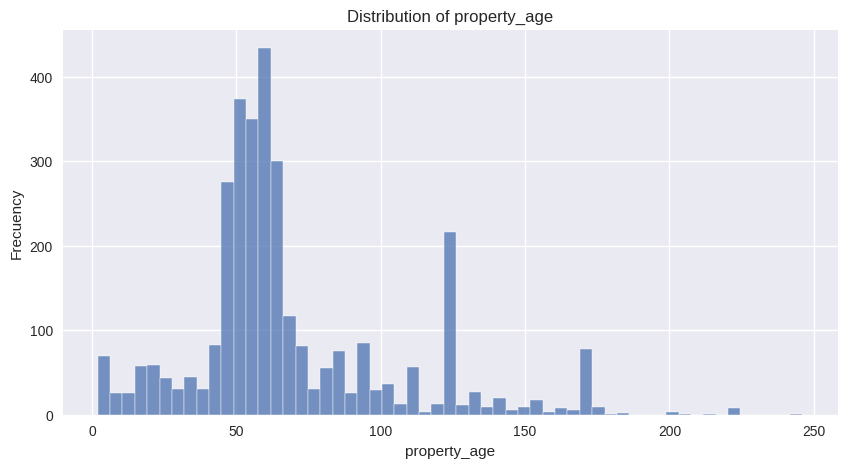

In [304]:
# Histograma de la variable precio
plot_histogram(sale_clean_df, 'property_age')

- Observamos que la mayoría de las viviendas tienen entre 50 y 80 años (desarrollo de Barcelona de los años 50 y 60). También tenemos un pico entorno a los 120 años. 

- Apreciamos pequeños "clusters de viviendas, los cuales podemos agrupar en categorías según la edad de la vivienda.

##### Selección de rangos de edad mediante clustering

Primero utilizamos DBSCAN (que determina automáticamente el número de clusters en función de la densidad de los datos) para determinar el número óptimo de clusters y, a continuación, utilizamos la agrupación de K-means para agrupar la variable property_age en función del número óptimo de clusters determinado. Por último, visualizamos los clusters mediante un gráfico de dispersión.

The optimal number of clusters is: 5


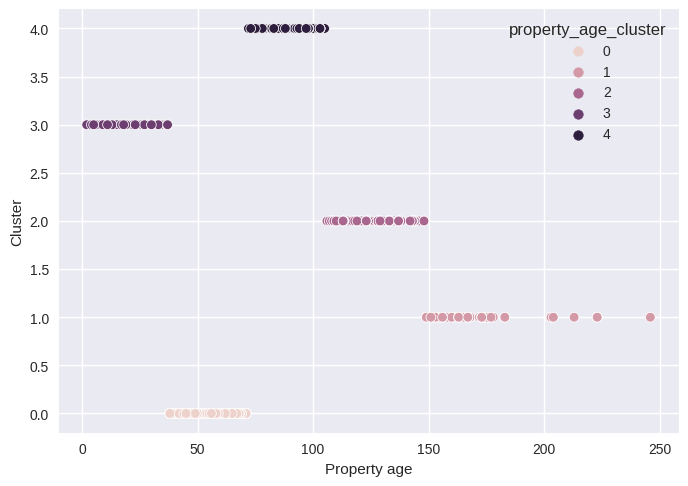

In [305]:
# Create a copy
df = sale_clean_df.dropna(subset=['property_age']).copy()

# Scale the property_age column using StandardScaler
X = StandardScaler().fit_transform(df['property_age'].values.reshape(-1, 1))

# Evaluate DBSCAN for range of eps values and select best_eps
eps_range = np.arange(0.1, 1.1, 0.1)
scores = [len(set(DBSCAN(eps=eps, min_samples=5).fit(X).labels_)) - (1 if -1 in dbscan.labels_ else 0) for eps in eps_range]
best_eps = eps_range[np.argmax(scores)]
# optimal number of clusters
k = len(set(DBSCAN(eps=best_eps, min_samples=5).fit(X).labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("The optimal number of clusters is:", k)

# Perform K-means clustering on the property_age variable with the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Assign each property to a cluster based on its property age
df['property_age_cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
sns.scatterplot(data=df, x='property_age', y='property_age_cluster', hue='property_age_cluster')
plt.xlabel('Property age')
plt.ylabel('Cluster')
plt.show()

In [306]:
# ordenamos por el mínimo en orden descendente:
def q25(x): return x.quantile(0.25)
def q75(x): return x.quantile(0.75)

df.groupby('property_age_cluster', as_index=False)\
              .agg({'property_age': ['min', 'max', 'mean', 'median', q25, q75]})\
              .sort_values(('property_age', 'min'), ascending=False)

property_age_cluster property_age                                        
                                min    max        mean median    q25    q75
1                    1        149.0  246.0  173.531469  173.0  167.0  173.0
2                    2        106.0  148.0  123.880319  123.0  123.0  123.0
4                    4         72.0  105.0   86.973105   87.0   82.0   93.0
0                    0         38.0   71.0   55.919980   56.0   52.0   61.0
3                    3          2.0   37.0   19.220430   21.0   10.0   27.0

- Tenemos 5 clústers.

La edad de la vivienda (property_age) podemos transformarla a una variable categórica incluyendo los valores nulos como una categoría de 'Unknown'.

Definimos los grupos de edad en base al clustering anterior: 

In [307]:
def property_age_conditions(x: float) -> str:
    """
    Assigns a property age range label to a property age value.

    Parameters:
        x (float): The property age value.

    Returns:
        str: The label for the property age range that the value falls into.
    """
    if pd.isna(x):  # check for NaN values
        return "Unknown"
    elif x < 0: # viviendas dónde no tengo valores (missing values)
        return "Unknown"
    elif 0 <= x <= 40:  # entre 0 y 40 años
        return "0 - 40"
    elif 40 < x <= 70:  # entre 41 y 70 años
        return "40 - 70"
    elif 70 < x <= 120:  # entre 71 y 120 años
        return "70 - 120"
    elif 120 < x <= 150:  # entre 121 y 150 años
        return "120 - 150"
    elif x > 150:  # más de 150 años
        return "+150"
    else:
        return "Unknown"

In [308]:
# aplicamos la función a la columna 'property_age' del DataFrame  
sale_clean_df['property_age_cat'] = sale_clean_df['property_age'].apply(property_age_conditions)
sale_clean_df.head(10)

price   latitude  longitude  sq_meters  sq_meters_built  rooms  \
0  2290000  41.409071   2.099850      383.0              532      5   
1    90000  41.434545   2.171110       42.0               50      1   
2   145000  41.444518   2.175309        NaN               53      3   
3   675000  41.392209   2.153368       93.0              120      4   
4   319000  41.413385   2.162246        NaN               69      3   
5    88000  41.423051   2.155127       61.0               64      2   
6   262000  41.411514   2.209901       74.0               80      3   
7   345000  41.402153   2.200675       78.0               87      3   
8   210000  41.405843   2.174957       50.0               55      2   
9   359000  41.399902   2.179506       53.0               61      0   

   bathrooms  balcony  terrace  exterior orientation  floor  rooftop  \
0          6      1.0      1.0       0.0         sur    4.0      0.0   
1          1      0.0      0.0       1.0       norte    NaN      0.0   
2          1      1.0      0.0       1.0         NaN    2.0      0.0   
3          2      0.0      1.0       0.0       norte    NaN      1.0   
4          1      0.0      0.0       1.0         NaN    8.0      1.0   
5          1      0.0      0.0       0.0        este    NaN      0.0   
6          1      1.0      0.0       1.0       norte    1.0      0.0   
7          1      1.0      0.0       1.0       norte    2.0      0.0   
8          1      0.0      0.0       0.0       oeste    NaN      0.0   
9          1      0.0      0.0       1.0         NaN    6.0      0.0   

   elevator  pool   ac     heating  year_built  \
0       0.0   1.0  1.0  individual      2002.0   
1       1.0   0.0  1.0       bomba      1960.0   
2       0.0   0.0  0.0         NaN         NaN   
3       1.0   0.0  1.0  individual      1967.0   
4       1.0   0.0  0.0         NaN      1952.0   
5       0.0   0.0  0.0          na      1967.0   
6       1.0   0.0  0.0         gas      1970.0   
7       0.0   0.0  1.0         NaN      1930.0   
8       1.0   0.0  0.0         NaN      1915.0   
9       1.0   0.0  1.0          na      2007.0   

                                   neighborhood  dist_city_center  garage  \
0        Vallvidrera - El Tibidabo i les Planes          6.302847     1.0   
1             Can Peguera - El Turó de la Peira          5.189265     0.0   
2                                        Verdun          6.313668     0.0   
3               L'Antiga Esquerra de l'Eixample          1.462060     0.0   
4                              El Baix Guinardó          2.906147     0.0   
5                                Horta Guinardó          4.100012     0.0   
6  Diagonal Mar i el Front Marítim del Poblenou          4.245796     0.0   
7                                    Sant Martí          3.016425     0.0   
8                            La Sagrada Família          2.039531     0.0   
9                                      Eixample          1.556273     0.0   

          property_type  garden  dist_closest_station  property_age  \
0  chalet_independiente     1.0              2.949904          21.0   
1                  piso     0.0              0.329115          63.0   
2                  piso     0.0              0.284071           NaN   
3                 atico     0.0              0.443717          56.0   
4                  piso     0.0              0.371854          71.0   
5                  piso     0.0              0.168447          56.0   
6                  piso     0.0              0.396059          53.0   
7                  piso     0.0              0.284322          93.0   
8                  piso     0.0              0.163056         108.0   
9               estudio     0.0              0.069243          16.0   

  property_age_cat  
0           0 - 40  
1          40 - 70  
2          Unknown  
3          40 - 70  
4         70 - 120  
5          40 - 70  
6          40 - 70  
7         70 - 120  
8         70 - 120  
9           0 - 40

In [309]:
# prueba para comprobar que funciona bien
edades = [40, 39, 70, 71,  69, 149, 150]
for edad in edades:
    print(f"La edad {edad} se clasifica como {property_age_conditions(edad)}")

La edad 40 se clasifica como 0 - 40
La edad 39 se clasifica como 0 - 40
La edad 70 se clasifica como 40 - 70
La edad 71 se clasifica como 70 - 120
La edad 69 se clasifica como 40 - 70
La edad 149 se clasifica como 120 - 150
La edad 150 se clasifica como 120 - 150


- Hemos pasado de una variable numérica a una variable categórica. 
- Es cierto que lo hemos hecho perdiendo información, pero perdemos más con los missing values que con decir que no sabemos lo que es (Unknown). 
- Es probable que la predicción de este modelo sea buena en estas categorías pero la predicción será un poco peor en las categorías ‘Unknown’, ya que no sabemos cuál es la edad de la vivienda. 

Variables con valores nulos:

	- 'sq_meters':  2088
	- 'orientation':  2153
	- 'floor':  1680
	- 'heating':  1986
	- 'year_built':  1415
	- 'property_type':  2
	- 'property_age':  1415


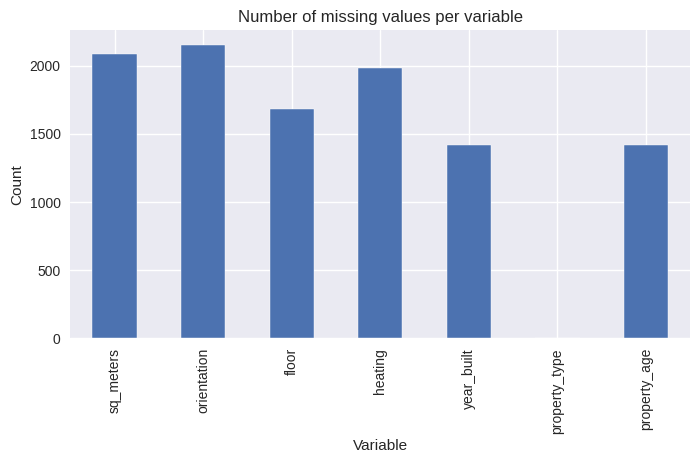

In [310]:
# variables con missing values
count_null_values(sale_clean_df)

#### Property_type, orientation y heating 

En las variables categóricas property_type, orientation y heating tenemos Null values: los transformamos a 'Unknown'. Ahora tenemos una categoría que es 'Unknown'.

Esto implica que podemos seguir utilizando estas instancias en el modelo y la precisión del modelo con estas instancias va a ser un poco peor, porque por ejemplo, te dice tengo una casa, pero no sabemos si es un piso, casa, chalet o dúplex.

No obstante, en este caso es mejor tener estas instancias y perder un poco de información que no eliminar todas estas instancias que no tienen null values.

In [311]:
def check_value_counts(df: pd.DataFrame, cols: List[str]) -> None:
    """
    Print the value counts of the specified columns in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check value counts for.
    cols (List[str]): A list of column names to check value counts for.
    
    Returns:
    None
    """
    for col in cols:
        print(f"Value counts for column '{col}':")
        print(df[col].value_counts())
        print()

In [312]:
# variables categóricas con missing values que queremos convertir a categoría 'Unknown'
cat_features_na_to_unknown = ['property_type', 
                              'orientation', 
                              'heating'
                             ]

In [313]:
check_value_counts(sale_clean_df, cat_features_na_to_unknown)

Value counts for column 'property_type':
piso                    4086
atico                    235
estudio                  177
duplex                    75
chalet                    36
chalet_adosado            28
chalet_independiente      26
chalet_pareado            12
Name: property_type, dtype: int64

Value counts for column 'orientation':
 sur      1149
 norte     588
 este      553
 oeste     234
Name: orientation, dtype: int64

Value counts for column 'heating':
gas           1104
na             772
individual     350
bomba          266
electric       199
Name: heating, dtype: int64



- Nos damos cuenta que 'heating' debería tener solo los valores bomba, electric, gas e individual, pero tiene 'na', así que consideramos este 'na' como un missing value. 

In [314]:
# Fill missing values with 'Unknown' for all columns
for col in cat_features_na_to_unknown:
    if col == 'heating':
        sale_clean_df[col].fillna('Unknown', inplace=True)
        sale_clean_df[col].replace('na', 'Unknown', inplace=True)
    else:
        sale_clean_df[col].fillna('Unknown', inplace=True)
        

sale_clean_df[cat_features_na_to_unknown].head(10)

property_type orientation     heating
0  chalet_independiente         sur  individual
1                  piso       norte       bomba
2                  piso     Unknown     Unknown
3                 atico       norte  individual
4                  piso     Unknown     Unknown
5                  piso        este     Unknown
6                  piso       norte         gas
7                  piso       norte     Unknown
8                  piso       oeste     Unknown
9               estudio     Unknown     Unknown

Variables con valores nulos:

	- 'sq_meters':  2088
	- 'floor':  1680
	- 'year_built':  1415
	- 'property_age':  1415


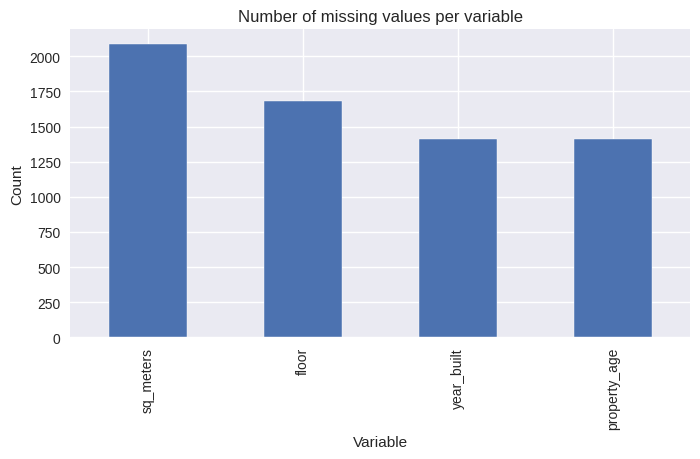

In [315]:
# variables con missing values
count_null_values(sale_clean_df)

- Realmente year_built y property_age no nos interesan ya que hemos creado la variable property_age_cat, así que las eliminaremos posteriormente. 

- sq_meters antes de tratarla miraremos, posteriormente, si puede estar correlacionada con sq_meters_built: si están correlacionadas, la eliminamos y nos quedamos con sq_meters_built ya que no tiene valores nulos.

- Nos queda por tratar los missing values de la variable floor, que es numérica. 

#### Floor

Estudiamos la categoría floor.

Calculamos varias estadísticas relacionadas con la variable "price" para cada valor único de la variable "floor".
- En primer lugar, seleccionamos las columnas "floor" y "price" del conjunto de datos. A continuación, agrupamos el conjunto de datos por los valores únicos de "floor" utilizando el método groupby con el argumento as_index=False, lo que significa que el df resultante no tendrá los valores únicos de "floor" como índice.

- Tras la agrupación, aplicamos el método agg() para calcular diversas estadísticas de la variable "price". Estas estadísticas incluyen:

    - category_count: el número de instancias de cada valor único de "floor" en el conjunto de datos, calculado mediante el método "count".
    - mean_price: la media de la variable "price" para cada valor único de "floor", calculada mediante el método "mean".
    - median_price: la mediana de la variable "price" para cada valor único de "floor", calculada mediante el método "median".
    - min_price: valor mínimo de la variable "price" para cada valor único de "floor", calculado mediante el método "min".
    - max_price: valor máximo de la variable "price" para cada valor único de "floor", calculado mediante el método "max".
    - stantard_deviation: la desviación estándar de la variable "precio" para cada valor único de "floor", calculada mediante el método "std".

- Por último, ordenamos el df resultante por la variable "floor" en orden ascendente y restablecemos el índice utilizando los métodos sort_values y reset_index, respectivamente. El df resultante tendrá una fila para cada valor único de "floor" en el dataset original, con columnas para cada una de las estadísticas calculadas.

In [391]:
df_floor = sale_clean_df.copy(deep=True)

In [392]:
floor = df_floor[['floor', 'price']].groupby('floor', as_index=False).agg(
    # Number of instances per category
    category_count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    # Standard deviation
    stantard_deviation=('price', "std")).sort_values('floor', ascending = True).reset_index()

floor

index  floor  category_count    mean_price  median_price  min_price  \
0       0    1.0             770  3.077965e+05      199900.0      57000   
1       1    2.0             611  3.118708e+05      192000.0      69900   
2       2    3.0             565  3.708888e+05      215000.0      80000   
3       3    4.0             413  4.201416e+05      200000.0      35000   
4       4    5.0             251  3.946239e+05      250000.0      75000   
5       5    6.0             156  3.993942e+05      330000.0      83000   
6       6    7.0              89  4.118202e+05      320000.0      75000   
7       7    8.0              58  4.253619e+05      289495.0      90000   
8       8    9.0              23  4.245174e+05      250000.0     132000   
9       9   10.0              24  6.807292e+05      402500.0     158000   
10     10   11.0              22  3.681818e+05      159000.0     159000   
11     11   12.0               2  1.285000e+06     1285000.0     820000   
12     12   13.0               2  3.575000e+05      357500.0     345000   
13     13   14.0               3  1.163333e+06      960000.0     630000   
14     14   15.0               4  3.617500e+05      435000.0     142000   
15     15   17.0               1  4.350000e+05      435000.0     435000   
16     16   21.0               1  2.500000e+06     2500000.0    2500000   
17     17   23.0               1  1.850000e+06     1850000.0    1850000   
18     18   25.0               1  1.060000e+06     1060000.0    1060000   

    max_price  stantard_deviation  
0     3775000       300793.732366  
1     2200000       298530.539939  
2     7450000       521183.880545  
3     7450000       682518.200873  
4     3500000       424150.832872  
5     2800000       363969.485116  
6     2800000       369609.124365  
7     1690000       317720.121344  
8     1690000       408236.832613  
9     2800000       660675.099049  
10    1500000       408591.498917  
11    1750000       657609.306503  
12     370000        17677.669530  
13    1900000       658963.833100  
14     435000       146500.000000  
15     435000                 NaN  
16    2500000                 NaN  
17    1850000                 NaN  
18    1060000                 NaN

Precio mediano de la vivienda en BCN en base al piso (floor):

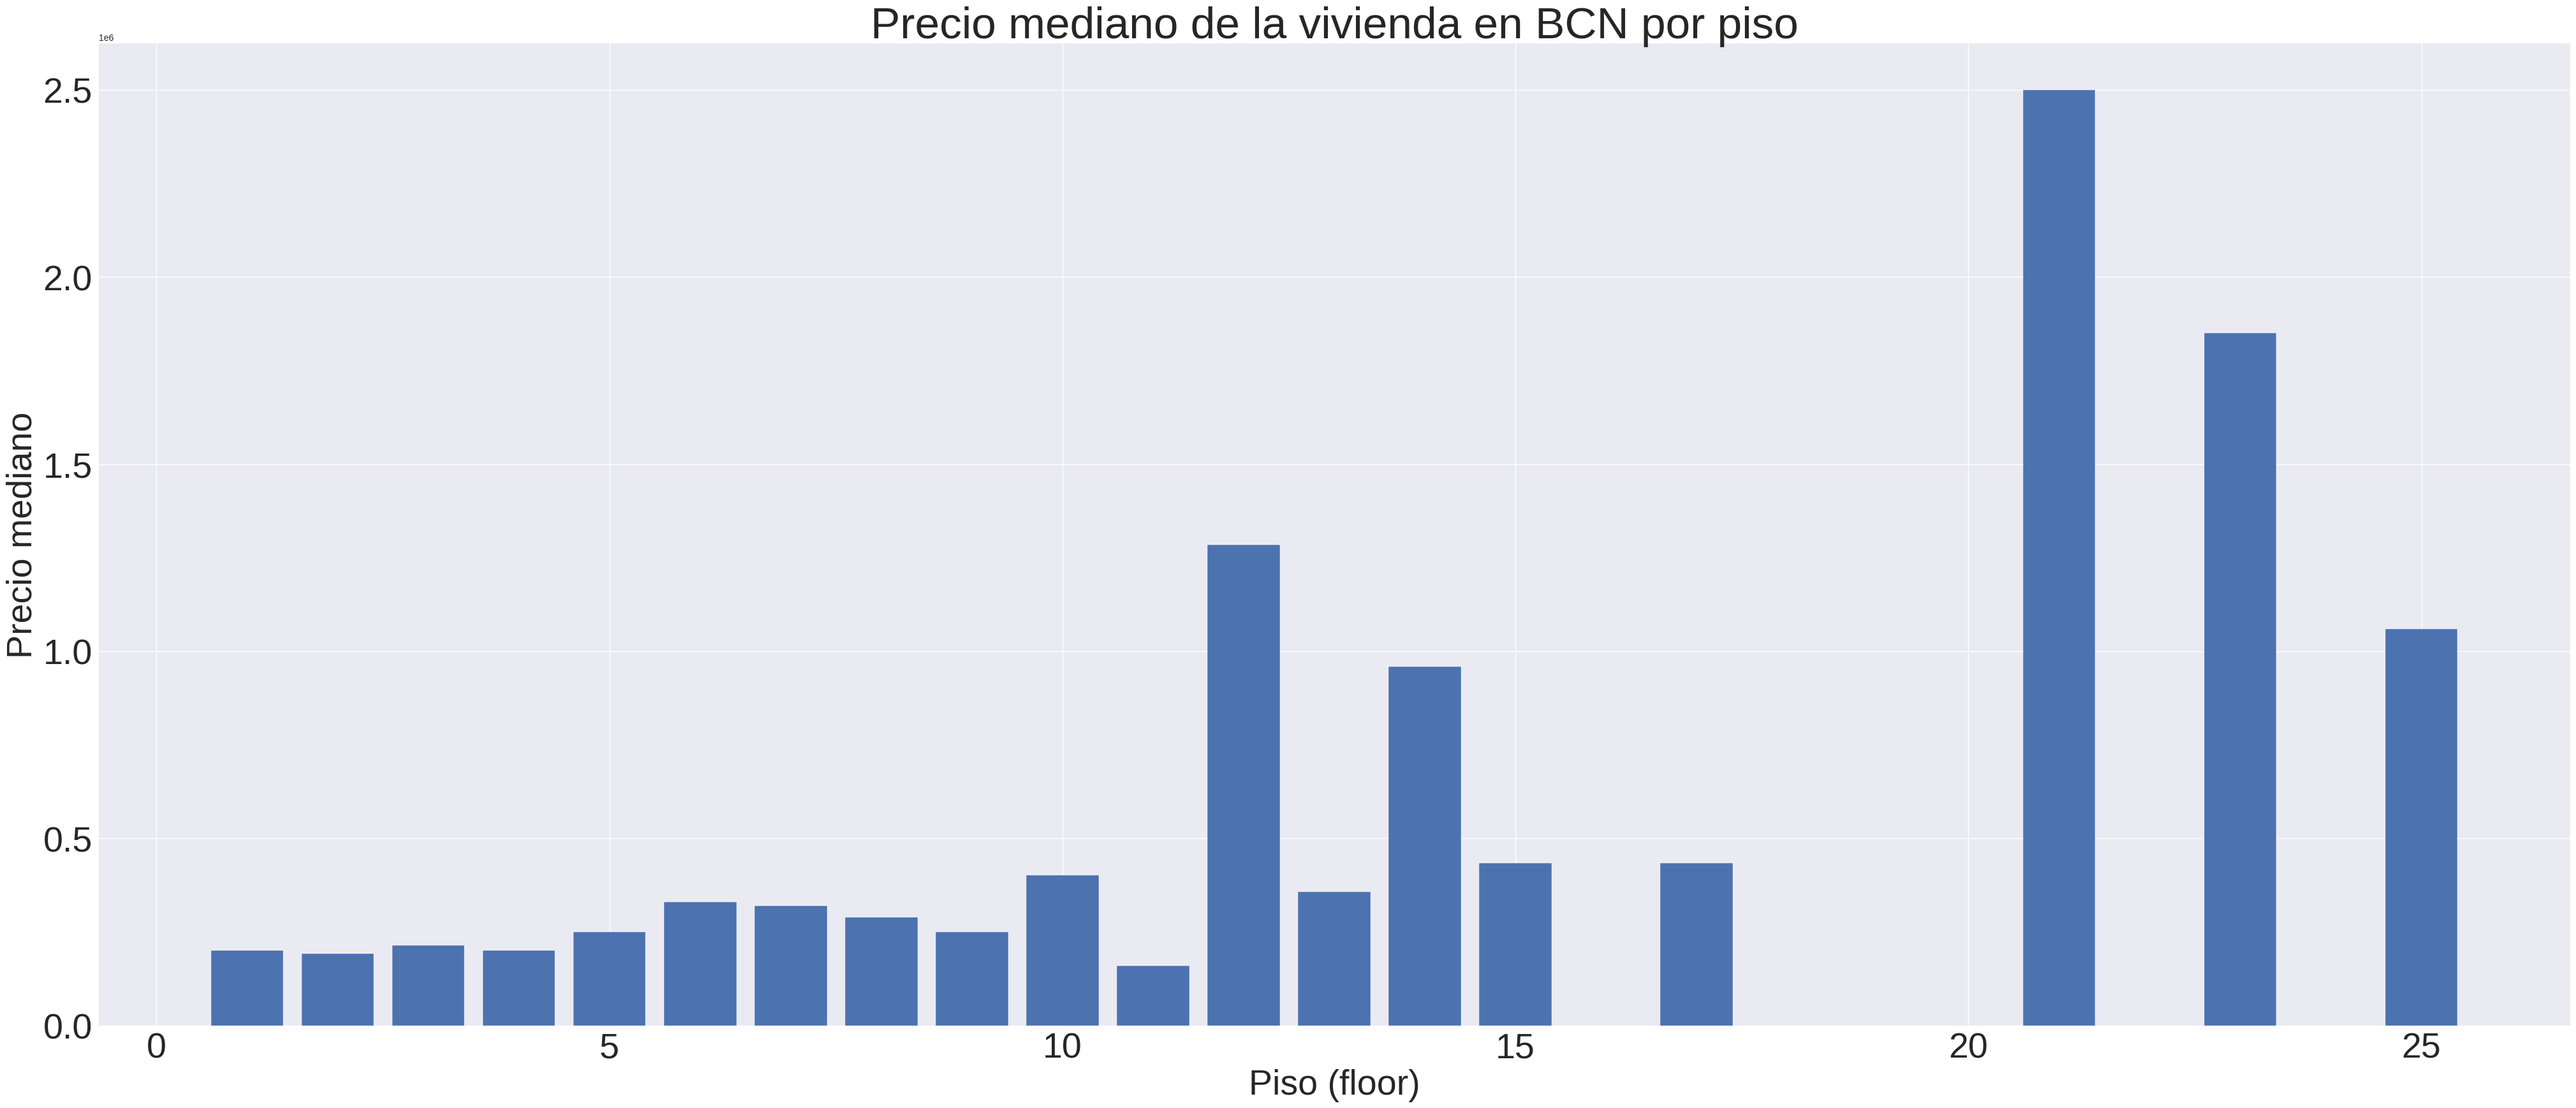

In [393]:
plt.bar(x='floor', height='median_price', data=floor)
plt.rcParams["figure.figsize"] = (50,20)
plt.xticks(fontsize=40)  # tamaño de las etiquetas del eje x
plt.yticks(fontsize=40)  # tamaño de las etiquetas del eje y
plt.xlabel('Piso (floor)', fontsize=40)  # etiqueta del eje x y su tamaño
plt.ylabel('Precio mediano', fontsize=40)  # etiqueta del eje y y su tamaño
plt.title('Precio mediano de la vivienda en BCN por piso', fontsize=50)  # título del gráfico y su tamaño
plt.show()

- Vemos que para pisos altos el precio aumenta mucho, pero tenemos muy pocas instancias (en category_count) (Menos de 10) y además tenemos null values.

Valores de floor inferiores a 12: 

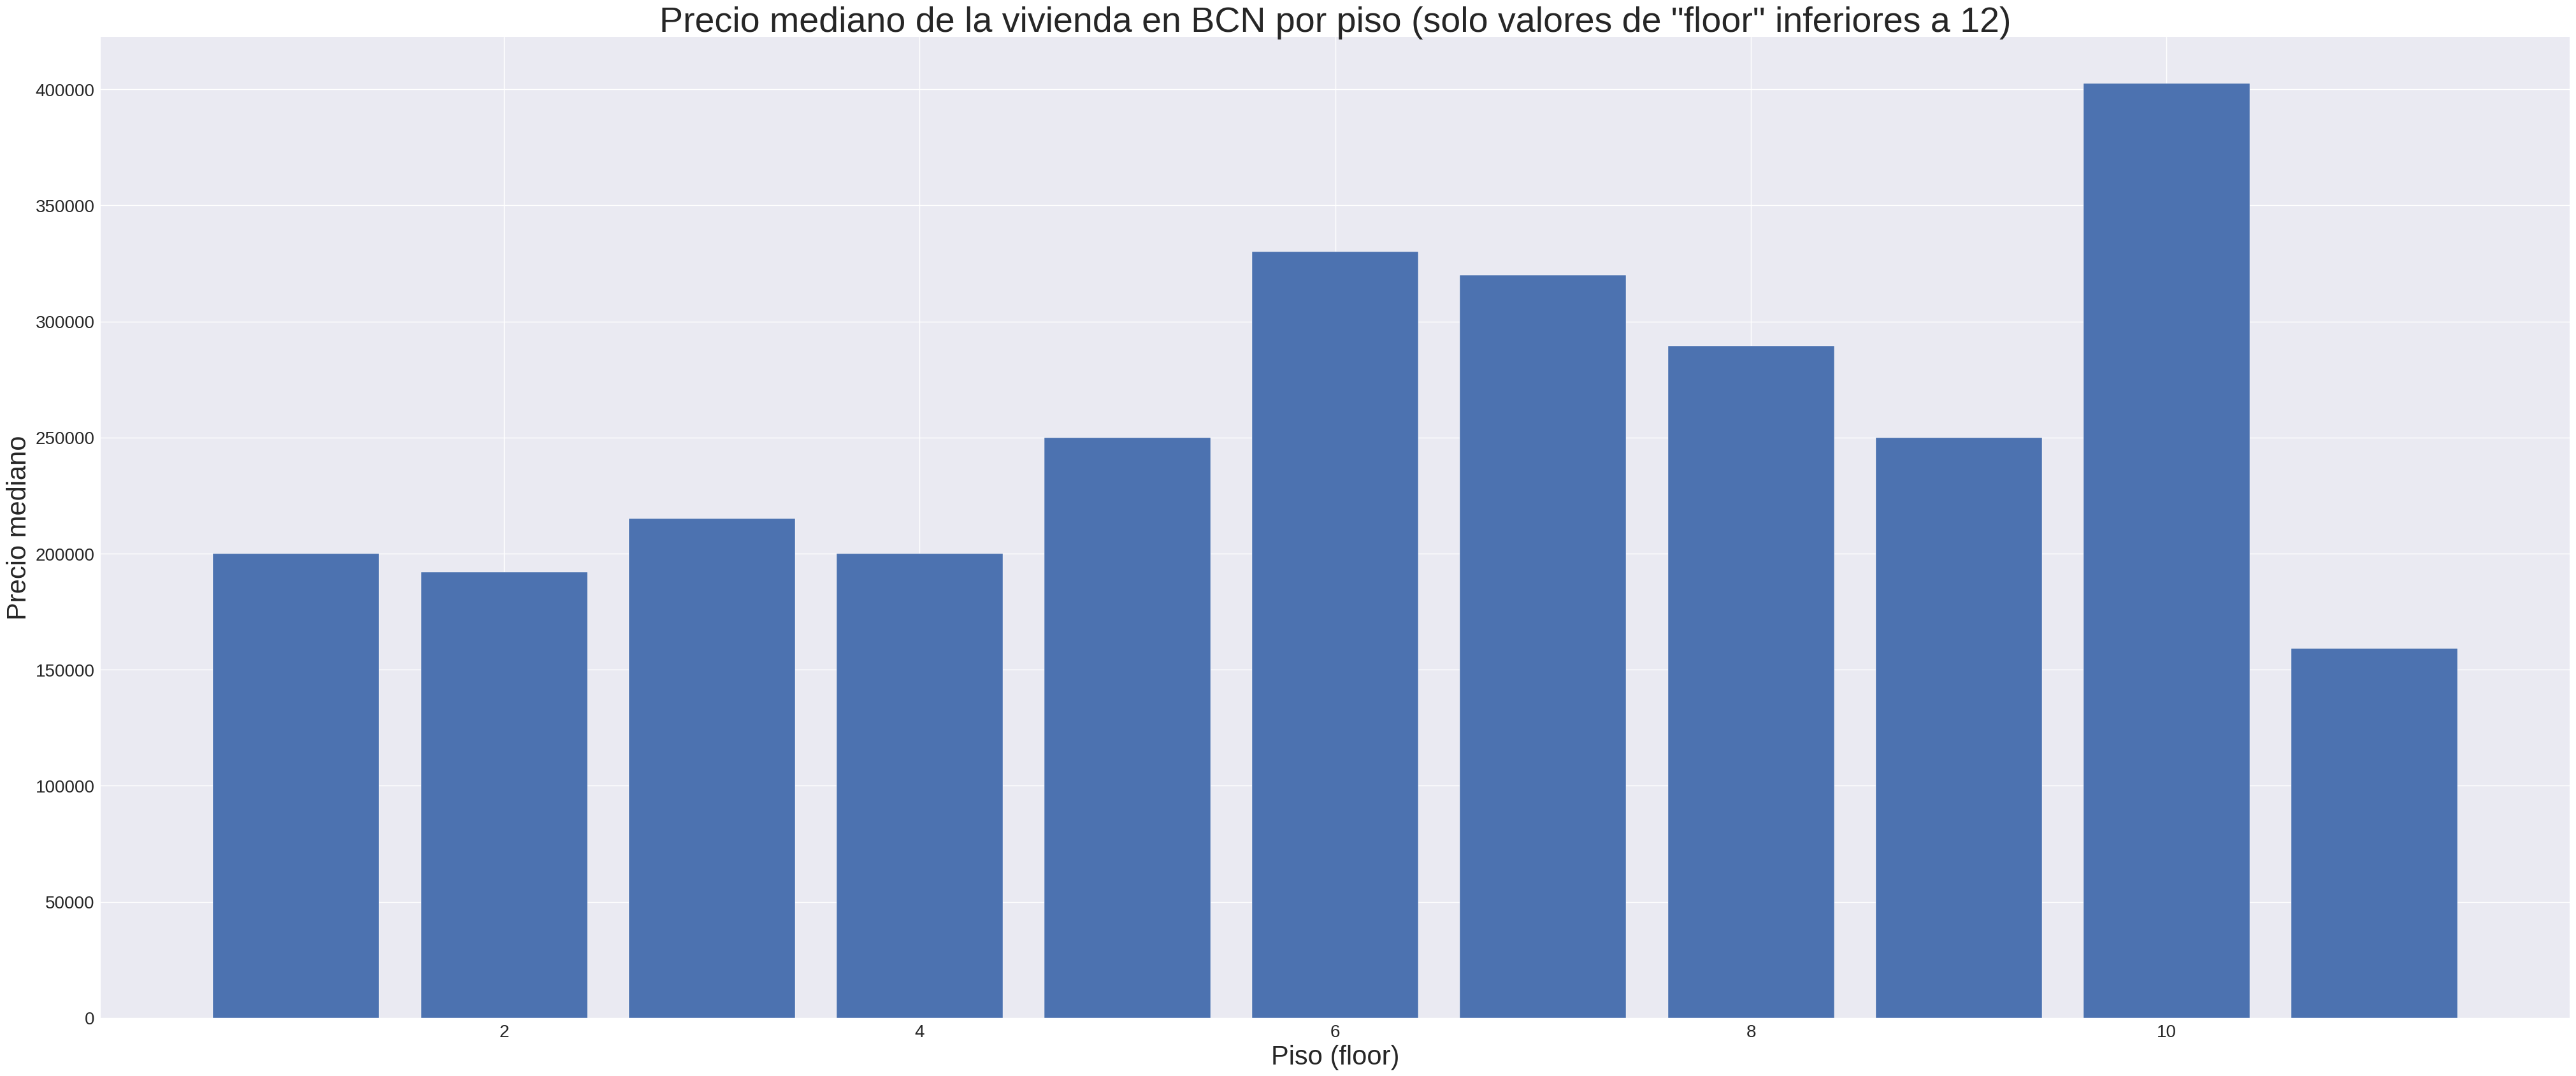

In [394]:
fig, ax = plt.subplots(figsize=(50, 20))

ax.bar(x='floor', height='median_price', data=floor[floor['floor'] < 12])
ax.set_xlabel('Piso (floor)', fontsize=30)
ax.set_ylabel('Precio mediano', fontsize=30)
ax.set_title('Precio mediano de la vivienda en BCN por piso (solo valores de "floor" inferiores a 12)', fontsize=40)
ax.tick_params(axis='both', labelsize=20)  # aumenta el tamaño de las etiquetas de los ejes
plt.show()

Decidimos hacer una transformación categórica con pisos de hasta 4 plantas, hasta 11 plantas y superiores. 
- Perdemos el número pero por lo general tampoco importa tanto con respecto al precio mediano de una vivienda. 

Lo ponemos en una variable categórica (floor_cat).

In [397]:
def conditions_floor(x: float) -> str:
    """
    Categorize floors of a property 
    
    Parameters:
    x (Union[float, int]): Number of floors of a property
    
    Returns:
    str: Categorized floor of the property
    """
    if pd.isna(x):  # check for NaN values
        return "Unknown"
    elif x < 0: # viviendas dónde no tengo valores (missing values)
        return "Unknown"
    elif ((x >= 0) & (x <= 4)): # viviendas entre 0 y 4 pisos
        return "0 - 4"
    elif ((x >= 5) & (x <= 11)): # viviendas entre 5 y 11 pisos
        return "5 - 11"
    elif ((x > 11)): # viviendas con más de 11 pisos
        return "+11"
    else:
        return "Unknown"

In [402]:
# aplicamos la función a la columna 'floor' del DataFrame  
sale_clean_df['floor_cat'] =  sale_clean_df['floor'].apply(conditions_floor)
sale_clean_df.head(10)

price   latitude  longitude  sq_meters  sq_meters_built  rooms  \
0  2290000  41.409071   2.099850      383.0              532      5   
1    90000  41.434545   2.171110       42.0               50      1   
2   145000  41.444518   2.175309        NaN               53      3   
3   675000  41.392209   2.153368       93.0              120      4   
4   319000  41.413385   2.162246        NaN               69      3   
5    88000  41.423051   2.155127       61.0               64      2   
6   262000  41.411514   2.209901       74.0               80      3   
7   345000  41.402153   2.200675       78.0               87      3   
8   210000  41.405843   2.174957       50.0               55      2   
9   359000  41.399902   2.179506       53.0               61      0   

   bathrooms  balcony  terrace  exterior orientation  floor  rooftop  \
0          6      1.0      1.0       0.0         sur    4.0      0.0   
1          1      0.0      0.0       1.0       norte    NaN      0.0   
2          1      1.0      0.0       1.0     Unknown    2.0      0.0   
3          2      0.0      1.0       0.0       norte    NaN      1.0   
4          1      0.0      0.0       1.0     Unknown    8.0      1.0   
5          1      0.0      0.0       0.0        este    NaN      0.0   
6          1      1.0      0.0       1.0       norte    1.0      0.0   
7          1      1.0      0.0       1.0       norte    2.0      0.0   
8          1      0.0      0.0       0.0       oeste    NaN      0.0   
9          1      0.0      0.0       1.0     Unknown    6.0      0.0   

   elevator  pool   ac     heating  year_built  \
0       0.0   1.0  1.0  individual      2002.0   
1       1.0   0.0  1.0       bomba      1960.0   
2       0.0   0.0  0.0     Unknown         NaN   
3       1.0   0.0  1.0  individual      1967.0   
4       1.0   0.0  0.0     Unknown      1952.0   
5       0.0   0.0  0.0     Unknown      1967.0   
6       1.0   0.0  0.0         gas      1970.0   
7       0.0   0.0  1.0     Unknown      1930.0   
8       1.0   0.0  0.0     Unknown      1915.0   
9       1.0   0.0  1.0     Unknown      2007.0   

                                   neighborhood  dist_city_center  garage  \
0        Vallvidrera - El Tibidabo i les Planes          6.302847     1.0   
1             Can Peguera - El Turó de la Peira          5.189265     0.0   
2                                        Verdun          6.313668     0.0   
3               L'Antiga Esquerra de l'Eixample          1.462060     0.0   
4                              El Baix Guinardó          2.906147     0.0   
5                                Horta Guinardó          4.100012     0.0   
6  Diagonal Mar i el Front Marítim del Poblenou          4.245796     0.0   
7                                    Sant Martí          3.016425     0.0   
8                            La Sagrada Família          2.039531     0.0   
9                                      Eixample          1.556273     0.0   

          property_type  garden  dist_closest_station  property_age  \
0  chalet_independiente     1.0              2.949904          21.0   
1                  piso     0.0              0.329115          63.0   
2                  piso     0.0              0.284071           NaN   
3                 atico     0.0              0.443717          56.0   
4                  piso     0.0              0.371854          71.0   
5                  piso     0.0              0.168447          56.0   
6                  piso     0.0              0.396059          53.0   
7                  piso     0.0              0.284322          93.0   
8                  piso     0.0              0.163056         108.0   
9               estudio     0.0              0.069243          16.0   

  property_age_cat floor_cat  
0           0 - 40     0 - 4  
1          40 - 70   Unknown  
2          Unknown     0 - 4  
3          40 - 70   Unknown  
4         70 - 120    5 - 11  
5          40 - 70   Unknown  
6          40 - 70     0 - 4  
7

Variables con valores nulos:

	- 'sq_meters':  2088
	- 'floor':  1680
	- 'year_built':  1415
	- 'property_age':  1415


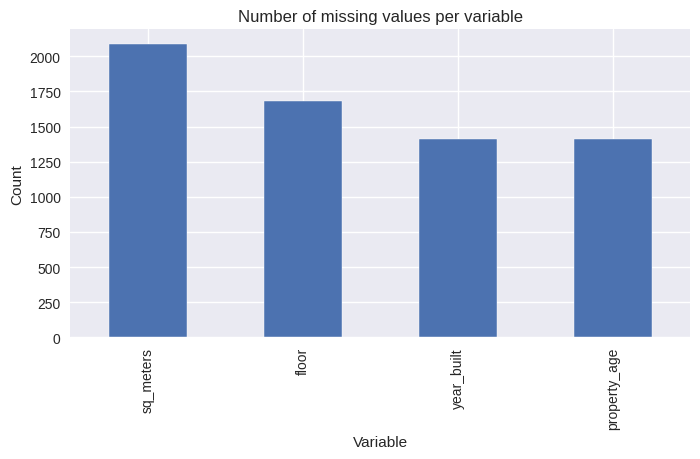

In [403]:
# variables con missing values
count_null_values(sale_clean_df)

- Hemos eliminado los missing values de nuestro dataset. 
- Nos quedan los valores nulos de las variables floor, year_built y property_age, pero hemos creado a partir de estas variables otras variables categóricas (floor_cat y property_age_cat) sin missing values. 

- Como hemo mencionado anteriormente, sq_meters antes de tratarla miraremos, posteriormente, si puede estar correlacionada con sq_meters_built: si están correlacionadas, la eliminamos y nos quedamos con sq_meters_built ya que no tiene valores nulos.


### Reducción de dimensionalidad de los barrios y categorización según su precio por metro cuadrado

Barrios de Barcelona en el dataset: 

In [408]:
# número de barrios en BCN 
sale_clean_df['neighborhood'].nunique()

75

Tenemos muchas categorías de barrios (neighborhood), concretamente 75 barrios diferentes. 

Tenemos que hacer una reducción de la dimensionalidad: una forma de hacer esta reducción de dimensionalidad podría ser mediante la creación de agrupaciones de barrios similares en términos de precios por metro cuadrado de vivienda (reducir el número de categorías con viviendas que tengan más o menos el mismo precio por metro cuadrado.). Para ello, haremos lo siguiente: 


In [410]:
neighborhood_df = sale_clean_df[['neighborhood', 'price', 'sq_meters_built']].groupby('neighborhood', as_index=False).agg(
    # Number of instances per category
    category_count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    mean_sq_meters_built=('sq_meters_built', "mean"),
    # Median price
    median_price=('price', "median"),
    # Median price
    median_sq_meters_built=('sq_meters_built', "median"))

neighborhood_df['mean_price_per_sq_meters_built'] = neighborhood_df['mean_price'] / neighborhood_df['mean_sq_meters_built']
neighborhood_df['median_price_per_sq_meters_built'] = neighborhood_df['median_price'] / neighborhood_df['median_sq_meters_built']
neighborhood_df.head(60)

neighborhood  category_count  \
0                                  Baró de Viver               4   
1                                       Can Baró              20   
2              Can Peguera - El Turó de la Peira              68   
3                                      Canyelles               4   
4       Ciutat Meridiana - Torre Baró - Vallbona              98   
5                                   Ciutat Vella             219   
6   Diagonal Mar i el Front Marítim del Poblenou              31   
7                                       Eixample             193   
8                               El Baix Guinardó              30   
9                                       El Besòs              95   
10                                 El Bon Pastor              37   
11            El Camp d'En Grassot i Gràcia Nova              45   
12                    El Camp de l'Arpa del Clot              43   
13                                     El Carmel             113   
14                                       El Clot              25   
15                                       El Coll              23   
16                      El Congrés i els Indians              18   
17                                 El Fort Pienc              35   
18                                   El Guinardó              44   
19                                      El Gòtic              61   
20             El Parc i la Llacuna del Poblenou              17   
21               El Poble Sec - Parc de Montjuïc             112   
22                                   El Poblenou              44   
23                          El Putxet i el Farró              31   
24                                      El Raval             273   
25                                        Gràcia              62   
26                                         Horta              21   
27                                Horta Guinardó             126   
28                                   Hostafrancs              25   
29               L'Antiga Esquerra de l'Eixample              72   
30                                La Barceloneta              70   
31                                    La Bordeta              47   
32                        La Dreta de l'Eixample             104   
33                          La Font d'En Fargues               7   
34                         La Font de la Guatlla              10   
35                                  La Guineueta              15   
36                            La Marina del Port              78   
37                    La Maternitat i Sant Ramon              37   
38                La Nova Esquerra de l'Eixample             115   
39                                La Prosperitat              94   
40                            La Sagrada Família              81   
41                                    La Sagrera              34   
42                                      La Salut               1   
43                                  La Teixonera              31   
44                              La Trinitat Nova              42   
45                             La Trinitat Vella              39   
46                   La Vall d'Hebron - La Clota               2   
47                           La Verneda i la Pau              60   
48                 La Vila Olímpica del Poblenou               7   
49                                     Les Corts             118   
50                                  Les Roquetes              86   
51                               Les Tres Torres              13   
52                                         Navas              14   
53                                    Nou Barris             300   
54                                     Pedralbes              23   
55                                         Porta              32   
56                       Provençals del Poblenou              28   
57                                   Sant Andreu             109   
58                      

Distribución del precio mediano por metro cuadrado por barrio (neighborhood):

In [411]:
# ordenamos los barrios por precio mediano por metro cuadrado de construcción en orden descendente 
neighborhood_df[['neighborhood','median_price_per_sq_meters_built']].sort_values('median_price_per_sq_meters_built', ascending = False).reset_index()

index                                  neighborhood  \
0      51                               Les Tres Torres   
1       6  Diagonal Mar i el Front Marítim del Poblenou   
2      61                    Sant Gervasi - La Bonanova   
3      54                                     Pedralbes   
4      69                           Sarrià-Sant Gervasi   
5      32                        La Dreta de l'Eixample   
6       7                                      Eixample   
7      42                                      La Salut   
8      23                          El Putxet i el Farró   
9      60                        Sant Gervasi - Galvany   
10     49                                     Les Corts   
11     25                                        Gràcia   
12     20             El Parc i la Llacuna del Poblenou   
13     29               L'Antiga Esquerra de l'Eixample   
14     38                La Nova Esquerra de l'Eixample   
15     46                   La Vall d'Hebron - La Clota   
16     73                                Vila de Gràcia   
17     64        Sant Pere - Santa Caterina i la Ribera   
18     22                                   El Poblenou   
19     30                                La Barceloneta   
20     58                                   Sant Antoni   
21     33                          La Font d'En Fargues   
22     11            El Camp d'En Grassot i Gràcia Nova   
23     14                                       El Clot   
24     37                    La Maternitat i Sant Ramon   
25      8                              El Baix Guinardó   
26     19                                      El Gòtic   
27      5                                  Ciutat Vella   
28     17                                 El Fort Pienc   
29     48                 La Vila Olímpica del Poblenou   
30     68                                        Sarrià   
31     40                            La Sagrada Família   
32     71        Vallvidrera - El Tibidabo i les Planes   
33     70                     Vallcarca i els Penitents   
34     52                                         Navas   
35     34                         La Font de la Guatlla   
36     21               El Poble Sec - Parc de Montjuïc   
37     12                    El Camp de l'Arpa del Clot   
38     65                                         Sants   
39     35                                  La Guineueta   
40     24                                      El Raval   
41     56                       Provençals del Poblenou   
42     16                      El Congrés i els Indians   
43     63                      Sant Martí de Provençals   
44     28                                   Hostafrancs   
45     18                                   El Guinardó   
46     74                 Vilapicina i la Torre Llobeta   
47     67                                Sants-Montjuïc   
48     31                                    La Bordeta   
49     66                                 Sants - Badal   
50     41                                    La Sagrera   
51     55                                         Porta   
52     44                              La Trinitat Nova   
53      1                                      Can Baró   
54      9                                      El Besòs   
55     15                                       El Coll   
56     26                                         Horta   
57     13                                     El Carmel   
58     27                                Horta Guinardó   
59      3                                     Canyelles   
60     59            Sant Genís Dels Agudells - Montbau   
61     72                                        Verdun   
62     43                                  La Teixonera   
63     62                                    Sant Martí   
64     36                            La Marina del Port   
65     39                                La Prosperitat   
66     47                           La Verneda i la

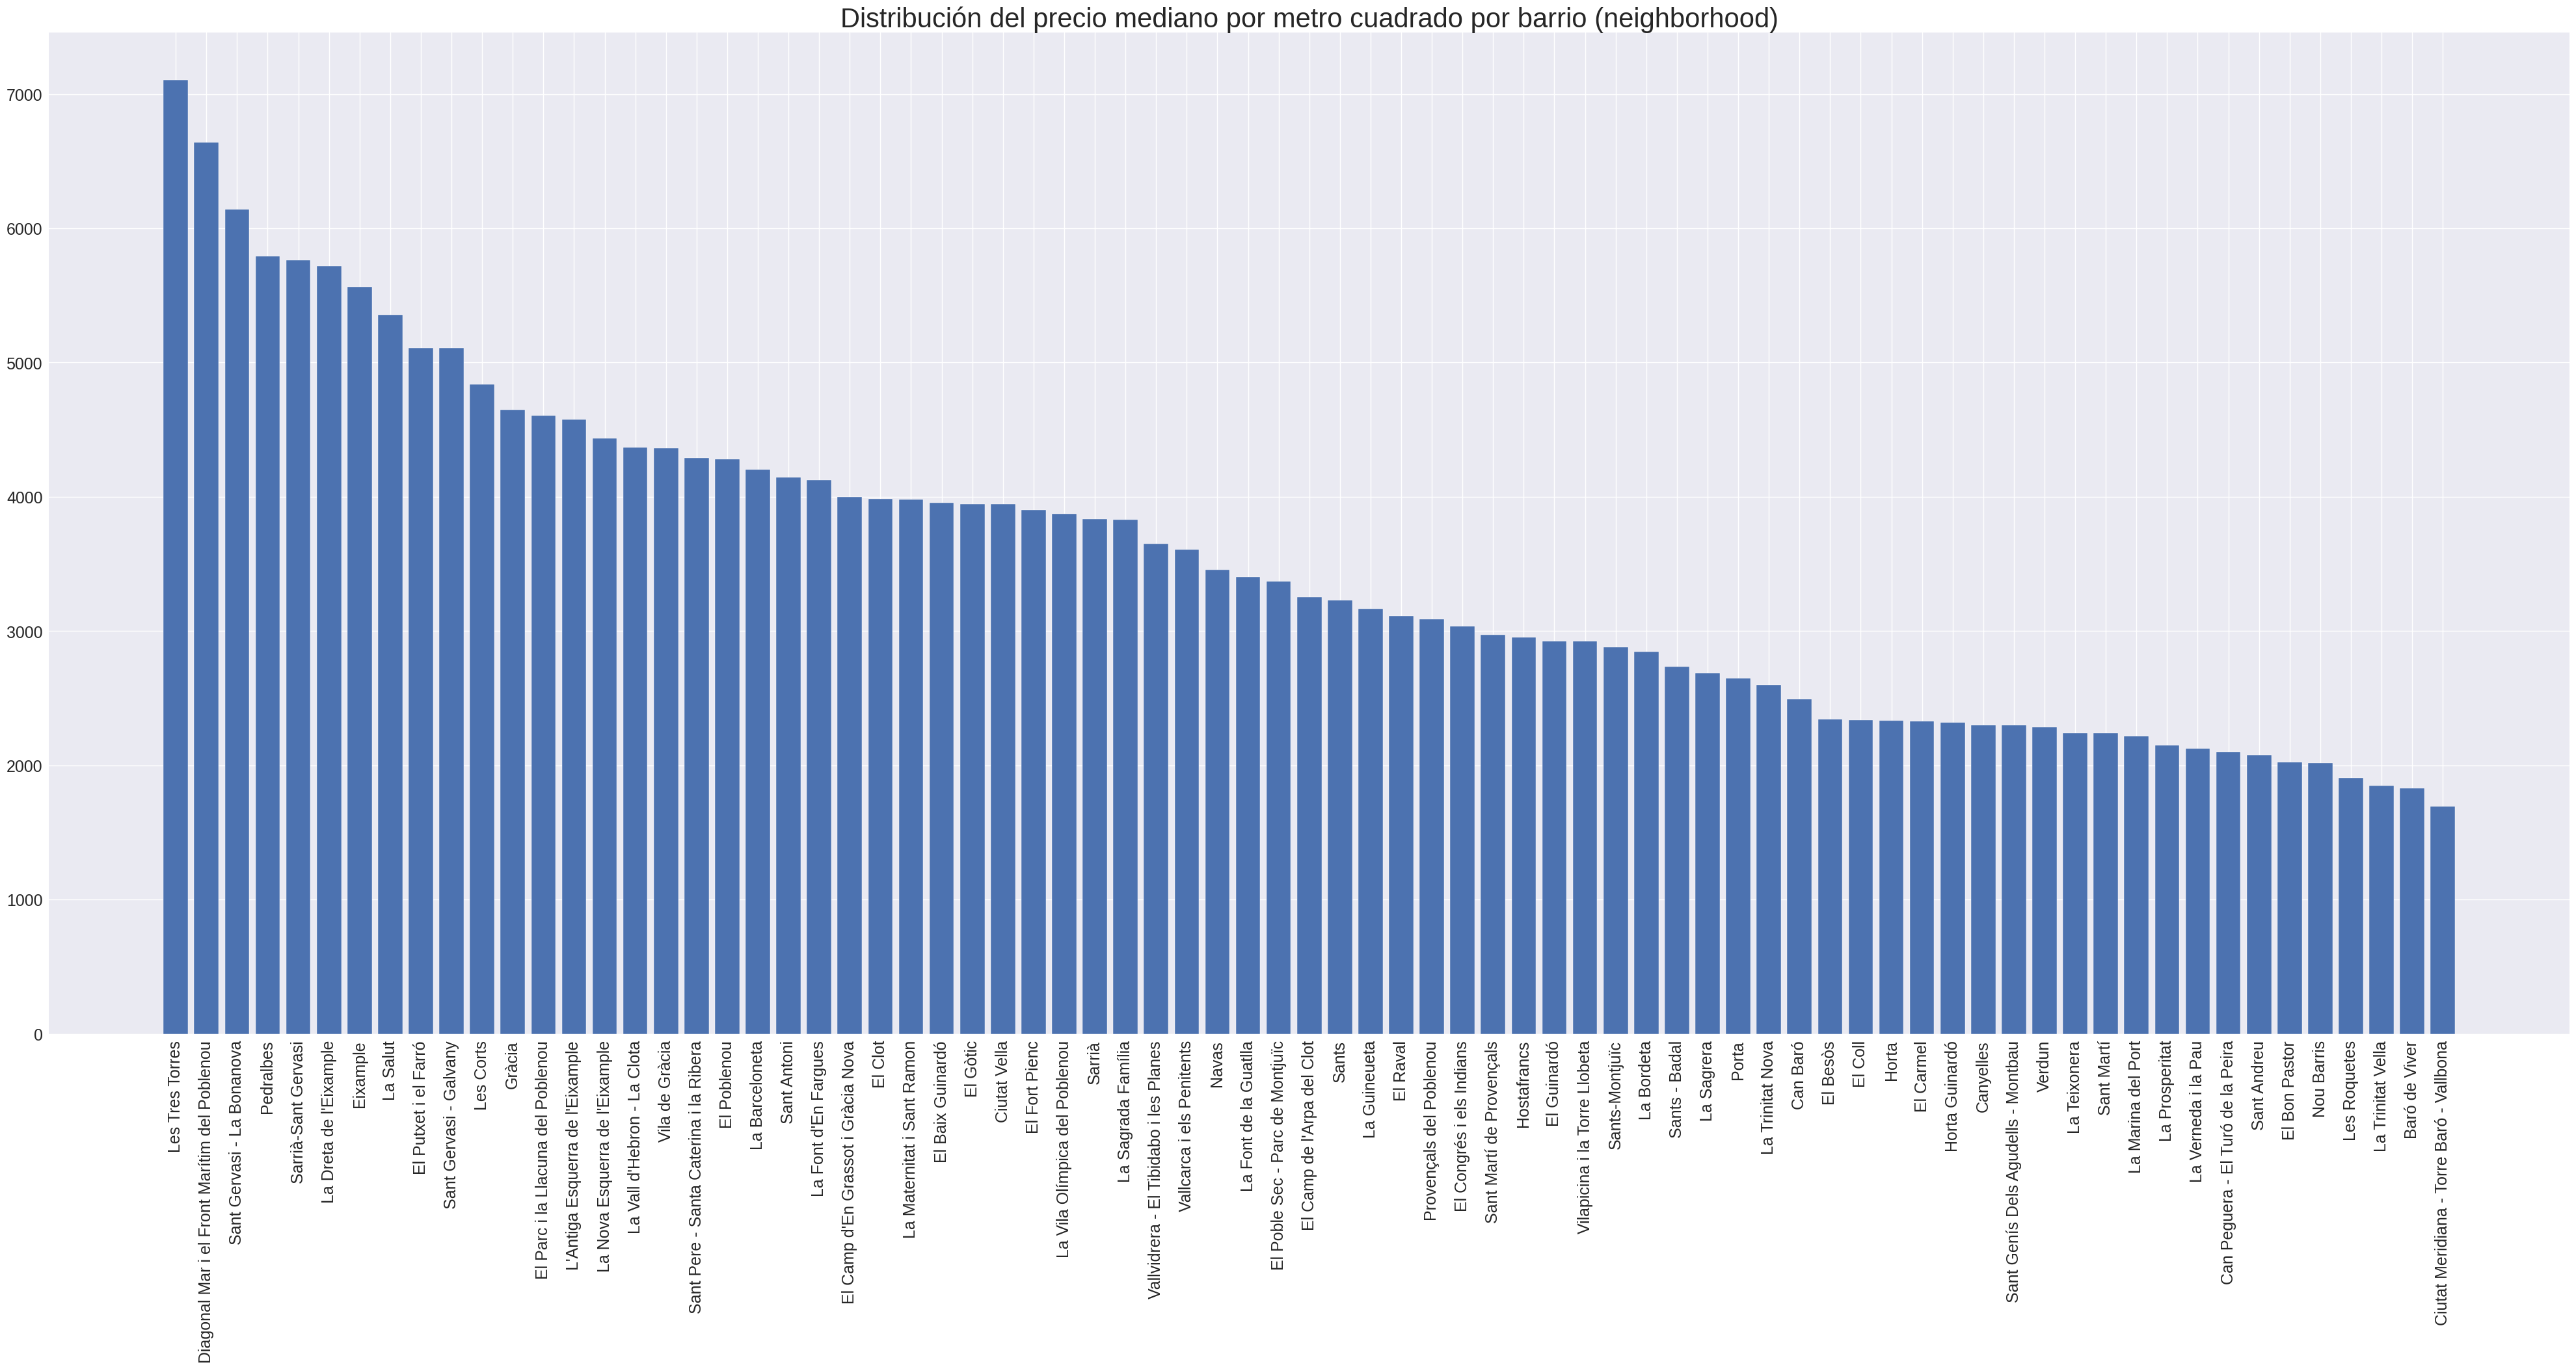

In [412]:
plt.bar(x = 'neighborhood', 
        height = 'median_price_per_sq_meters_built', 
        data = neighborhood_df.sort_values('median_price_per_sq_meters_built', ascending = False).reset_index()
        )
plt.rcParams["figure.figsize"] = (50,20)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.title("Distribución del precio mediano por metro cuadrado por barrio (neighborhood)", fontsize = 30) 
plt.show()

- Observamos una amplia variedad de precios en los diferentes barrios de Barcelona. El barrio más caro es Les Tres Torres con un precio mediano de 7105 €/m2, mientras que el barrio más barato es la Ciutat Meridiana - Torre Baró - Vallbona con un precio mediano de 1692 €/m2. 

Barrios que tienen el mayor precio mediano por metro cuadrado en Barcelona: 
- Les Tres Torres
- Diagonal Mar i el Front Marítim del Poblenou
- Sant Gervasi - La Bonanova
- Pedralbes
- Sarrià - Sant Gervasi

Ahora miramos el número de viviendas en cada barrio:

In [413]:
sale_clean_df['neighborhood'].value_counts()

Nou Barris                                      300
El Raval                                        273
Ciutat Vella                                    219
Sant Martí                                      212
Eixample                                        193
Sarrià-Sant Gervasi                             143
Horta Guinardó                                  126
Les Corts                                       118
La Nova Esquerra de l'Eixample                  115
El Carmel                                       113
El Poble Sec - Parc de Montjuïc                 112
Sant Andreu                                     109
La Dreta de l'Eixample                          104
Sants-Montjuïc                                   99
Ciutat Meridiana - Torre Baró - Vallbona         98
El Besòs                                         95
La Prosperitat                                   94
Les Roquetes                                     86
Sant Pere - Santa Caterina i la Ribera           85
Sant Gervasi

- En algunos barrios tenemos muy pocas instancias (viviendas), por ejemplo en Canyelles, Vallvidrera - El Tibidabo i les Planes, Baró de Viver, La Salut y La Vall d'Hebron - La Clota. 

Por tanto, cogemos categorías de barrios para asegurarnos que no tengamos barrios sin instancias y que el modelo no sepa que hacer. 

Definimos tiers de precios según la zona, dado que nos encontraremos con viviendas con pocas instancias.




##### Método 1: Quantiles 

Una opción sería dividir los barrios en grupos en base a los quantiles del precio mediano por metro cuadrado construido. Por ejemplo, podríamos dividirlos en 3 grupos: bajo, medio y alto. 

In [416]:
# Definir los límites de cada rango de precios
bajo = neighborhood_df['median_price_per_sq_meters_built'].quantile(0.25)
medio = neighborhood_df['median_price_per_sq_meters_built'].quantile(0.5)
alto = neighborhood_df['median_price_per_sq_meters_built'].quantile(0.75)

print(f"bajo: {bajo}")
print(f"medio: {medio}")
print(f"alto: {alto}")

bajo: 2336.021505376344
medio: 3253.3333333333335
alto: 4242.371103117506


In [418]:
# Función para asignar tier 
def assign_price_tier(x: float) -> str:
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < bajo)):
        return "0 - 2336"
    elif ((x >= bajo) & (x < medio)):
        return "2336 - 3253"
    elif ((x >= medio)):
        return "+3253"
    else:
        return "Unknown"

In [419]:
# asignamos tiers
neighborhood_df['neighborhood_rent_index'] = neighborhood_df['median_price_per_sq_meters_built'].apply(assign_price_tier)
neighborhood_df.head()

neighborhood  category_count     mean_price  \
0                             Baró de Viver               4  139250.000000   
1                                  Can Baró              20  105560.000000   
2         Can Peguera - El Turó de la Peira              68  124807.352941   
3                                 Canyelles               4  229475.000000   
4  Ciutat Meridiana - Torre Baró - Vallbona              98  114125.510204   

   mean_sq_meters_built  median_price  median_sq_meters_built  \
0             83.750000      150000.0                    82.0   
1             49.150000      109750.0                    44.0   
2             61.279412      126000.0                    60.0   
3             87.500000      194450.0                    84.5   
4             66.571429      110000.0                    65.0   

   mean_price_per_sq_meters_built  median_price_per_sq_meters_built  \
0                     1662.686567                       1829.268293   
1                     2147.711089                       2494.318182   
2                     2036.693065                       2100.000000   
3                     2622.571429                       2301.183432   
4                     1714.331698                       1692.307692   

  neighborhood_rent_index  
0                0 - 2336  
1             2336 - 3253  
2                0 - 2336  
3                0 - 2336  
4                0 - 2336

- El índice de renta de cada barrio (neighborhood_rent_index) se calcula como el precio mediano por metro cuadrado dividido por la mediana del tamaño en metros cuadrados construidos, se agrupan las viviendas por barrio y luego se asigna un tier de precios para cada barrio.

El objetivo era reducir la dimensión de la variable "neighborhood" agrupando los barrios que tengan precios similares. Para ello, hemos creado una nueva variable en el dataframe "neighborhood_df" que indica a qué categoría de precios pertenece cada barrio.

Para crear estas categorías, hemos utilizado la variable "median_price_per_sq_meters_built", que es el precio mediano por metro cuadrado de cada barrio. Hemos creado 3 categorías de precios (tiers):

- Tier 1: Barrios con un precio mediano por metro cuadrado entre 0 y 2336.
- Tier 2: Barrios con un precio mediano por metro cuadrado entre 2336 y 3253.
- Tier 3: Barrios con un precio mediano por metro cuadrado mayor o igual a 3253.


Finalmente, hemos creado una nueva variable en el dataframe "neighborhood_df" llamada "neighborhood_rent_index", que indica a qué tier de precios pertenece cada barrio.

##### Método 2: Clustering

Otra técnica comúnmente utilizada para dividir los datos en grupos es la segmentación de clústeres. Esta técnica agrupa los datos en diferentes clústeres según sus características similares. 

En este caso, agrupamos los barrios según su precio mediano por metro cuadrado construido.


La segmentación de clústeres podría proporcionar una visión más detallada y precisa de cómo se distribuyen los barrios según el precio mediano por metro cuadrado construido.  






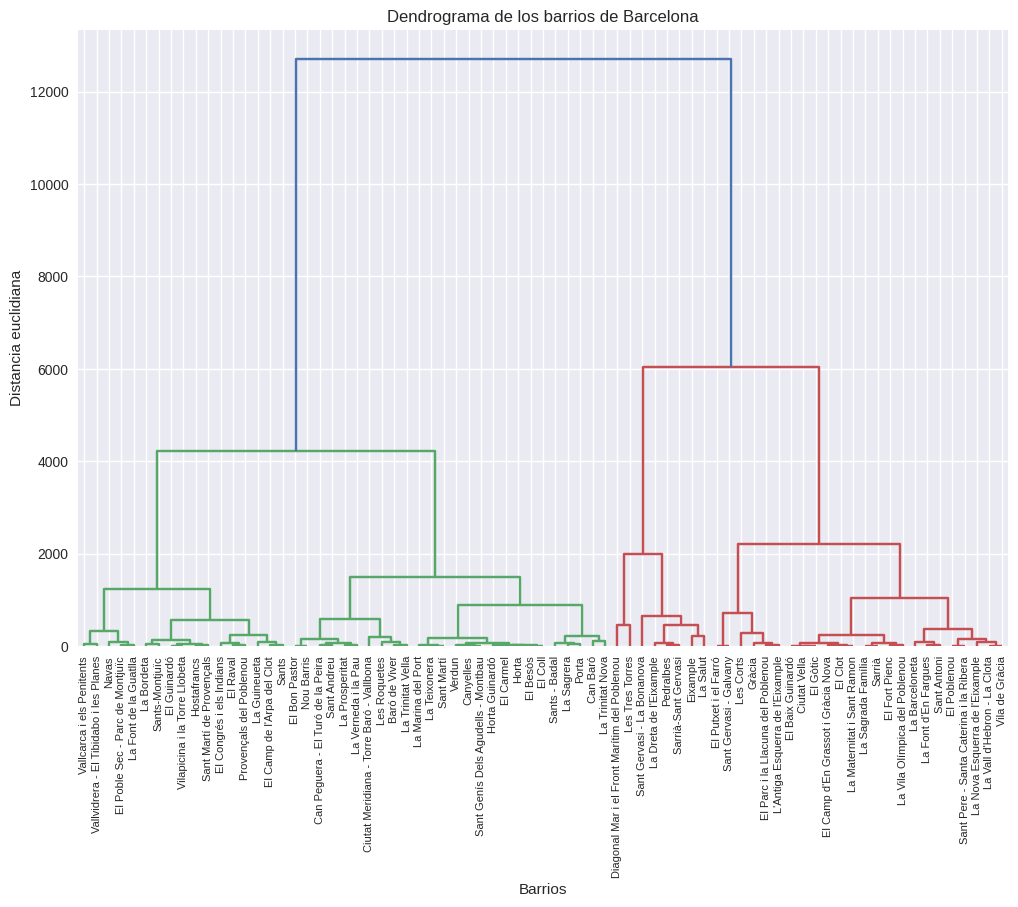

El número óptimo de clusters es 6


neighborhood  \
0                                  Baró de Viver   
1                                       Can Baró   
2              Can Peguera - El Turó de la Peira   
3                                      Canyelles   
4       Ciutat Meridiana - Torre Baró - Vallbona   
5                                   Ciutat Vella   
6   Diagonal Mar i el Front Marítim del Poblenou   
7                                       Eixample   
8                               El Baix Guinardó   
9                                       El Besòs   
10                                 El Bon Pastor   
11            El Camp d'En Grassot i Gràcia Nova   
12                    El Camp de l'Arpa del Clot   
13                                     El Carmel   
14                                       El Clot   

    median_price_per_sq_meters_built  cluster_median_price_sqm_built  
0                        1829.268293                               2  
1                        2494.318182                               2  
2                        2100.000000                               2  
3                        2301.183432                               2  
4                        1692.307692                               2  
5                        3947.368421                               6  
6                        6640.625000                               3  
7                        5566.037736                               4  
8                        3956.834532                               6  
9                        2344.262295                               2  
10                       2023.437500                               2  
11                       4000.000000                               6  
12                       3253.333333                               1  
13                       2328.125000                               2  
14                       3984.375000                               6

In [422]:
# Aplicar clustering jerárquico
X = neighborhood_df[['median_price_per_sq_meters_built']].values
Z = linkage(X, 'ward')

# Dibujar el dendrograma
plt.figure(figsize=(12, 8))
plt.title('Dendrograma de los barrios de Barcelona')
plt.xlabel('Barrios')
plt.ylabel('Distancia euclidiana') # distancia euclidiana para calcular la distancia entre los puntos en el espacio de características.
dendrogram(Z, labels=neighborhood_df['neighborhood'].values, leaf_rotation=90, leaf_font_size=8)
plt.show()

# Seleccionar el número óptimo de clusters
max_d = 1500 # valor arbitrario para que los clusters estén bien diferenciados y la gráfica sea fácil de interpretar
clusters = fcluster(Z, max_d, criterion='distance')
n_clusters = len(np.unique(clusters))

# Asignar los clusters a cada barrio
neighborhood_df['price_cluster'] = clusters
neighborhood_df = neighborhood_df.rename(columns={'price_cluster': 'cluster_median_price_sqm_built'})
# Imprimir los resultados
print(f"El número óptimo de clusters es {n_clusters}")
display(neighborhood_df[['neighborhood', 'median_price_per_sq_meters_built', 'cluster_median_price_sqm_built']].head(15))

- Observamos que el número óptimo de clusters es 6 y que cada barrio ha sido asignado a un cluster específico según su precio mediano por metro cuadrado construido.

- Podemos ver, por ejemplo, que los barrios Baró de Viver, Can Peguera - El Turó de la Peira, Canyelles y Ciutat Meridiana - Torre Baró - Vallbona han sido asignados al cluster 2. Estos barrios tienen un precio mediano por metro cuadrado construido relativamente bajo en comparación con los otros clusters, lo que significa que son zonas más baratas para vivir.

- Por ejemplo, el cluster 3 incluye los barrios de Diagonal Mar i el Front Marítim del Poblenou, entre otros. Estos barrios tienen un precio mediano por metro cuadrado construido relativamente alto en comparación con los otros clusters, lo que sugiere que son zonas más costosas para vivir. Además, el hecho de que estén en un mismo cluster indica que tienen características similares en términos de precios de la vivienda. 

Ajustamos el modelo KMeans con 6 clusters y obtenemos las etiquetas de los clusters para cada barrio en base a su precio mediano por metro cuadrado construido:

In [423]:
# Instanciar el modelo con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Ajustar el modelo con los datos de los barrios
kmeans.fit(X)

# Obtener las etiquetas de los clusters para cada observación
labels = kmeans.labels_

In [424]:
print(labels)
print(len(labels))

[0 0 0 0 0 1 4 2 1 0 0 1 3 0 1 0 3 1 3 1 5 3 1 5 3 5 0 0 3 5 1 3 2 1 3 3 0
 1 5 0 1 3 2 0 3 0 1 0 1 5 0 4 3 0 2 3 3 0 1 0 5 2 0 3 1 3 3 3 1 2 1 1 0 1
 3]
75


Visualizamos los clústers: 

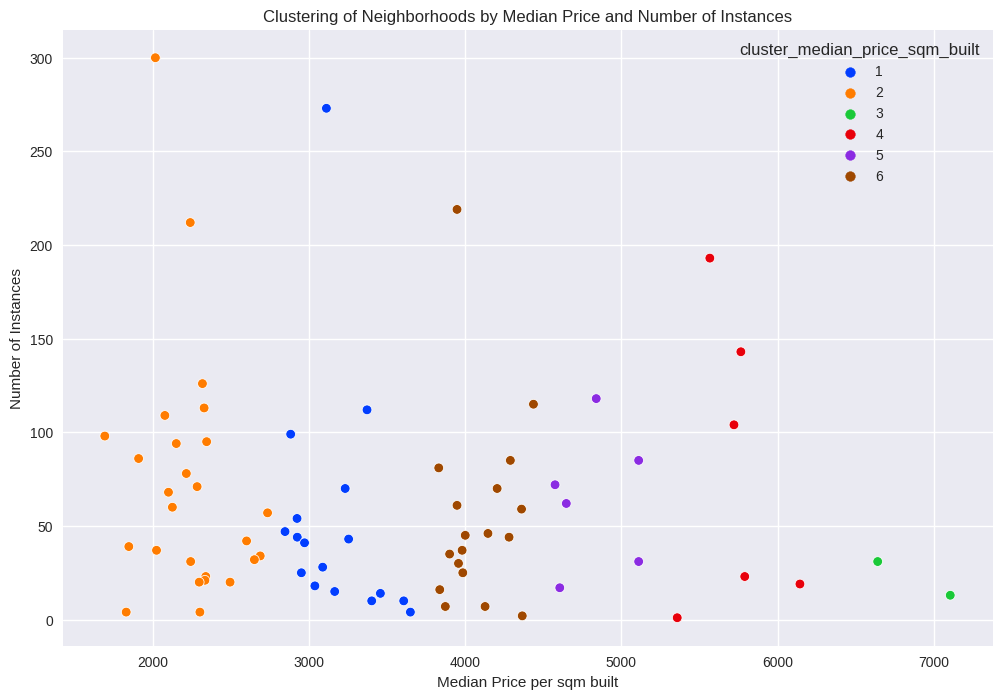

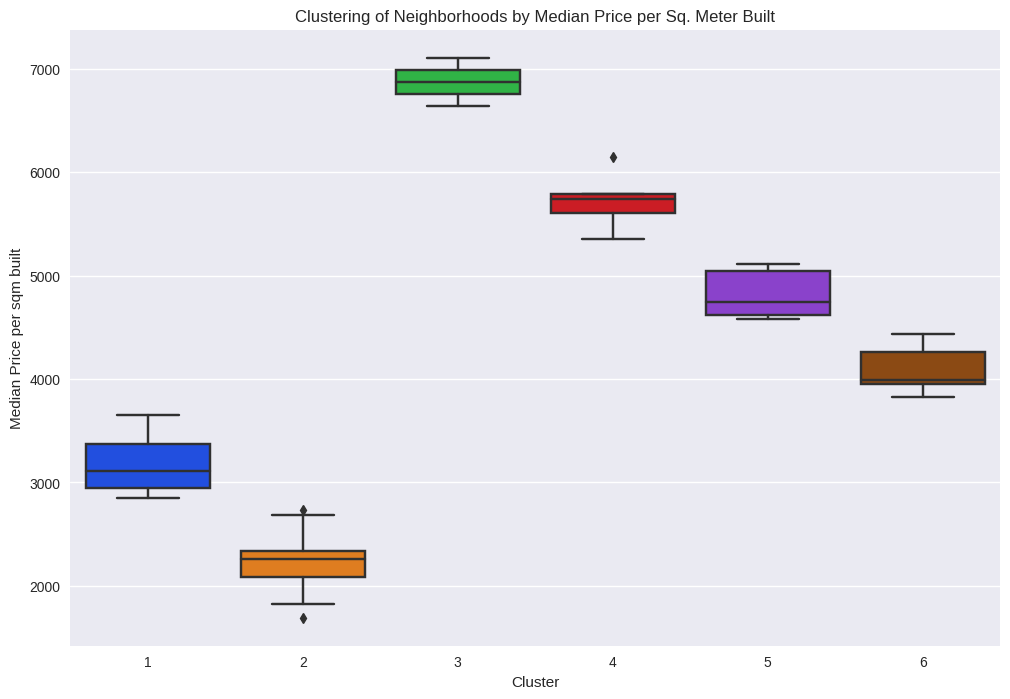

In [425]:
# Scatter plot
plt.figure(figsize=(12,8))

sns.scatterplot(data=neighborhood_df, 
                x='median_price_per_sq_meters_built', 
                y='category_count', 
                hue='cluster_median_price_sqm_built', 
                palette='bright')

plt.title('Clustering of Neighborhoods by Median Price and Number of Instances')
plt.xlabel('Median Price per sqm built')
plt.ylabel('Number of Instances')
plt.show()

# Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=neighborhood_df, x='cluster_median_price_sqm_built', y='median_price_per_sq_meters_built', palette='bright')
plt.title('Clustering of Neighborhoods by Median Price per Sq. Meter Built')
plt.xlabel('Cluster')
plt.ylabel('Median Price per sqm built')
plt.show()


In [427]:
# ordenamos por el mínimo en orden descendente:

def q25(x): return x.quantile(0.25)
def q75(x): return x.quantile(0.75)

neighborhood_df.groupby('cluster_median_price_sqm_built', as_index=False)\
              .agg({'median_price_per_sq_meters_built': ['min', 'max', 'mean', 'median', q25, q75]})\
              .sort_values(('median_price_per_sq_meters_built', 'min'), ascending=False)

cluster_median_price_sqm_built median_price_per_sq_meters_built  \
                                                              min   
2                              3                      6640.625000   
3                              4                      5357.142857   
4                              5                      4575.000000   
5                              6                      3830.379747   
0                              1                      2846.153846   
1                              2                      1692.307692   

                                                                    
           max         mean       median          q25          q75  
2  7105.263158  6872.944079  6872.944079  6756.784539  6989.103618  
3  6142.857143  5723.456887  5742.614950  5604.659306  5783.281734  
4  5110.294118  4814.436649  4742.884250  4615.712074  5042.398008  
5  4436.781609  4081.340500  3992.187500  3947.368421  4261.473321  
0  3648.812741  3168.614600  3111.111111  2950.819672  3371.212121  
1  2734.375000  2237.422229  2262.634409  2082.692308  2337.365591

- Tenemos 6 clusters. 

- Por orden de menor a mayor precio mediano por metro cuadrado:  
    - cluster 3
    - cluster 4
    - cluster 5
    - cluster 6
    - cluster 1
    - cluster 2

- Observamos lo siguiente: 
    - El precio mediano por metro cuadrado construido del cluster 1 oscila entre 2846.15 y 3648.81 euros. El precio mediano es de 3168.61 euros, y el rango intercuartílico va desde los 2950.82 a los 3371.21 euros.

    - El precio mediano por metro cuadrado construido del cluster 2 oscila entre 1692.31 y 2734.38 euros. El precio mediano es de 2262.63 euros, y el rango intercuartílico va desde los 2082.69 a los 2337.37 euros.

    - El precio mediano por metro cuadrado construido del cluster 3 oscila entre 6640.62 y 7105.26 euros. El precio mediano es de 6872.94 euros, y el rango intercuartílico va desde los 6756.78 a los 6989.10 euros.

    - El precio mediano por metro cuadrado construido del cluster 4 oscila entre 5357.14 y 6142.86 euros. El precio mediano es de 5742.61 euros, y el rango intercuartílico va desde los 5604.66 a los 5783.28 euros.

    - El precio mediano por metro cuadrado construido del cluster 5 oscila entre 4575.00 y 5110.29 euros. El precio mediano es de 4742.88 euros, y el rango intercuartílico va desde los 4615.71 a los 5042.40 euros.

    - El precio mediano por metro cuadrado construido del cluster 6 oscila entre 3830.38 y 4436.78 euros. El precio mediano es de 3992.19 euros, y el rango intercuartílico va desde los 3947.37 a los 4261.47 euros.

Definimos los grupos de precios: 

In [428]:
# Función para asignar tier 
    # < 2337
    # >= 2337
    # >=  3371
    # >=  5042
    # + 5042
    
def assign_price_tier_cluster(x: float) -> str:
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 2337)): # bajo 
        return "0 - 2337" # cluster 2 
    
    elif ((x >= 2337) & (x < 3371)): # medio - bajo  
        return "2337 - 3371" # cluster 1
    
    elif ((x >= 3371) & (x < 5042)): # medio - alto
        return "3371 - 5042" # cluster 6 y 5
    
    elif ((x >= 5042)): # alto
        return "+5042" # cluster 4 y 3
    else:
        return "Unknown"

In [429]:
# asignamos tiers
neighborhood_df['neighborhood_rent_index_cluster'] = neighborhood_df['median_price_per_sq_meters_built'].apply(assign_price_tier_cluster)
neighborhood_df.head()

neighborhood  category_count     mean_price  \
0                             Baró de Viver               4  139250.000000   
1                                  Can Baró              20  105560.000000   
2         Can Peguera - El Turó de la Peira              68  124807.352941   
3                                 Canyelles               4  229475.000000   
4  Ciutat Meridiana - Torre Baró - Vallbona              98  114125.510204   

   mean_sq_meters_built  median_price  median_sq_meters_built  \
0             83.750000      150000.0                    82.0   
1             49.150000      109750.0                    44.0   
2             61.279412      126000.0                    60.0   
3             87.500000      194450.0                    84.5   
4             66.571429      110000.0                    65.0   

   mean_price_per_sq_meters_built  median_price_per_sq_meters_built  \
0                     1662.686567                       1829.268293   
1                     2147.711089                       2494.318182   
2                     2036.693065                       2100.000000   
3                     2622.571429                       2301.183432   
4                     1714.331698                       1692.307692   

  neighborhood_rent_index  cluster_median_price_sqm_built  \
0                0 - 2336                               2   
1             2336 - 3253                               2   
2                0 - 2336                               2   
3                0 - 2336                               2   
4                0 - 2336                               2   

  neighborhood_rent_index_cluster  
0                        0 - 2337  
1                     2337 - 3371  
2                        0 - 2337  
3                        0 - 2337  
4                        0 - 2337

Al agrupar los barrios en clusters según su precio mediano por metro cuadrado construido y luego calcular los estadísticos de cada cluster (mínimo, máximo, media, mediana, primer cuartil y tercer cuartil), hemos logrado definir tiers de precios según la zona. Esto nos permitirá tener una mejor comprensión de los precios de las viviendas en cada cluster.





Finalmente agregamos esta información el modelo de datos:

In [436]:
neighborhood_mapping = neighborhood_df[['neighborhood', 'neighborhood_rent_index', 'neighborhood_rent_index_cluster']]
sale_clean_df = pd.merge(sale_clean_df, neighborhood_mapping, on='neighborhood', how='left')
sale_clean_df.head()

price   latitude  longitude  sq_meters  sq_meters_built  rooms  \
0  2290000  41.409071   2.099850      383.0              532      5   
1    90000  41.434545   2.171110       42.0               50      1   
2   145000  41.444518   2.175309        NaN               53      3   
3   675000  41.392209   2.153368       93.0              120      4   
4   319000  41.413385   2.162246        NaN               69      3   

   bathrooms balcony terrace exterior orientation  floor rooftop elevator  \
0          6       1       1        0         sur    4.0       0        0   
1          1       0       0        1       norte    NaN       0        1   
2          1       1       0        1     Unknown    2.0       0        0   
3          2       0       1        0       norte    NaN       1        1   
4          1       0       0        1     Unknown    8.0       1        1   

  pool ac     heating  year_built                            neighborhood  \
0    1  1  individual      2002.0  Vallvidrera - El Tibidabo i les Planes   
1    0  1       bomba      1960.0       Can Peguera - El Turó de la Peira   
2    0  0     Unknown         NaN                                  Verdun   
3    0  1  individual      1967.0         L'Antiga Esquerra de l'Eixample   
4    0  0     Unknown      1952.0                        El Baix Guinardó   

   dist_city_center garage         property_type garden  dist_closest_station  \
0          6.302847      1  chalet_independiente      1              2.949904   
1          5.189265      0                  piso      0              0.329115   
2          6.313668      0                  piso      0              0.284071   
3          1.462060      0                 atico      0              0.443717   
4          2.906147      0                  piso      0              0.371854   

   property_age property_age_cat floor_cat neighborhood_rent_index  \
0          21.0           0 - 40     0 - 4                   +3253   
1          63.0          40 - 70   Unknown                0 - 2336   
2           NaN          Unknown     0 - 4                0 - 2336   
3          56.0          40 - 70   Unknown                   +3253   
4          71.0         70 - 120    5 - 11                   +3253   

  neighborhood_rent_index_cluster  
0                     3371 - 5042  
1                        0 - 2337  
2                        0 - 2337  
3                     3371 - 5042  
4                     3371 - 5042

In [439]:
# instancias en cada grupo: 
sale_clean_df['neighborhood_rent_index_cluster'].value_counts()

0 - 2337       1571
3371 - 5042    1403
2337 - 3371    1060
+5042           643
Name: neighborhood_rent_index_cluster, dtype: int64

In [440]:
sale_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 0 to 4676
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   price                            4677 non-null   int64   
 1   latitude                         4677 non-null   float64 
 2   longitude                        4677 non-null   float64 
 3   sq_meters                        2589 non-null   float64 
 4   sq_meters_built                  4677 non-null   int64   
 5   rooms                            4677 non-null   int64   
 6   bathrooms                        4677 non-null   int64   
 7   balcony                          4677 non-null   category
 8   terrace                          4677 non-null   category
 9   exterior                         4677 non-null   category
 10  orientation                      4677 non-null   object  
 11  floor                            2997 non-null   float64 
 12  roofto

Convertimos las categóricas de object a category:

In [5]:
# convertimos las categóricas de object a category:
def convert_object_to_category(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert object columns in a pandas dataframe to category data type.
    
    Parameters:
    df (pd.DataFrame): Input pandas dataframe
    
    Returns:
    pd.DataFrame: A copy of the input dataframe with object columns converted to category data type.
    """    
    # loop through columns and convert object columns to category
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')
    
    return df

In [442]:
sale_clean_df = convert_object_to_category(sale_clean_df)

In [444]:
sale_clean_df.dtypes # orient, neighb, proptype, heating,  propagecat, floorcat, neighborhood_rent_index, neighborhood_rent_index_cluster

price                                 int64
latitude                            float64
longitude                           float64
sq_meters                           float64
sq_meters_built                       int64
rooms                                 int64
bathrooms                             int64
balcony                            category
terrace                            category
exterior                           category
orientation                        category
floor                               float64
rooftop                            category
elevator                           category
pool                               category
ac                                 category
heating                            category
year_built                          float64
neighborhood                       category
dist_city_center                    float64
garage                             category
property_type                      category
garden                          

## Correlation Analysis

Hacemos un análisis de correlaciones para saber como conviven las variables.

Realizar un análisis de correlación es una técnica útil para comprender cómo las diferentes variables interactúan entre sí. Este análisis nos permite identificar las variables que están significativamente asociadas con la variable objetivo y evaluar el grado de correlación entre las diferentes variables predictoras.

El análisis de correlación puede ayudarnos a descubrir relaciones lineales entre variables, lo que puede ser útil para seleccionar las variables más relevantes y eliminar aquellas que no contribuyen significativamente al modelo. También puede ayudarnos a detectar variables altamente correlacionadas que podrían estar duplicando información y afectar negativamente la calidad de las predicciones.


In [508]:
def plot_corr_barchart(df1: pd.DataFrame, target: str,  n: int = 10) -> None:
    """
    Plots a color-gradient bar chart showing top n correlations between features
    Args:
        df1 (pd.DataFrame): the dataframe to plot
        n (int): number of top n correlations to plot
    Returns:
        None
    Sources: 
    https://typefully.com/levikul09/j6qzwR0
    https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
    """
    print(f"Correlation between numeric features (excluding the target variable: {target})\n")

    # drop target
    df1 = df1.drop(columns=target)

    # select only the numeric features
    useful_columns =  df1.select_dtypes(include=['int64', 'float64']).columns

    def get_redundant_pairs(df):
        pairs_to_drop = set()
        cols = df.columns
        for i in range(0,df.shape[1]):
            for j in range(0,i+1):
                pairs_to_drop.add((cols[i],cols[j]))
        return pairs_to_drop

    def get_correlations(df,n=n):
        au_corr = df.corr(method = 'spearman').unstack() # spearman used because not all data is normalized
        labels_to_drop = get_redundant_pairs(df)
        au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending=False)
        top_n = au_corr[0:n]    
        bottom_n =  au_corr[-n:]
        top_corr = pd.concat([top_n, bottom_n])
        return top_corr

    corrplot = get_correlations(df1[useful_columns])


    fig, ax = plt.subplots(figsize=(20,15))
    norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax =1)
    colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]
    
    # n*(n-1)/2-->  maximum value of "n" for which there are no repeated correlations
    # n = number of numerical variables = len(useful_columns)
    num_corr = (len(useful_columns)*(len(useful_columns)-1)/2)
    print(f"Max number of correlations (n): {num_corr/2}\n")
    
    print(corrplot)

    corrplot.plot.barh(color=colors)

Correlation between numeric features (excluding the target: price)

Max number of correlations (n): 27.5

sq_meters             sq_meters_built         0.973256
latitude              dist_city_center        0.770960
sq_meters_built       bathrooms               0.707718
                      rooms                   0.669373
sq_meters             rooms                   0.661800
                      bathrooms               0.660900
rooms                 bathrooms               0.467502
latitude              longitude               0.454752
year_built            dist_city_center        0.350263
sq_meters             year_built              0.254260
rooms                 year_built              0.246641
longitude             dist_city_center        0.237770
sq_meters_built       year_built              0.234041
latitude              year_built              0.207303
bathrooms             dist_closest_station    0.171199
rooms                 dist_city_center        0.157014
bathrooms     

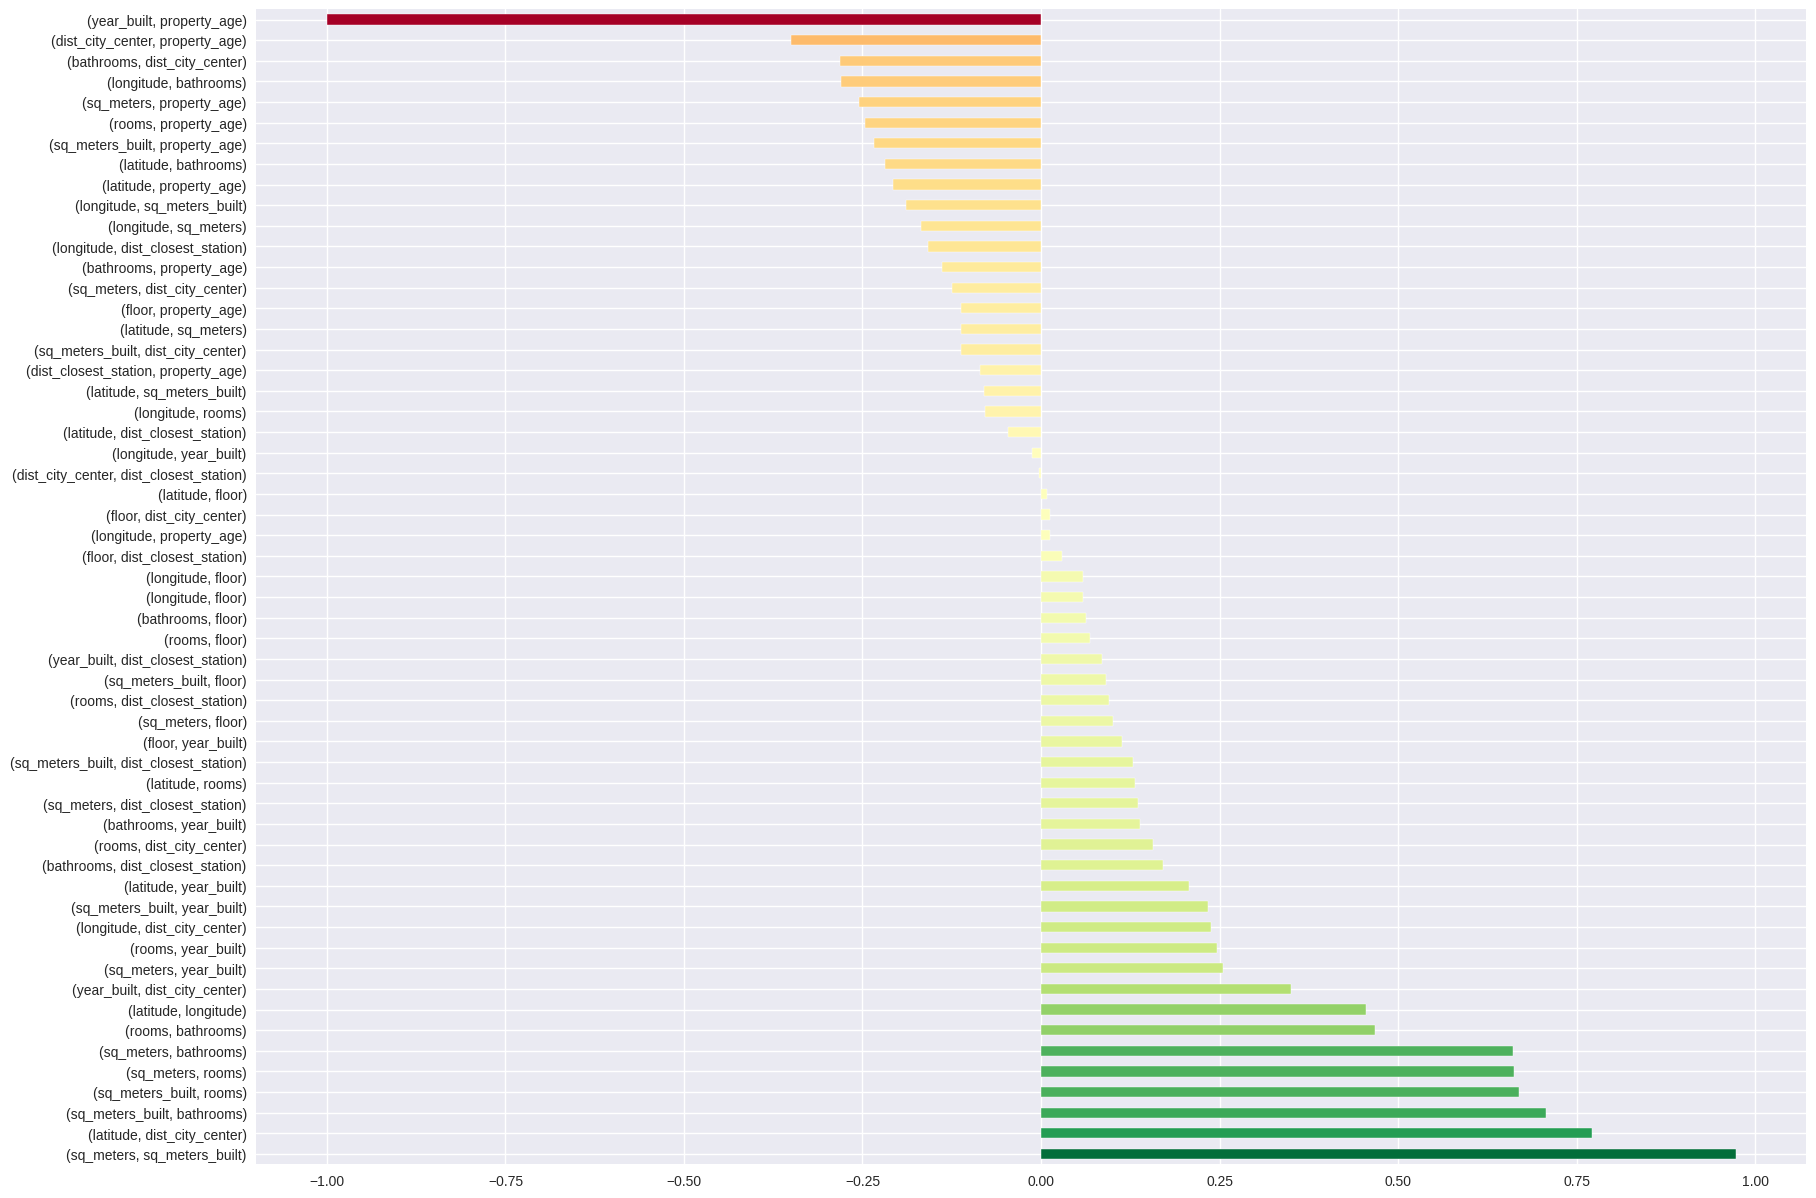

In [506]:
# correlación entre las variables numéricas (excluyendo el precio)
plot_corr_barchart(sale_clean_df, target = TARGET_VARIABLE, n=28) # spearman used because not all data is normalized

In [511]:
def plot_corr_vs_target(df1: pd.DataFrame, target: str, n: int) -> None:
    """
    Plots a color-gradient bar chart showing top n correlations between features and target
    Args:
        target (str): the name of the target column
        df1 (pd.DataFrame): the dataframe to plot
        n (int): number of top n correlations to plot
    Returns:
        None
    """
    print(f"Correlation between numeric features and the target variable {target}\n")

    # select the number of numeric features
    useful_columns =  len(df1.select_dtypes(include=['int64', 'float64']).columns)
    print(f"Max number of correlations (n): {useful_columns/2}\n")
    
    target_series = df1[target]
    
    x = df1.corrwith(target_series, method = 'spearman', numeric_only=True).sort_values(ascending=False)
    top_n = x[0:n]    
    bottom_n =  x[-n:]
    top_corr = pd.concat([top_n, bottom_n])
    x = top_corr
    print(x)

    fig, ax = plt.subplots(figsize=(8,4))
    norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax =1)
    colors = [plt.cm.RdYlGn(norm(c)) for c in x.values]
    x.plot.barh(color=colors)

Correlation between numeric features and the target variable price

Max number of correlations (n): 6.0

price                   1.000000
sq_meters_built         0.774952
sq_meters               0.742625
bathrooms               0.704410
rooms                   0.441490
dist_closest_station    0.174439
year_built              0.138385
floor                   0.128992
property_age           -0.138385
longitude              -0.280358
latitude               -0.377873
dist_city_center       -0.454986
dtype: float64


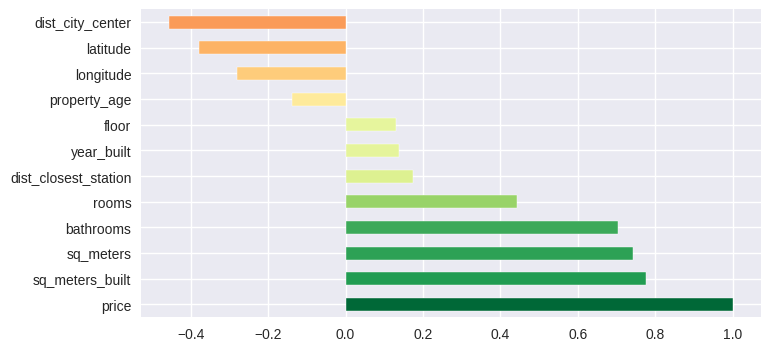

In [512]:
# Correlación entre las variables numéricas y la variable objetivo
plot_corr_vs_target(sale_clean_df, target = TARGET_VARIABLE, n=6) # spearman used because not all data is normalized

In [450]:
def calculate_correlation(df: pd.DataFrame, method: str, figsize: tuple = (6, 4)) -> pd.DataFrame:
    """
    Calculates the correlation matrix between numeric features in a pandas DataFrame using a specified correlation method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to calculate the correlation matrix for.
    method (str): The correlation method to use. Valid options are 'pearson', 'spearman', and 'kendall'.
    figsize (tuple): The size of the heatmap plot. Default is (6, 4).
    
    Returns:
    pd.DataFrame: The correlation matrix between numeric features in the DataFrame.
    """
    # select only the numeric features
    numeric_features = df.select_dtypes(include=['int64', 'float64'])
    X = numeric_features
    
    # scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # calculate correlation matrix
    if method == 'pearson':
        corr_matrix = pd.DataFrame(X_scaled).corr(method='pearson')
    elif method == 'spearman':
        corr_matrix = pd.DataFrame(X_scaled).corr(method='spearman')
    elif method == 'kendall':
        corr_matrix = pd.DataFrame(X_scaled).corr(method='kendall')
    else:
        raise ValueError("Invalid correlation method specified. Valid options are 'pearson', 'spearman', and 'kendall'.")
    
    # set column names of correlation matrix
    corr_matrix.columns = numeric_features.columns
    corr_matrix.index = numeric_features.columns
    
    # plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix ({method.capitalize()})")
    plt.show()
    
    return corr_matrix

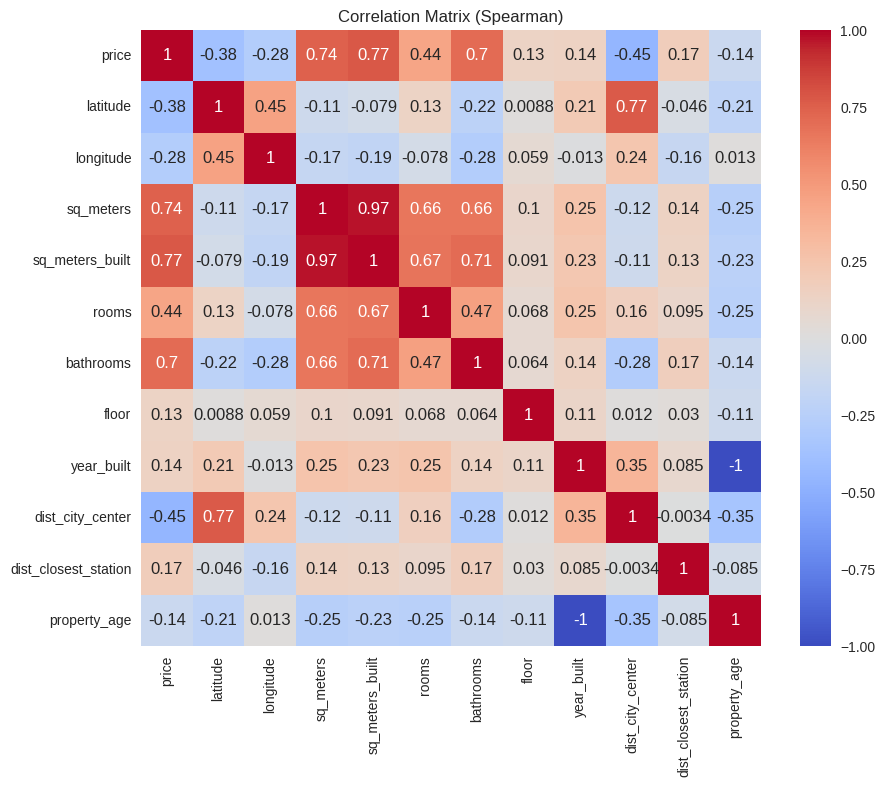

price  latitude  longitude  sq_meters  \
price                 1.000000 -0.377873  -0.280358   0.742625   
latitude             -0.377873  1.000000   0.454752  -0.112577   
longitude            -0.280358  0.454752   1.000000  -0.167688   
sq_meters             0.742625 -0.112577  -0.167688   1.000000   
sq_meters_built       0.774952 -0.079186  -0.188934   0.973256   
rooms                 0.441490  0.131575  -0.077787   0.661800   
bathrooms             0.704410 -0.218992  -0.280341   0.660900   
floor                 0.128992  0.008817   0.058956   0.100506   
year_built            0.138385  0.207303  -0.013011   0.254260   
dist_city_center     -0.454986  0.770960   0.237770  -0.124698   
dist_closest_station  0.174439 -0.046087  -0.157681   0.135769   
property_age         -0.138385 -0.207303   0.013011  -0.254260   

                      sq_meters_built     rooms  bathrooms     floor  \
price                        0.774952  0.441490   0.704410  0.128992   
latitude                    -0.079186  0.131575  -0.218992  0.008817   
longitude                   -0.188934 -0.077787  -0.280341  0.058956   
sq_meters                    0.973256  0.661800   0.660900  0.100506   
sq_meters_built              1.000000  0.669373   0.707718  0.091488   
rooms                        0.669373  1.000000   0.467502  0.068118   
bathrooms                    0.707718  0.467502   1.000000  0.063666   
floor                        0.091488  0.068118   0.063666  1.000000   
year_built                   0.234041  0.246641   0.138837  0.112753   
dist_city_center            -0.112460  0.157014  -0.281263  0.012349   
dist_closest_station         0.128468  0.094520   0.171199  0.029524   
property_age                -0.234041 -0.246641  -0.138837 -0.112753   

                      year_built  dist_city_center  dist_closest_station  \
price                   0.138385         -0.454986              0.174439   
latitude                0.207303          0.770960             -0.046087   
longitude              -0.013011          0.237770             -0.157681   
sq_meters               0.254260         -0.124698              0.135769   
sq_meters_built         0.234041         -0.112460              0.128468   
rooms                   0.246641          0.157014              0.094520   
bathrooms               0.138837         -0.281263              0.171199   
floor                   0.112753          0.012349              0.029524   
year_built              1.000000          0.350263              0.085339   
dist_city_center        0.350263          1.000000             -0.003384   
dist_closest_station    0.085339         -0.003384              1.000000   
property_age           -1.000000         -0.350263             -0.085339   

                      property_age  
price                    -0.138385  
latitude                 -0.207303  
longitude                 0.013011  
sq_meters                -0.254260  
sq_meters_built          -0.234041  
rooms                    -0.246641  
bathrooms                -0.138837  
floor                    -0.112753  
year_built               -1.000000  
dist_city_center         -0.350263  
dist_closest_station     -0.085339  
property_age              1.000000

In [513]:
calculate_correlation(sale_clean_df, method="spearman", figsize= (10,8)) # spearman used because not all data is normalized

Del análisis de correlación observamos lo siguiente:
- year_built y property_age en realidad son la misma variable pero expresada de distinta manera, por eso tenemos una correlación de -1. Deberemos eliminar year_built ya que no nos proporciona tanta información como property_age.

- sq_meters y sq_meters_built tienen un coeficiente de correlación de 0.97, lo que indica que están casi perfectamente correlacionados de forma positiva. Deberemos elegir una y eliminar la otra. 

- latitude y dist_city_center también están fuertemente correlacionadas positivamente.

- sq_meters_built está fuertemente correlacionada con bathrooms y rooms. 

- Con la variable objetivo price, están correlacionadas positivamente sq_meters_built, sq_meters, y bathrooms, lo que indica que podrían ser buenas predictoras de la variable objetivo price.  

#### Elección entre sq_meters y sq_meters_built 

Tenemos sq_meters_built (metros cuadrados construidos de la vivienda) y sq_meters (metros cuadrados de la vivienda (habitables)). 

El que nos interesa en realidad son los metros cuadrados habitables de la vivienda, no el construido (que siempre es mayor que el habitable).

No obstante, sq_meters tiene valores nulos mientras que sq_meters_built no . Por tanto, podría ser una buena idea ver si sq_meters y sq_meters_built están correlacionadas, y en el caso que lo estén, quedarnos con sq_meters_built. Como hemos visto en el análisis de correlación, sí que lo están. Volvamos a verlo: 


**Normality Tests**:
- Jarque–Bera test
    - funciona bien en muestras grandes (normalmente superiores a 2000 observaciones).
- Quantile-Quantile Plot


In [514]:
# Data preparation 
sq_meters = sale_clean_df['sq_meters'].values
sq_meters_clean = sq_meters[~np.isnan(sq_meters)]
sq_meters_built = sale_clean_df['sq_meters_built'].values
sq_meters_built_clean = sq_meters_built[~np.isnan(sq_meters_built)]

# Check length of the data
print(len(sq_meters_clean))
print(len(sq_meters_built_clean))

2589
4677


In [515]:
# Jarque–Bera test for Normality

# Function to check normality
def check_normality(pvalue):
    if pvalue > 0.05:
        print('Since the p-value > 0.05, we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.')
    else:
        print('Since p-value ≤ 0.05, we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.')

# Perform Jarque-Bera test
print(stats.jarque_bera(sq_meters_clean))
statistic, pvalue = jarque_bera(sq_meters_clean)
check_normality(pvalue)
print("\n")
print(stats.jarque_bera(sq_meters_built_clean))
statistic, pvalue = jarque_bera(sq_meters_built_clean)
check_normality(pvalue)

Jarque_beraResult(statistic=240077.538719649, pvalue=0.0)
Since p-value ≤ 0.05, we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.


Jarque_beraResult(statistic=328176.0017057933, pvalue=0.0)
Since p-value ≤ 0.05, we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.


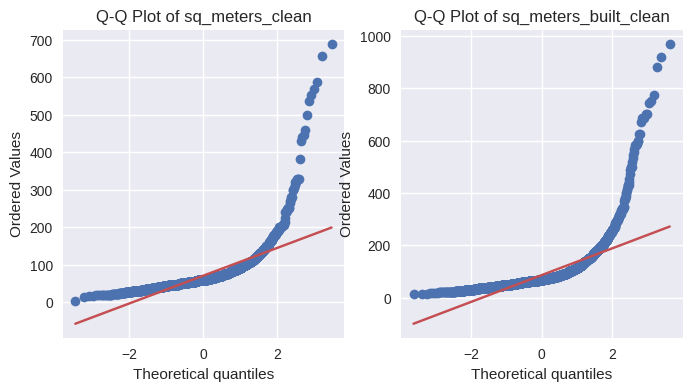

In [516]:
# figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# first Q-Q plot on the left subplot
stats.probplot(sq_meters_clean, dist='norm', plot=ax1)
ax1.set_title('Q-Q Plot of sq_meters_clean')

# second Q-Q plot on the right subplot
stats.probplot(sq_meters_built_clean, dist='norm', plot=ax2)
ax2.set_title('Q-Q Plot of sq_meters_built_clean')

# titles
ax1.set_title('Q-Q Plot of sq_meters_clean')
ax2.set_title('Q-Q Plot of sq_meters_built_clean')

plt.show()

- Ni sq_meters ni sq_meters_built siguen una distribución normal.
- Debemos utilizar métodos no paramétricos de correlación de rangos: prueba rho de Spearman o prueba tau de Kendall.

**Spearman’s rho test**

In [517]:
# Spearman’s rho test: correlación de Spearman entre sq_meters y sq_meters_built
pg.corr(sale_clean_df['sq_meters'], sale_clean_df['sq_meters_built'], method='spearman')

n         r         CI95%  p-val  power
spearman  2589  0.973256  [0.97, 0.98]    0.0    1.0

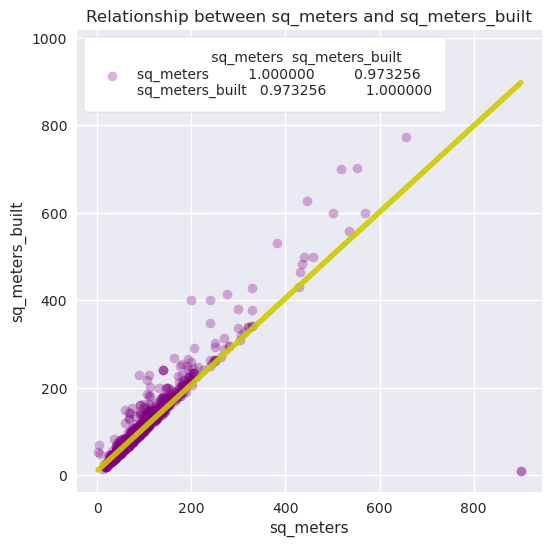

In [518]:
# Correlation scatter plot with the linear regression fit line
plt.figure(figsize=(6, 6))       
fig = sns.regplot(x="sq_meters", y="sq_meters_built", data=raw_data, ci=None, 
                  label="{}".format(sale_clean_df[['sq_meters','sq_meters_built']].corr(method='spearman')), 
                  fit_reg=True, scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': '#CCCC00', 'alpha': 0.9, 'lw':4})
fig.set(xlabel='sq_meters', ylabel='sq_meters_built', title = "Relationship between sq_meters and sq_meters_built")
sns.set_style('darkgrid') 
plt.legend(facecolor='white',frameon=True, fancybox=True, framealpha=1, borderpad=1)
  # facecolor: The legend's background color
  # frameon: Whether the legend should be drawn on a patch (frame).
  # fancybox: Whether round edges should be enabled around the FancyBboxPatch which makes up the legend's background.
  # framealpha: The alpha transparency of the legend's background
  # borderpad: The fractional whitespace inside the legend border, in font-size units.
plt.show()

- El coeficiente de correlación de Spearman (r) es de 0.97, lo que indica que hay una correlación muy fuerte y positiva entre las variables sq_meters y sq_meters_built. Además, el p-value es 0, lo que significa que esta correlación es muy significativa estadísticamente.

- Por tanto, podemos decir que estas dos variables están altamente correlacionadas y que podría ser una buena idea quedarnos con sq_meters_built ya que no tiene valores nulos y nos da la misma información que sq_meters.

#### Tratamiento de sq_meters_built en relación al número de habitaciones y de baños



Queremos evitar tener variables autocorrelacionadas entre sí en nuestro modelo. 

Como hemos visto en el análisis de correlación, sq_meters_built está correlacionada con bathrooms y rooms:

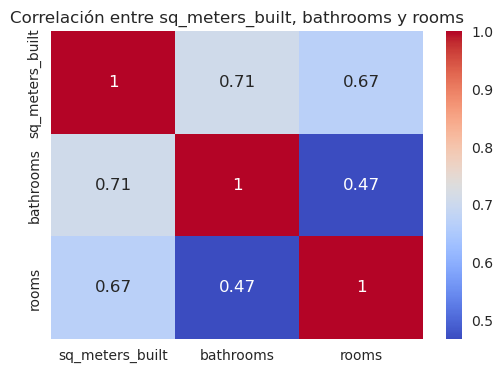

                 sq_meters_built  bathrooms     rooms
sq_meters_built         1.000000   0.707718  0.669373
bathrooms               0.707718   1.000000  0.467502
rooms                   0.669373   0.467502  1.000000


In [519]:
# Creamos una matriz de correlación con los valores del dataset
corr_matrix = sale_clean_df[['sq_meters_built', 'bathrooms', 'rooms']].corr(method='spearman')

# Configuramos el tamaño de la figura
plt.figure(figsize=(6, 4))

# Generamos el heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Añadimos el título
plt.title('Correlación entre sq_meters_built, bathrooms y rooms')

# Mostramos la figura
plt.show()

print(corr_matrix)

- En este caso, Spearman es más adecuado ya que no podemos asumir que las variables siguen una distribución normal.

- Como se puede observar en la matriz de correlación, la variable sq_meters_built está correlacionada con bathrooms y rooms.  

- Podemos observar una correlación positiva fuerte entre sq_meters_built y bathrooms (0.71) y también una correlación moderada entre sq_meters_built y rooms (0.66).

- Es común que los inmuebles con más metros cuadrados construidos tengan más baños y habitaciones. A medida que aumenta el número de metros cuadrados construidos, también es probable que aumente el número de baños y habitaciones en el inmueble. Sin embargo, debemos recordar que la correlación no implica causalidad, es decir, no podemos afirmar que el tamaño del inmueble es la única razón detrás del aumento en el número de baños y habitaciones.


Podemos decorrelar variables haciendo uso de la redes Bayesianas siempre y cuando encontremos una tercera variable que sea la causante del crecimiento o decrecimiento de las dos. 

¿Qué causa qué una vivienda tenga más baños o habitaciones? Los metros cuadrados. En este caso, el tamaño de la vivienda nos servirá para decorrelar el número de habitaciones y el número de baños.

Por tanto, el número de habitaciones y el número de baños tienen relación con el número de metros cuadrados, entonces calculamos la proporción de habitaciones por metro cuadrado y baños por metro cuadrado. Es decir, vamos a poner habitaciones por metro cuadrado y baños por metro cuadrado. De esta forma estamos decorrelandolas de la que causa esto y le podemos dar más información al modelo. 

Multiplicamos por 100 el número de habitaciones y de baños para que tenga más sentido: habitaciones y baños por cada 100 metros cuadrados. 

In [520]:
sale_clean_df['rooms_per_100_sqm'] = sale_clean_df['rooms'] * 100 / sale_clean_df['sq_meters_built']
sale_clean_df['bathrooms_per_100_sqm'] = sale_clean_df['bathrooms'] * 100 / sale_clean_df['sq_meters_built']

In [523]:
display(sale_clean_df.head(3))
print(sale_clean_df.shape)

price   latitude  longitude  sq_meters  sq_meters_built  rooms  \
0  2290000  41.409071   2.099850      383.0              532      5   
1    90000  41.434545   2.171110       42.0               50      1   
2   145000  41.444518   2.175309        NaN               53      3   

   bathrooms balcony terrace exterior orientation  floor rooftop elevator  \
0          6       1       1        0         sur    4.0       0        0   
1          1       0       0        1       norte    NaN       0        1   
2          1       1       0        1     Unknown    2.0       0        0   

  pool ac     heating  year_built                            neighborhood  \
0    1  1  individual      2002.0  Vallvidrera - El Tibidabo i les Planes   
1    0  1       bomba      1960.0       Can Peguera - El Turó de la Peira   
2    0  0     Unknown         NaN                                  Verdun   

   dist_city_center garage         property_type garden  dist_closest_station  \
0          6.302847      1  chalet_independiente      1              2.949904   
1          5.189265      0                  piso      0              0.329115   
2          6.313668      0                  piso      0              0.284071   

   property_age property_age_cat floor_cat neighborhood_rent_index  \
0          21.0           0 - 40     0 - 4                   +3253   
1          63.0          40 - 70   Unknown                0 - 2336   
2           NaN          Unknown     0 - 4                0 - 2336   

  neighborhood_rent_index_cluster  rooms_per_100_sqm  bathrooms_per_100_sqm  
0                     3371 - 5042           0.939850               1.127820  
1                        0 - 2337           2.000000               2.000000  
2                        0 - 2337           5.660377               1.886792

(4677, 31)


- Ahora tenemos dos nuevas variables que expresan el número de habitaciones y baños por cada 100 metros cuadrados. Estas variables pueden ser más útiles para predecir el precio de venta, ya que proporcionan información más detallada sobre la relación entre la superficie y las habitaciones/baños.

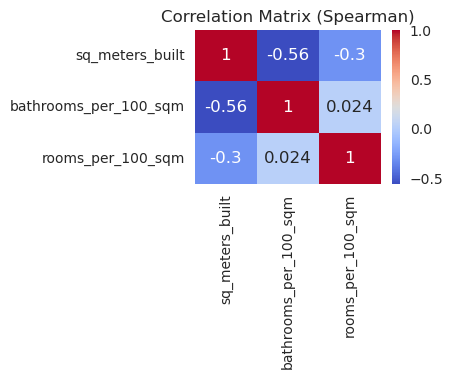

sq_meters_built  bathrooms_per_100_sqm  \
sq_meters_built               1.000000              -0.563598   
bathrooms_per_100_sqm        -0.563598               1.000000   
rooms_per_100_sqm            -0.304545               0.023556   

                       rooms_per_100_sqm  
sq_meters_built                -0.304545  
bathrooms_per_100_sqm           0.023556  
rooms_per_100_sqm               1.000000

In [542]:
# correlación entre sq_meters_built y bathrooms_per_100_sqm y rooms_per_100_sqm
calculate_correlation(sale_clean_df[['sq_meters_built', 
                                   'bathrooms_per_100_sqm', 
                                   'rooms_per_100_sqm']], 
                      method="spearman", 
                      figsize= (3,2)) # spearman used because not all data is normalized

- Estas 3 variables (habitaciones por cada 100 metros cuadrados, baños por cada 100 metros cuadrados y número de metros cuadrados) no están correlacionadas entre sí. 
    - probablemente tengan un poco de relación (las casas con muchos metros cuadrados a lo mejor tendrán más número de habitaciones por cada 100 metros cuadrados) pero no será como antes que teníamos una relación lineal. 
    - como ahora estas 3 variables no están correlacionadas entre sí, podemos incluirlas en el modelo. 

## Distribución de las variables categóricas

Ahora que tenemos el dataset con las modificaciones adecuadas (tratamiento de missing values, eliminación de variables no relevantes, feature engineering y creación de nuevas variables), podemos visualizar la distribución de las variables categóricas. 

Primero convertimos todas las variables que sean categóricas a 'category': 

In [544]:
sale_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 0 to 4676
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   price                            4677 non-null   int64   
 1   latitude                         4677 non-null   float64 
 2   longitude                        4677 non-null   float64 
 3   sq_meters                        2589 non-null   float64 
 4   sq_meters_built                  4677 non-null   int64   
 5   rooms                            4677 non-null   int64   
 6   bathrooms                        4677 non-null   int64   
 7   balcony                          4677 non-null   category
 8   terrace                          4677 non-null   category
 9   exterior                         4677 non-null   category
 10  orientation                      4677 non-null   category
 11  floor                            2997 non-null   float64 
 12  roofto

- Observamos que todas las variables categóricas ya están como 'category'. 


Si alguna no estuviera como 'category' podríamos usar el siguiente pipeline para convertirlas al tipo de dato 'category' (no lo haremos ahora ya que ya están en el formato correcto, pero lo dejamos a modo de ejemplo o para futuros usos):


In [546]:
# variables numéricas que son 0 y 1 y queremos convertir a categóricas (binarias)

binary_features = [ 'balcony',
                     'terrace',
                     'exterior',
                     'rooftop',
                     'elevator',
                     'pool',
                     'ac',
                     'garage',
                     'garden'
                   ]
# data types
sale_clean_df[binary_features].dtypes

In [7]:
# convertimos las categóricas de object a category:
def convert_object_to_category(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert object columns in a pandas dataframe to category data type.
    
    Parameters:
    df (pd.DataFrame): Input pandas dataframe
    
    Returns:
    pd.DataFrame: A copy of the input dataframe with object columns converted to category data type.
    """    
    # loop through columns and convert object columns to category
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')
    
    return df

# convertimos las variables numéricas que son 0 y 1 a categóricas (binarias): 
def convert_var_to_category(df: pd.DataFrame, cols: List[str]) -> pd.DataFrame:
    """
    Convert specified columns in a pandas dataframe to category data type.
    
    Parameters:
    df (pd.DataFrame): Input pandas dataframe
    cols (List[str]): List of column names to convert
    
    Returns:
    pd.DataFrame: A copy of the input dataframe with specified columns converted to category data type.
    """    
    # loop through specified columns and convert columns to category           
    # convertimos las variables numéricas que son 0 y 1 a categóricas (binarias) 
    for i in range(0,len(cols)):
        # primero las convertimos a int64 para eliminar los decimales: 0 y 1
        df[cols[i]] = df[cols[i]].astype("int64")
        # luego las convertimos a 'category': '0' y '1'
        df[cols[i]] = df[cols[i]].astype("category")
        
    return df

Definimos un pipeline para convertir las variables categóricas binarias a 'category', los tipos de dato 'object' a 'category' y obtener una lista con los nombres de las variables categóricas: 

In [550]:
# define the pipeline to obtain category variables
category_pipeline = Pipeline(steps=[
    ('convert_object_to_category', FunctionTransformer(convert_object_to_category)),
    ('convert_var_to_category', FunctionTransformer(convert_var_to_category, kw_args={'cols': binary_features})),
    ('column_transformer', ColumnTransformer(transformers=[
        ('select_category', 'passthrough', sale_clean_df.select_dtypes(include=['category']).columns.tolist())
    ]))
])

# define the transformer to obtain the category variable names
get_category_names = FunctionTransformer(
    lambda X, ct=category_pipeline.named_steps['column_transformer']:
        [ct.get_feature_names_out()[i][len('select_category__'):] for i in range(len(X[0]))]
)


# add the transformer to the pipeline
category_pipeline.steps.append(('get_category_names', get_category_names))

# apply the pipeline to the sample dataframe
category_vars = category_pipeline.fit_transform(sale_clean_df)

# print the resulting category variable names and types
print(f"Data types:\n\n{sale_clean_df.dtypes}")
print('\n')
print(f"Categorical variables:\n\n{category_vars}")
print('\n')
print(f"Number of categorical variables: {len(category_vars)}")


Data types:

price                                 int64
latitude                            float64
longitude                           float64
sq_meters                           float64
sq_meters_built                       int64
rooms                                 int64
bathrooms                             int64
balcony                            category
terrace                            category
exterior                           category
orientation                        category
floor                               float64
rooftop                            category
elevator                           category
pool                               category
ac                                 category
heating                            category
year_built                          float64
neighborhood                       category
dist_city_center                    float64
garage                             category
property_type                      category
garden             

In [553]:
# variables categóricas
category_vars

['balcony',
 'terrace',
 'exterior',
 'orientation',
 'rooftop',
 'elevator',
 'pool',
 'ac',
 'heating',
 'neighborhood',
 'garage',
 'property_type',
 'garden',
 'property_age_cat',
 'floor_cat',
 'neighborhood_rent_index',
 'neighborhood_rent_index_cluster']

**Binary variables**:

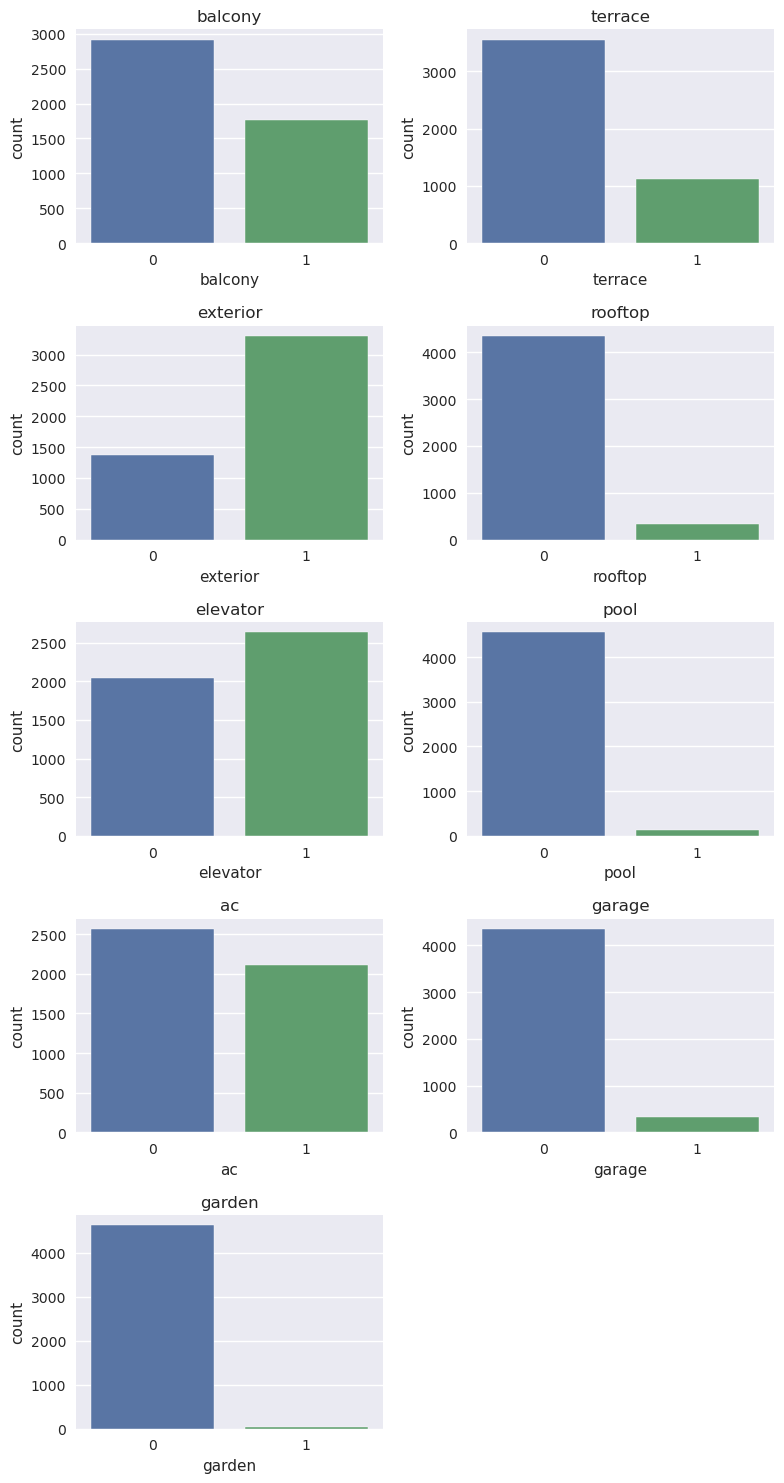

In [554]:
# Define the number of rows and columns for the subplot grid
num_plots = len(binary_features)
num_rows = 5
num_cols = 2

# Calculate the number of empty subplots to remove
num_empty_plots = num_rows * num_cols - num_plots

# Create the subplot grid and flatten it into a 1D array
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 15))
axs = axs.flatten()

# Plot the data on each subplot
for i, feature in enumerate(binary_features):
    sns.countplot(data=sale_clean_df, x=feature, ax=axs[i]) 
    axs[i].set_title(feature)

# Remove the extra empty subplots
for i in range(num_plots, num_plots + num_empty_plots):
    fig.delaxes(axs[i])

# Adjust the spacing between the subplots and display the figure
plt.tight_layout()
plt.show()



- Observamos un desbalanceo elevado en las variables rooftop, garage, pool y garden. La mayoría de viviendas de BCN no disponen de estas características. 

**Variables categóricas no binarias**: 

In [555]:
sale_clean_df.columns

Index(['price', 'latitude', 'longitude', 'sq_meters', 'sq_meters_built',
       'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation',
       'floor', 'rooftop', 'elevator', 'pool', 'ac', 'heating', 'year_built',
       'neighborhood', 'dist_city_center', 'garage', 'property_type', 'garden',
       'dist_closest_station', 'property_age', 'property_age_cat', 'floor_cat',
       'neighborhood_rent_index', 'neighborhood_rent_index_cluster',
       'rooms_per_100_sqm', 'bathrooms_per_100_sqm'],
      dtype='object')

In [556]:
non_binary_cat_var = [
                     'orientation',
                     'heating',
                     'neighborhood',
                     'property_type',
                     'property_age_cat',
                     'floor_cat',
                     'neighborhood_rent_index',
                     'neighborhood_rent_index_cluster']

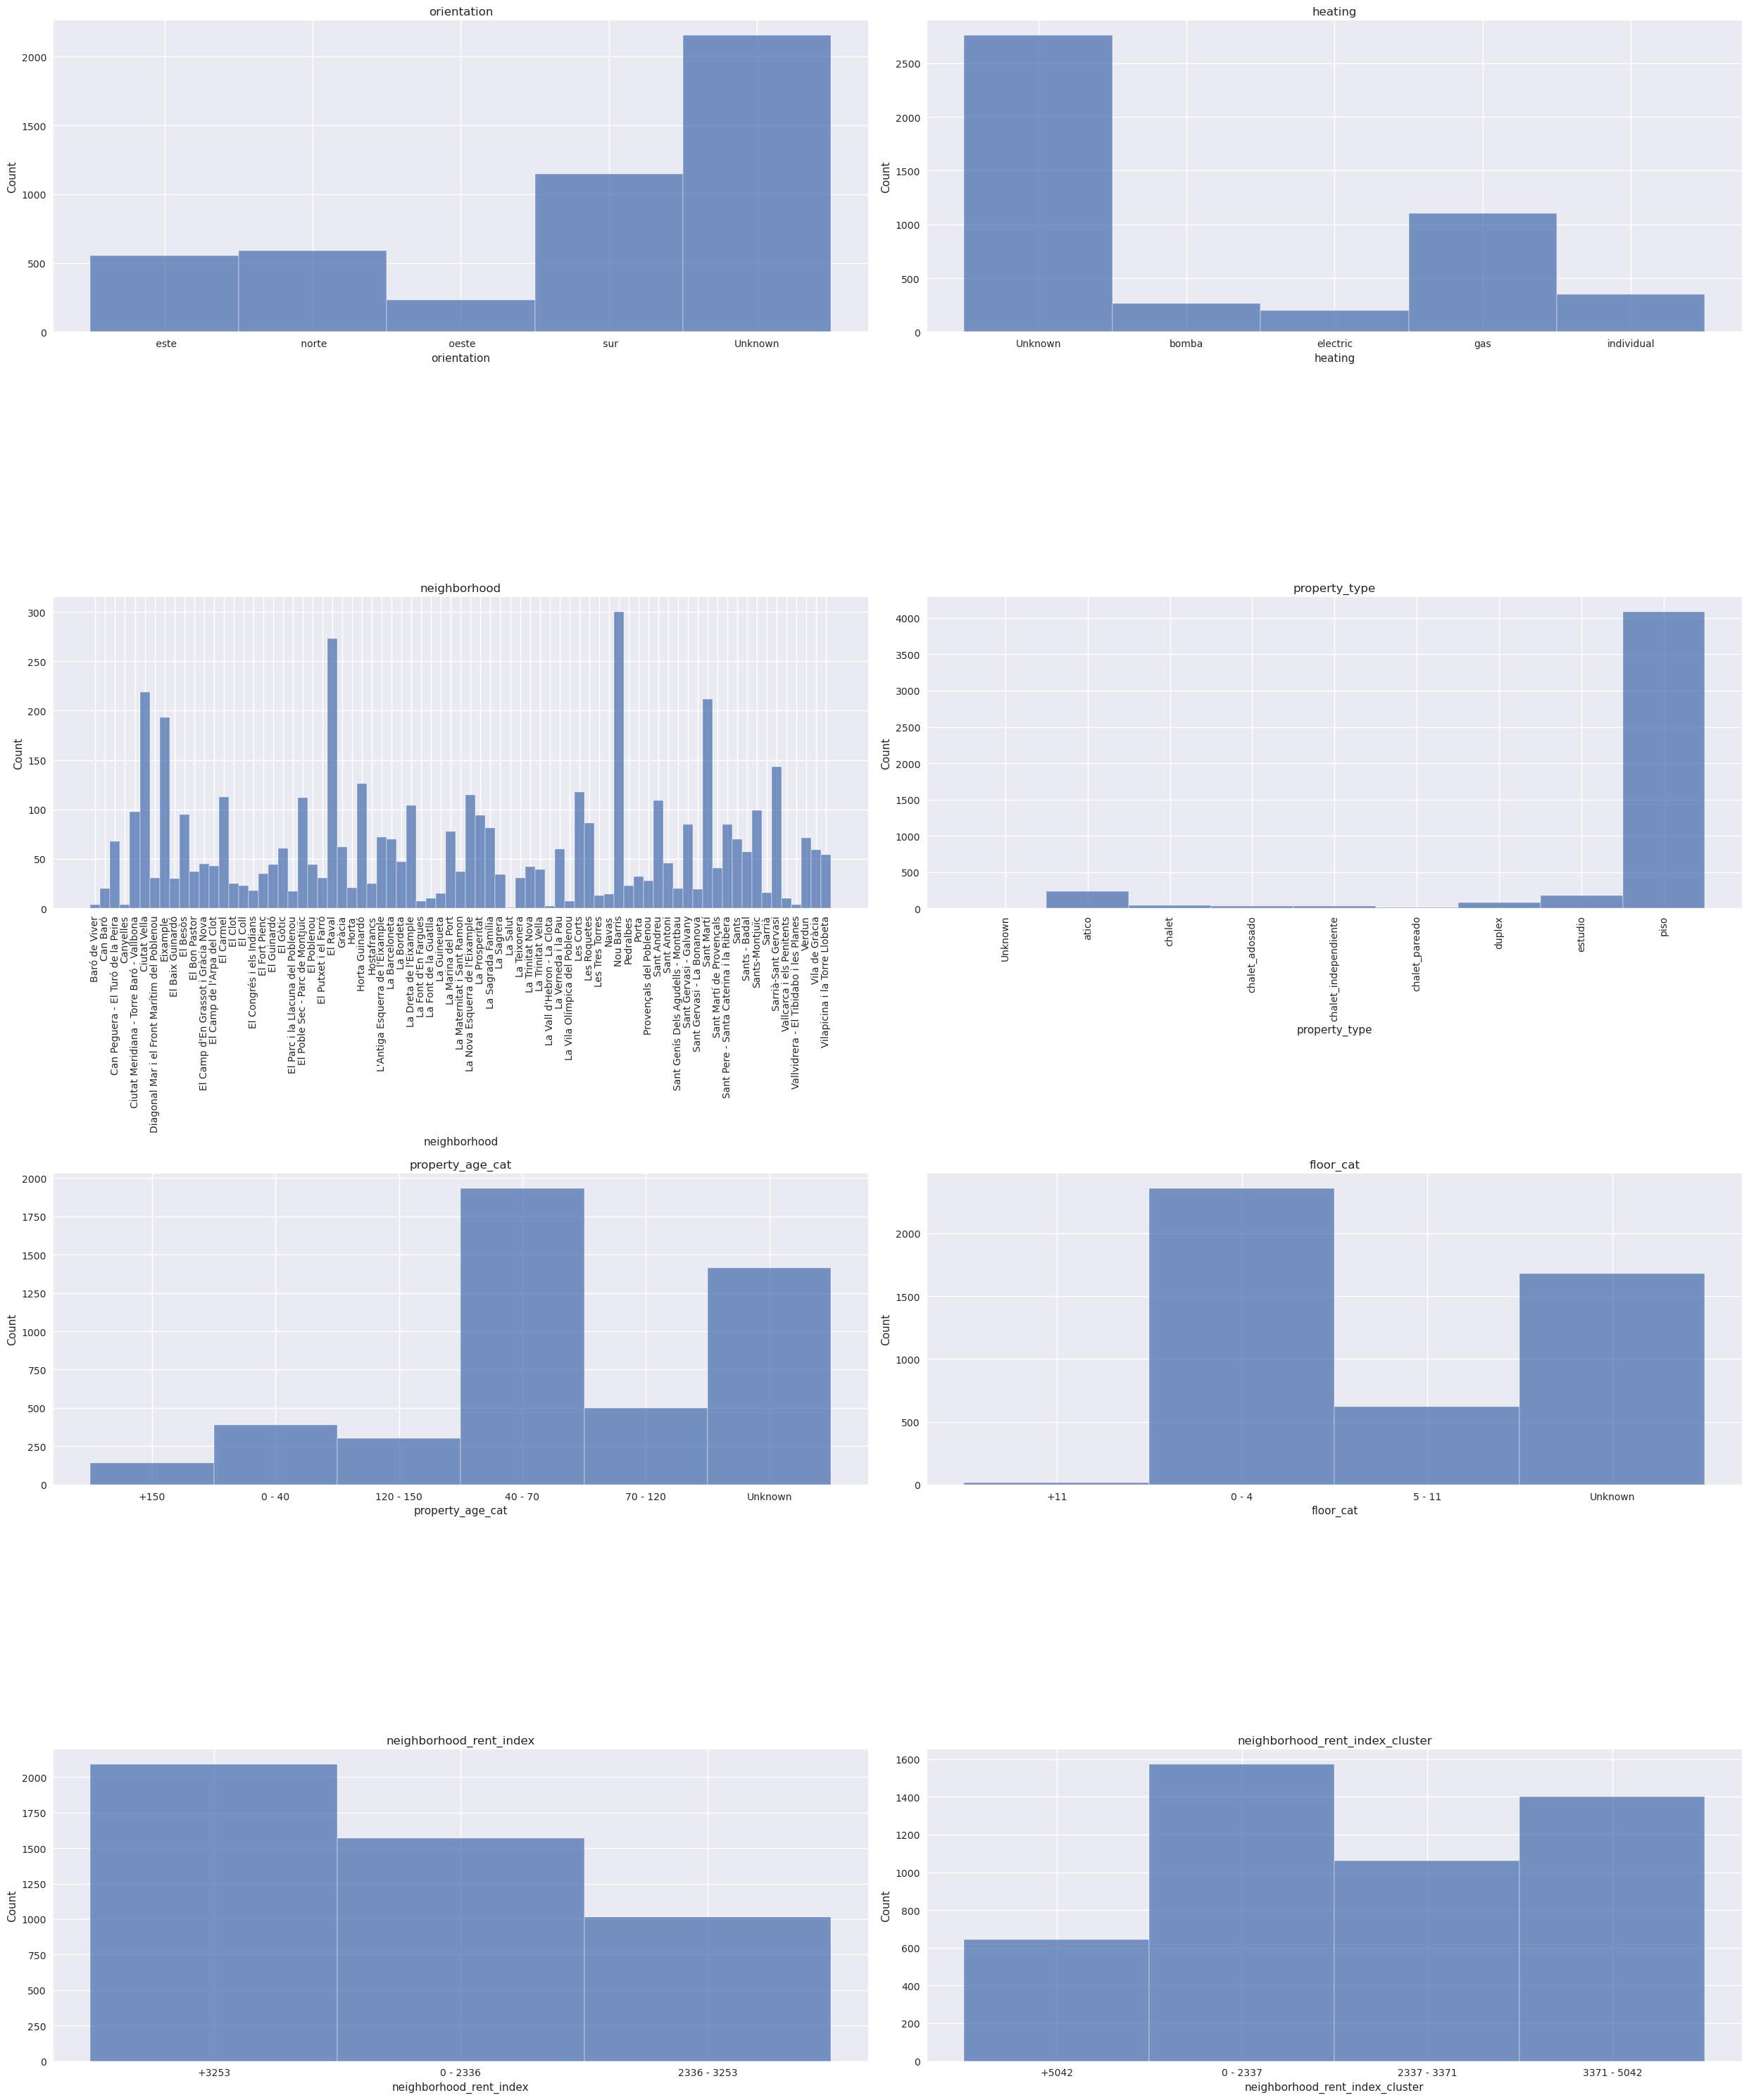

In [558]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(25, 30))
axs = axs.flatten()

for i, feature in enumerate(non_binary_cat_var):
    sns.histplot(data=sale_clean_df, x=feature, ax=axs[i], kde=False) 
    axs[i].set_title(feature)
    if feature in ['neighborhood', 'property_type']:
        axs[i].tick_params(axis='x', labelrotation=90)


plt.tight_layout()
plt.show()

- Observamos que la vivienda más común en BCN son los pisos. 
- La mayoría de viviendas tienen entre 40 y 70 años. 
- Neighborhood:
    - parece que el 'neighborhood_rent_index_cluster' refelja mejor la realidad que 'neighborhood_rent_index', ya que agrupa en 4 rangos en lugar de 3 y parece más equilibrado, ya que, por ejemplo, indica que la mayoría de viviendas tienen un precio por metro cuadrado de hasta 2337 euros y que las que tienen un precio por metro cuadrado de más de 5042 euros son pocas, lo que tiene sentido. Por tanto, nos quedaremos con 'neighborhood_rent_index_cluster'.

## Relación entre las variables categóricas y la variable objetivo price

In [559]:
# variables categóricas
category_vars

['balcony',
 'terrace',
 'exterior',
 'orientation',
 'rooftop',
 'elevator',
 'pool',
 'ac',
 'heating',
 'neighborhood',
 'garage',
 'property_type',
 'garden',
 'property_age_cat',
 'floor_cat',
 'neighborhood_rent_index',
 'neighborhood_rent_index_cluster']

**Violinplots**

In [562]:
def create_violinplots(df: pd.DataFrame, 
                       cat_cols: List[str], 
                       target_var: str, 
                       plot_width: int = 8, 
                       plot_height: int = 6) -> None:
    """
    Creates violin plots for the target variable across categorical variables in the given pandas DataFrame.

    Args:
        df (pd.DataFrame): The pandas DataFrame containing the data.
        cat_cols (List[str]): A list of the names of the categorical columns.
        target_var (str): The name of the target variable.
        plot_width (int): The width of the plot in inches. Default is 8.
        plot_height (int): The height of the plot in inches. Default is 6.


    Returns:
        None.
    """
    for col in cat_cols:
        #  if num_categories is greater than 10, the x-axis label rotation is set to 90 degrees, otherwise it is set to 0.
        num_categories = len(df[col].unique())
        if num_categories > 10:
            x_label_rotation = 90
        else: 
            x_label_rotation = 0    
            
        fig, ax = plt.subplots(figsize=(plot_width, plot_height))
        sns.violinplot(x=col, y=target_var, data=df, ax=ax)
        # show individual points
        sns.stripplot(x=col, y=target_var, data=df, jitter=False, color='black', size=4, alpha=0.5)
        # visualize the mean value on the violin plot
        sns.pointplot(x=col, y=target_var, data=df, color='red', ax=ax, errorbar=None)
        plt.title(f"Distribution of {target_var} by {col}")
        plt.xlabel(col)
        plt.ylabel(target_var)
        
        if x_label_rotation != 0:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=x_label_rotation)
        sns.despine()
        plt.show()

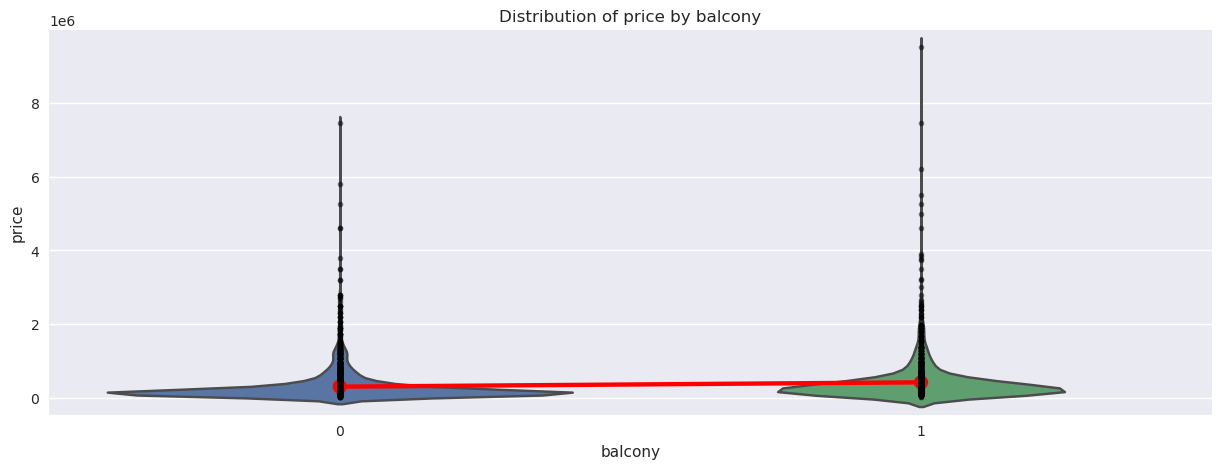

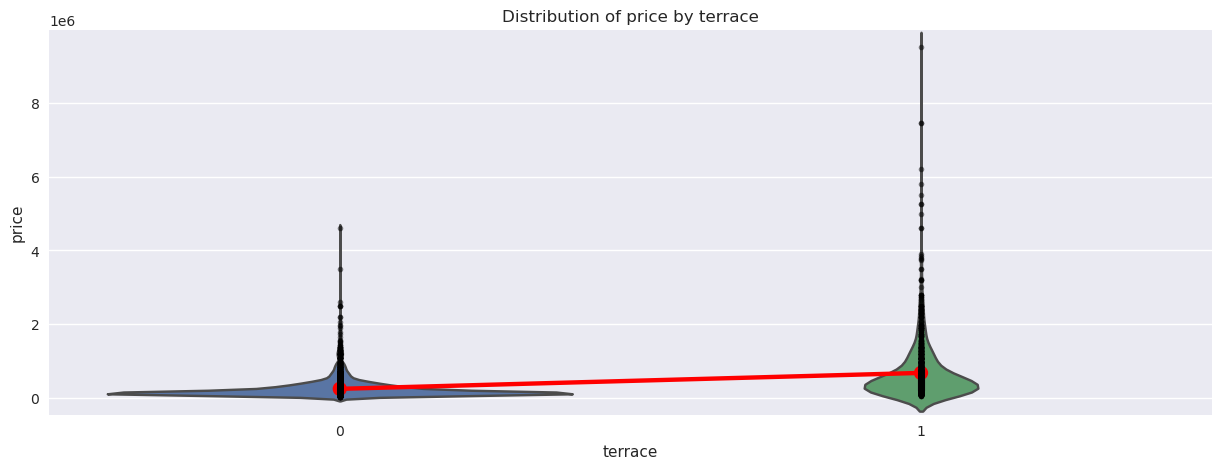

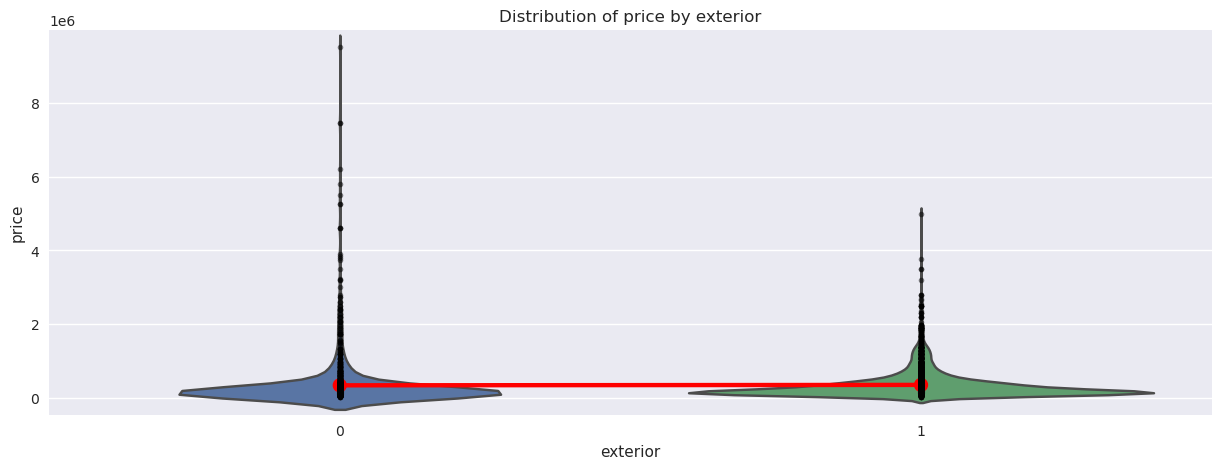

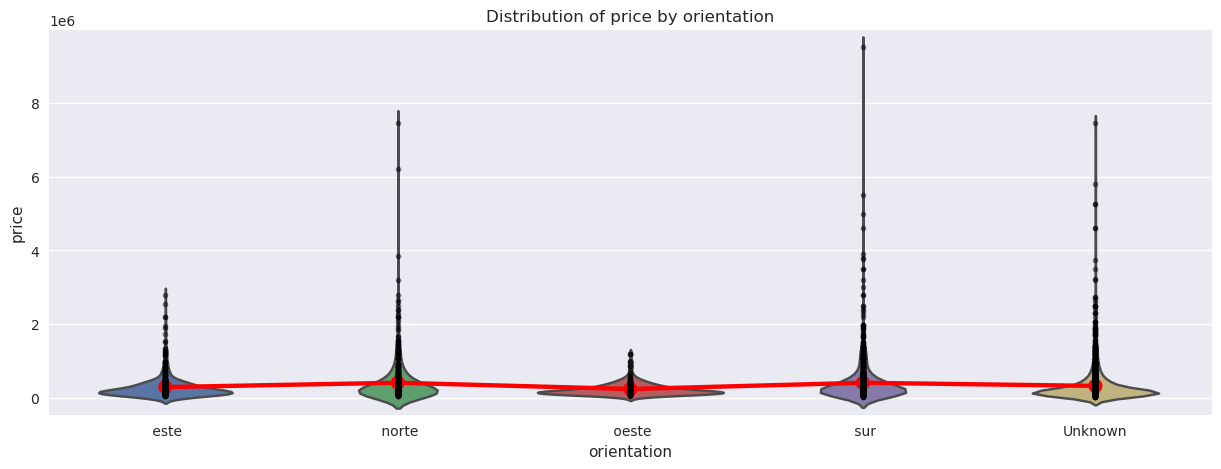

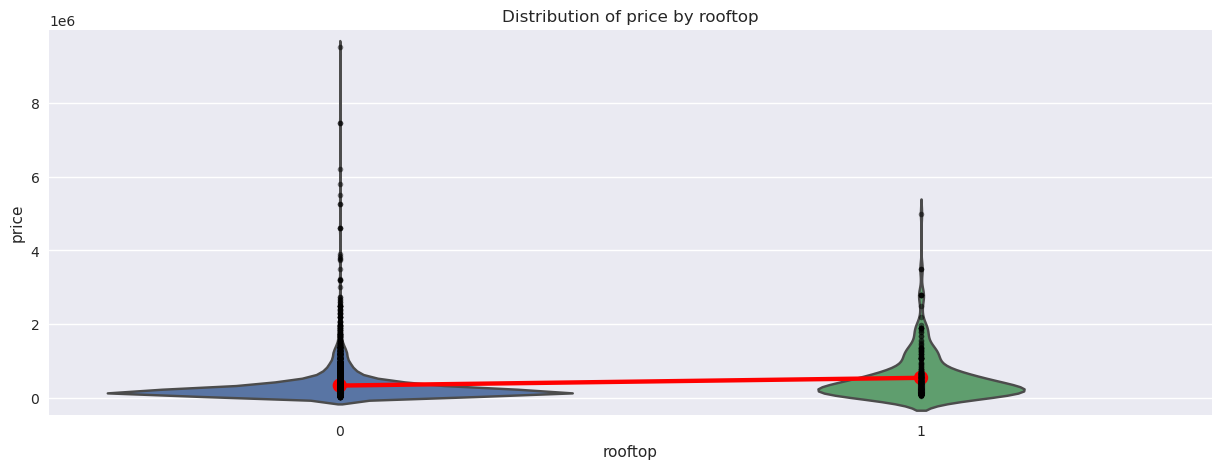

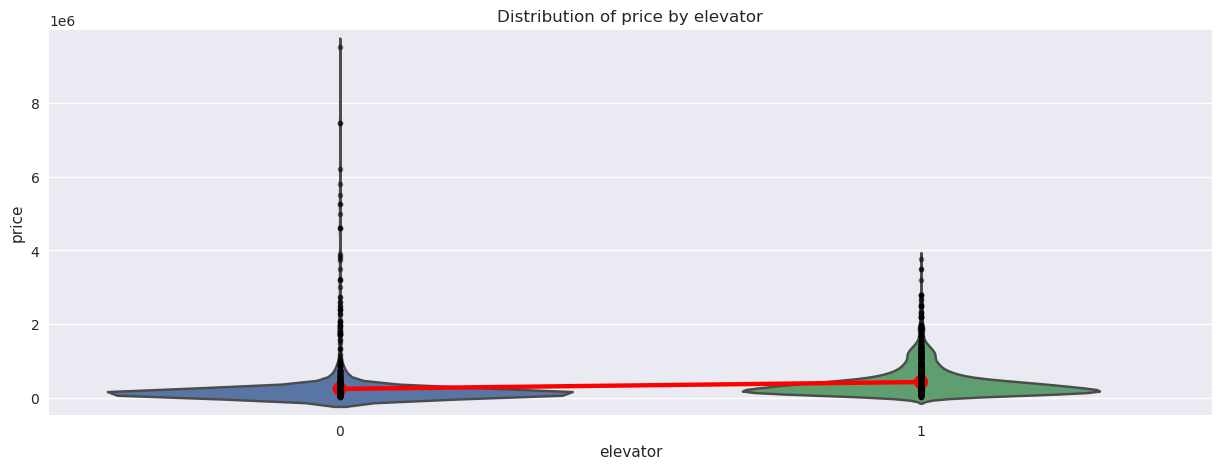

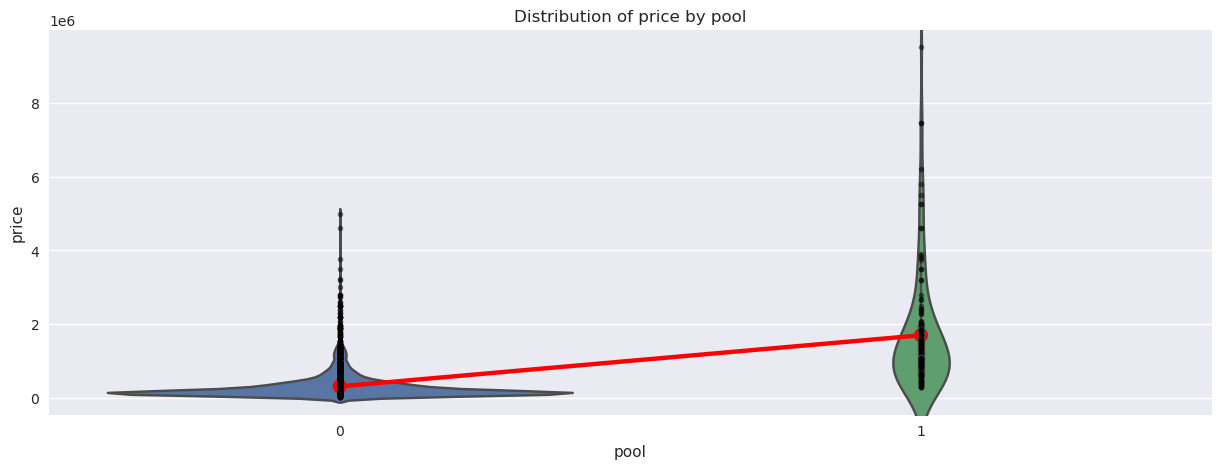

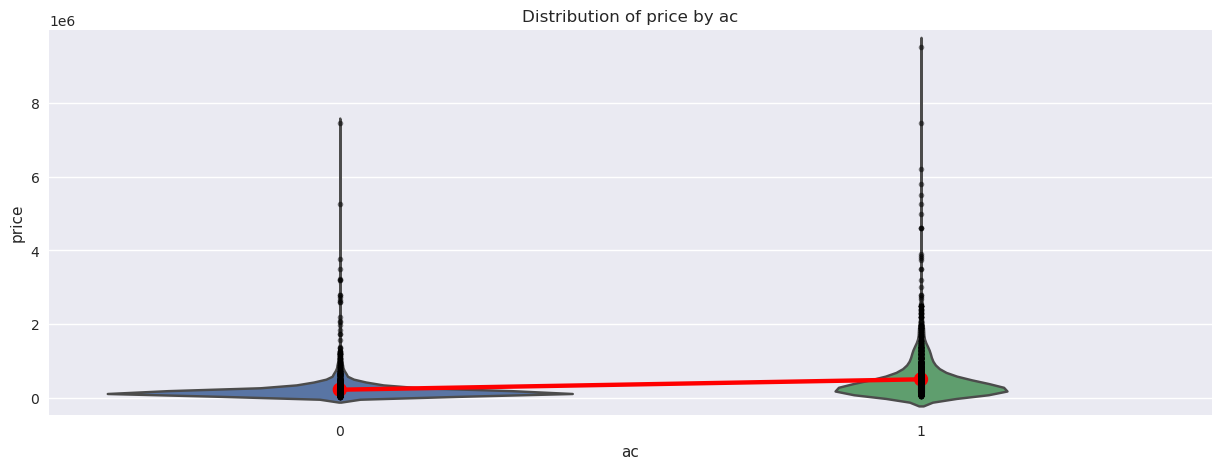

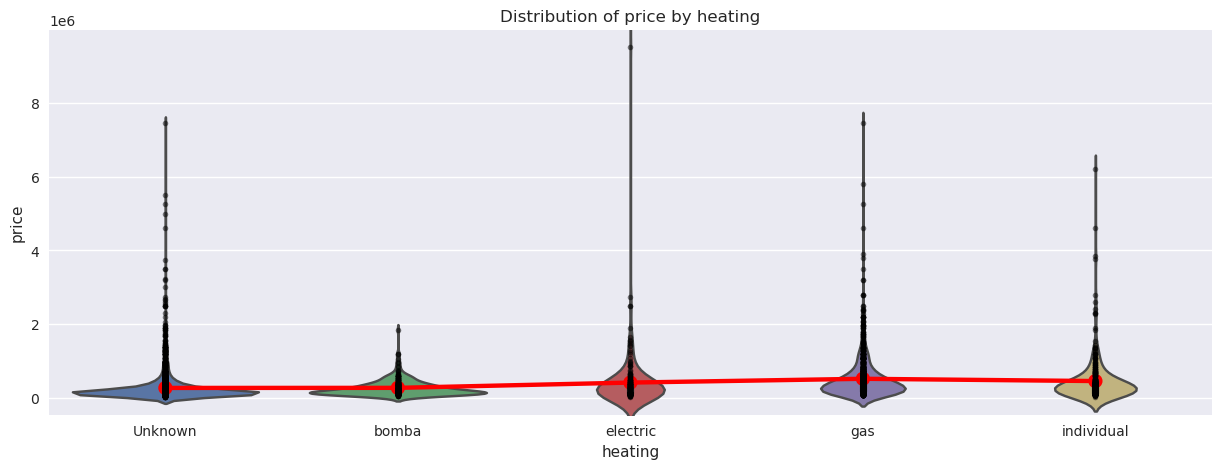

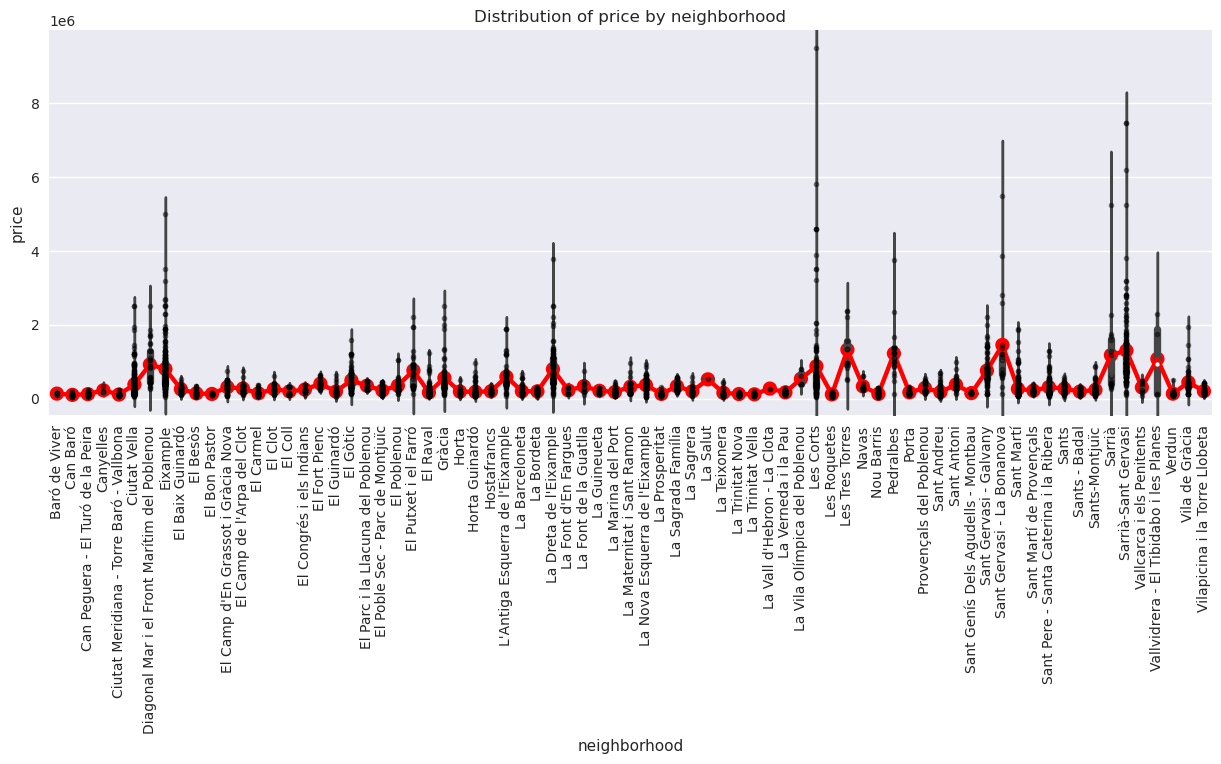

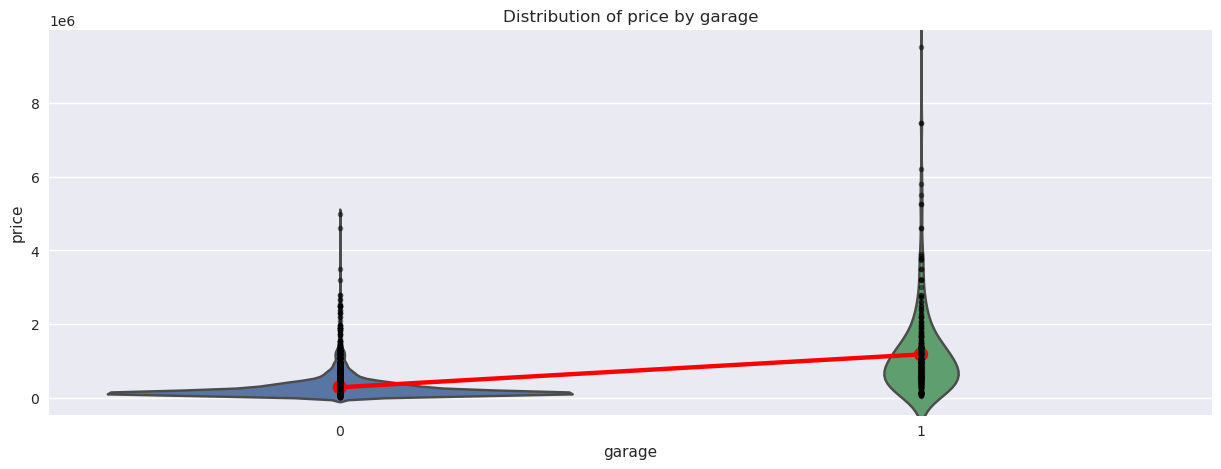

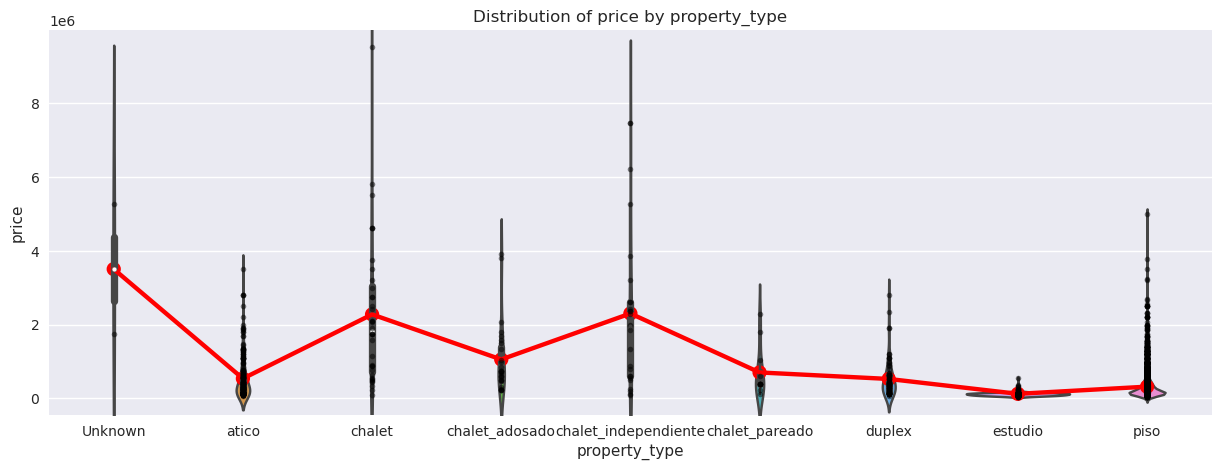

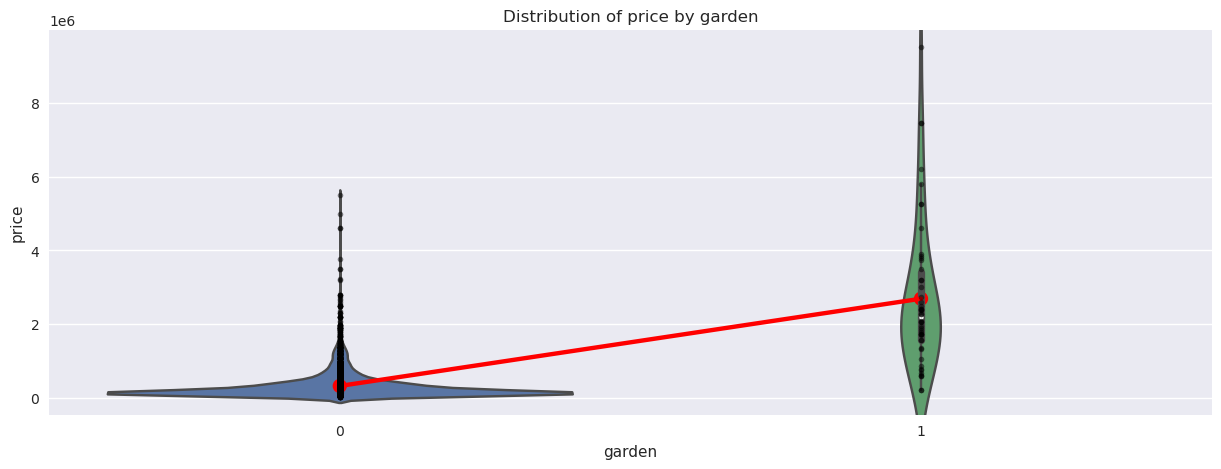

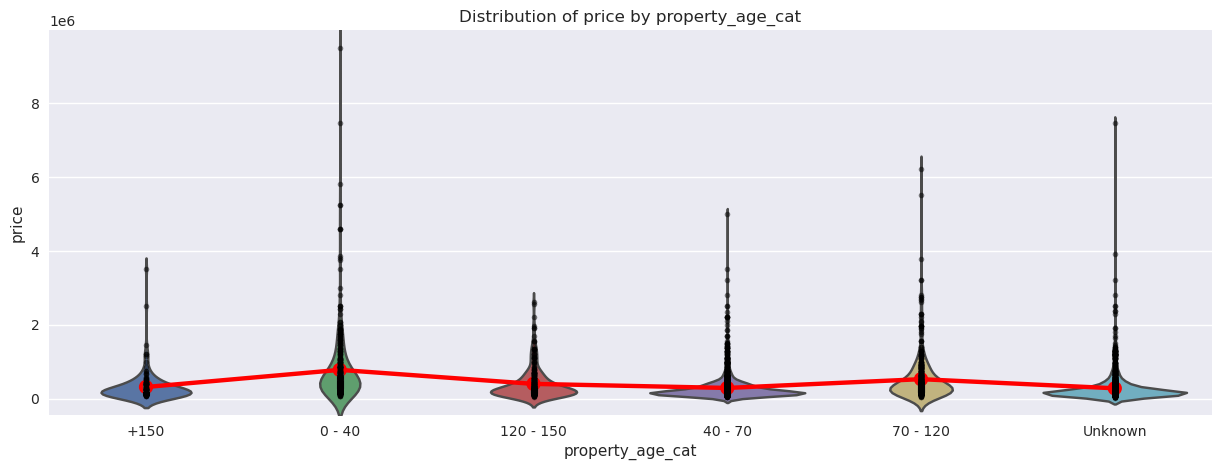

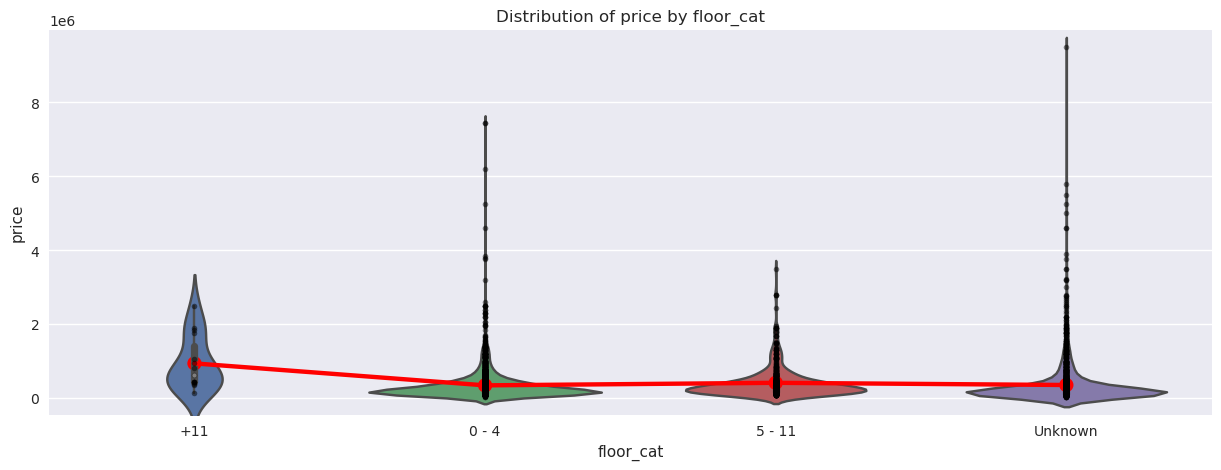

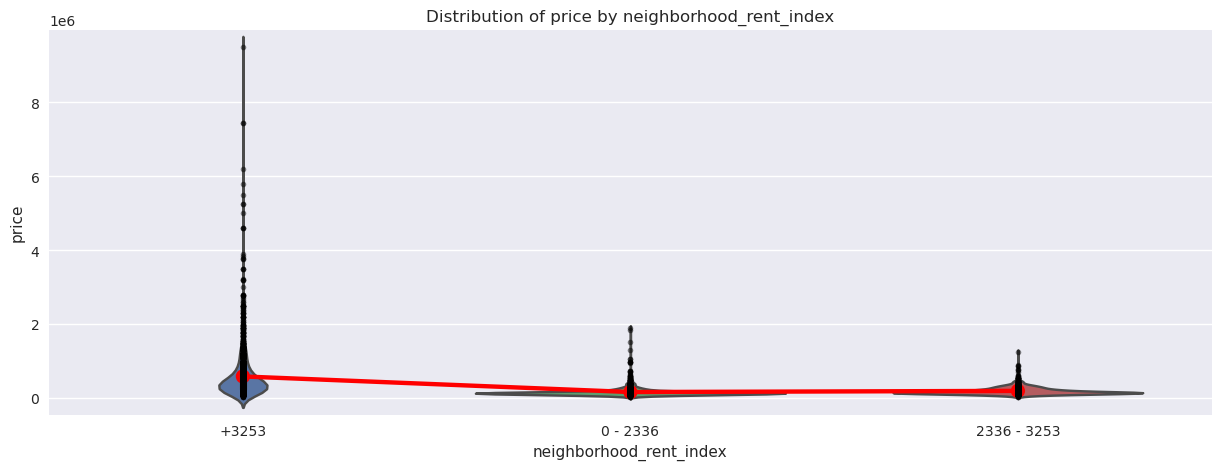

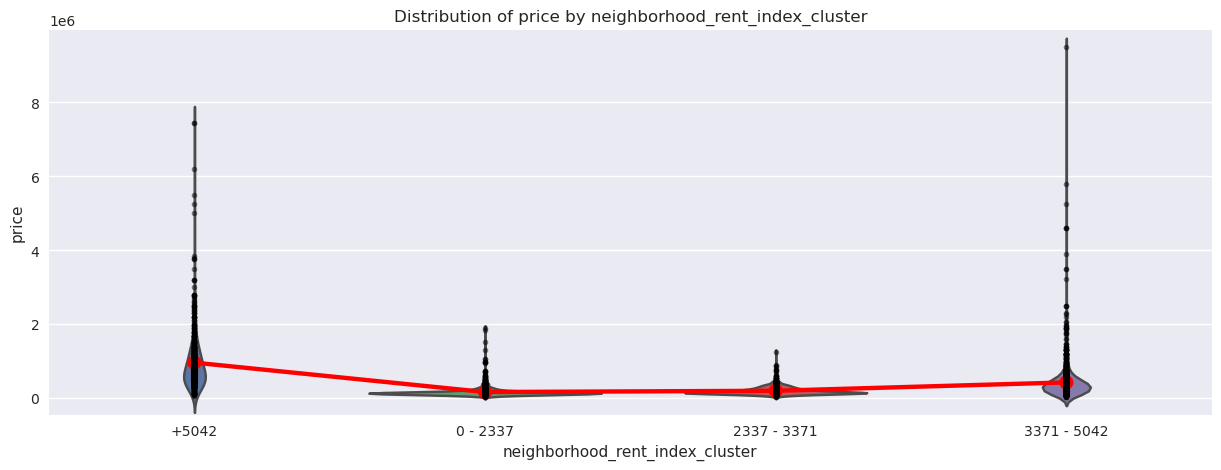

In [563]:
create_violinplots(sale_clean_df, category_vars, TARGET_VARIABLE, 15, 5)

**Boxplots**

In [564]:
def create_boxplots(df: pd.DataFrame, 
                    cat_cols: List[str], 
                    target_var: str, 
                    plot_width: int = 8, 
                    plot_height: int = 6) -> None:
    """
    Creates boxplots for the target variable across categorical variables in the given pandas DataFrame.

    Args:
        df (pd.DataFrame): The pandas DataFrame containing the data.
        cat_cols (List[str]): A list of the names of the categorical columns.
        target_var (str): The name of the target variable.
        plot_width (int): The width of the plot in inches. Default is 8.
        plot_height (int): The height of the plot in inches. Default is 6.


    Returns:
        None.
    """
    for col in cat_cols:
        #  if num_categories is greater than 10, the x-axis label rotation is set to 90 degrees, otherwise it is set to 0.
        num_categories = len(df[col].unique())
        if num_categories > 10:
            x_label_rotation = 90
        else: 
            x_label_rotation = 0    
            
        fig, ax = plt.subplots(figsize=(plot_width, plot_height))
        sns.boxplot(x=col, y=target_var, data=df, ax=ax)
        # show individual points
        sns.stripplot(x=col, y=target_var, data=df, jitter=False, color='black', size=4, alpha=0.5)
        # visualize the mean value on the box plot
        sns.pointplot(x=col, y=target_var, data=df, color='red', ax=ax, markers="D", linestyles='--')
        # visualize the median value on the box plot
        median_val = df.groupby(col)[target_var].median().sort_values()
        #for i, val in enumerate(median_val):
            #ax.text(i, val, f"{val:.2f}", horizontalalignment='center', verticalalignment='bottom', fontdict={'size': 10})
        plt.title(f"Distribution of {target_var} by {col}")
        plt.xlabel(col)
        plt.ylabel(target_var)
        
        if x_label_rotation != 0:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=x_label_rotation)
        sns.despine()
        plt.show()


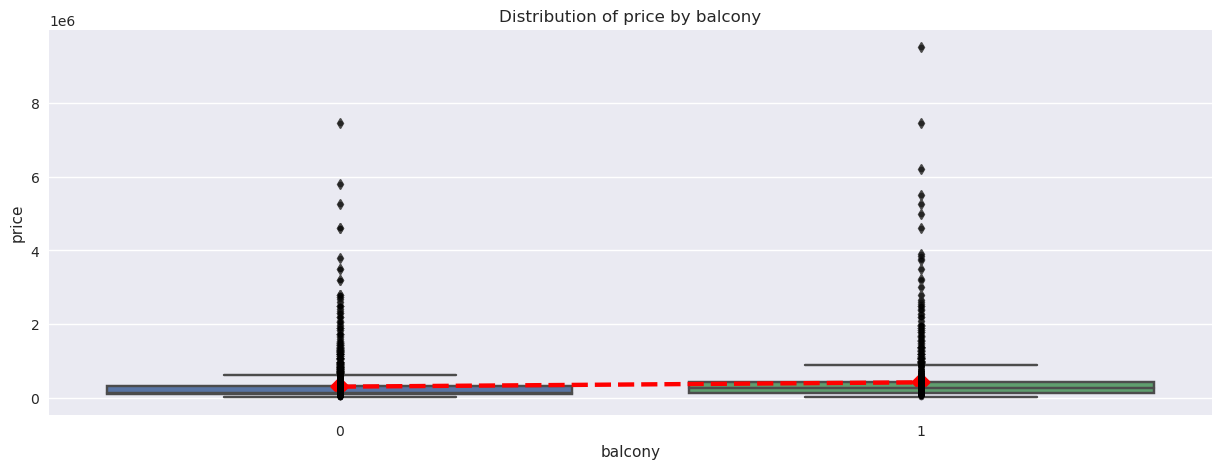

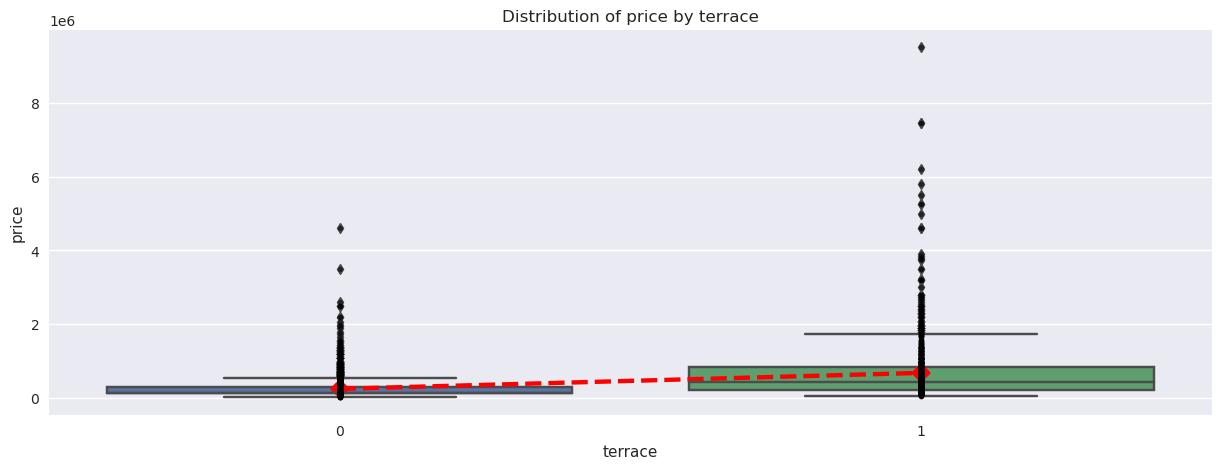

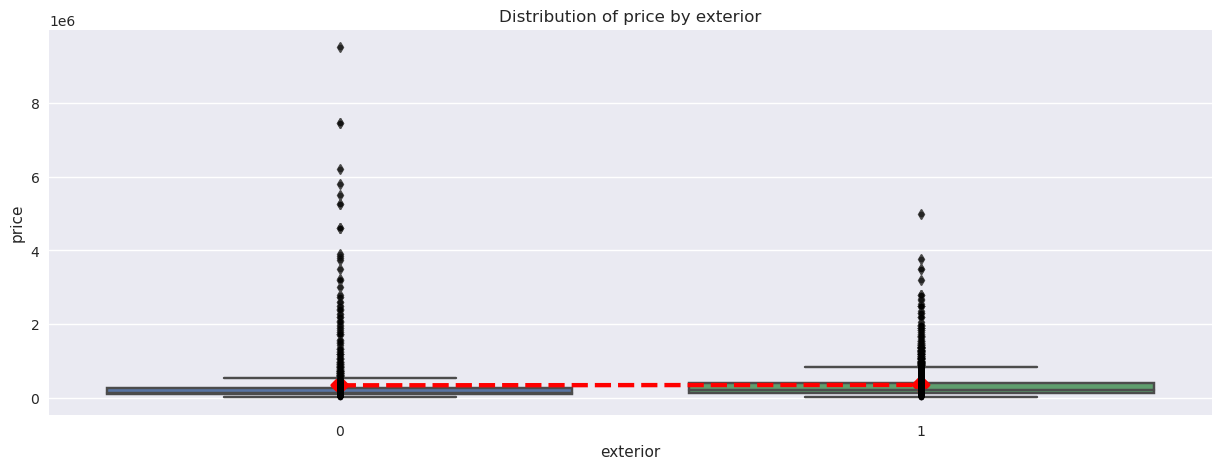

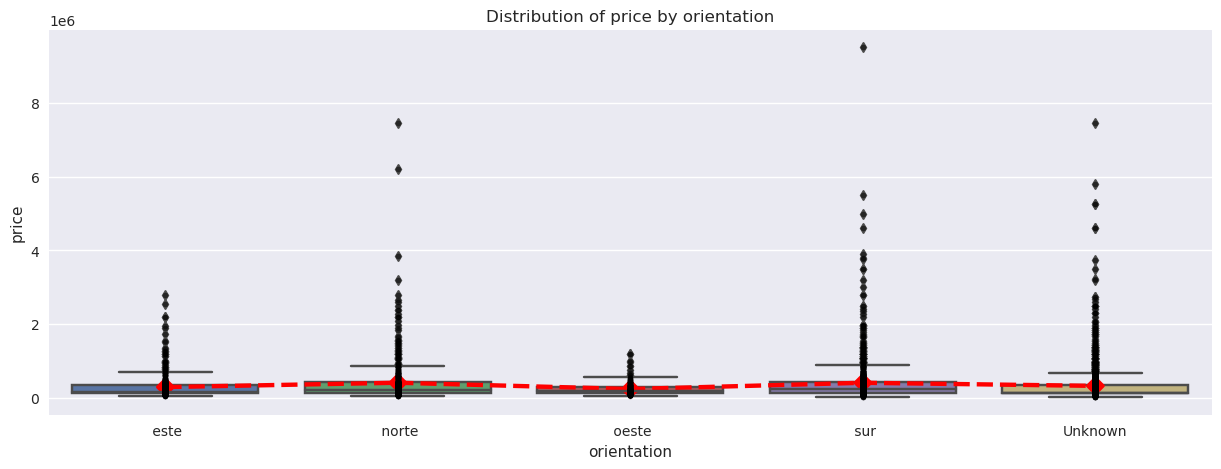

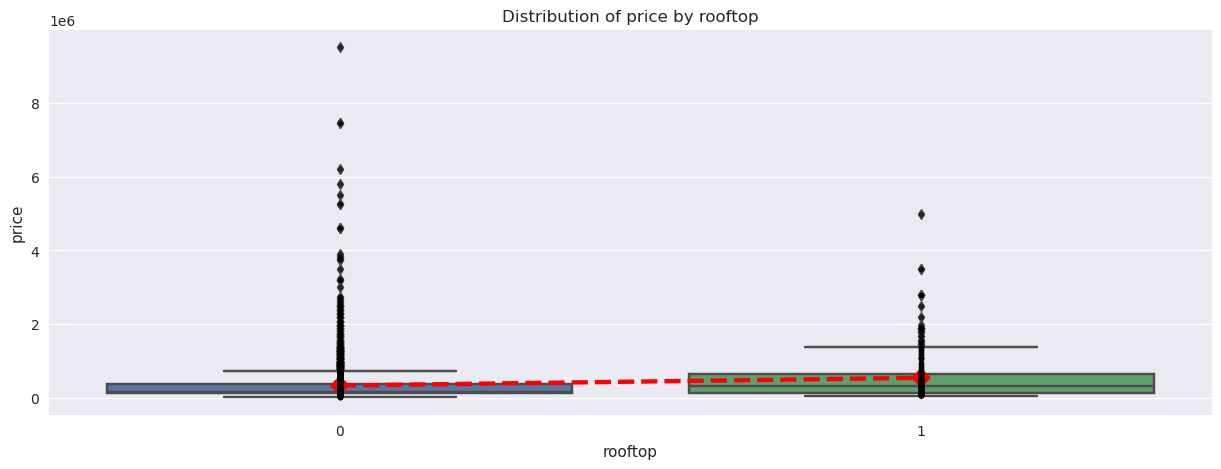

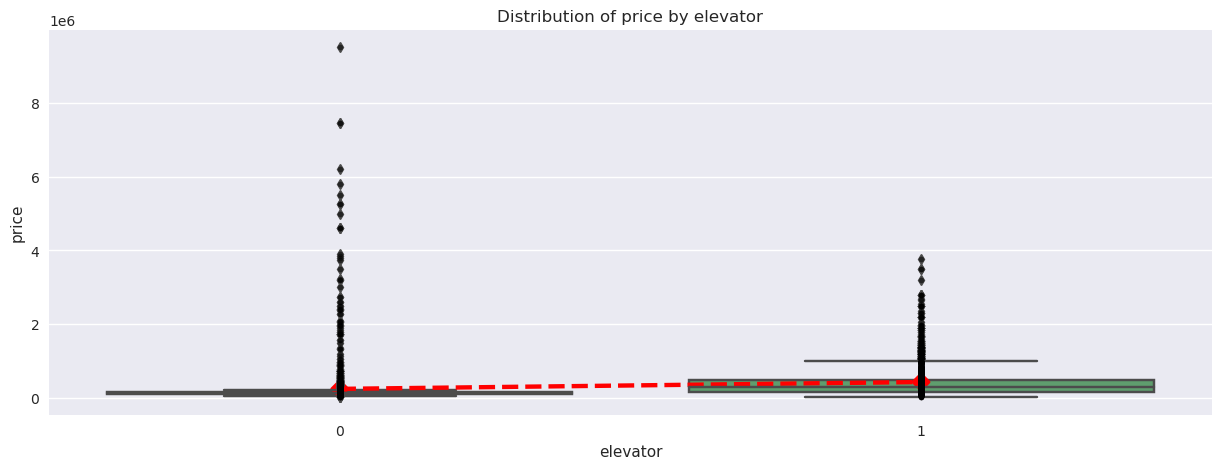

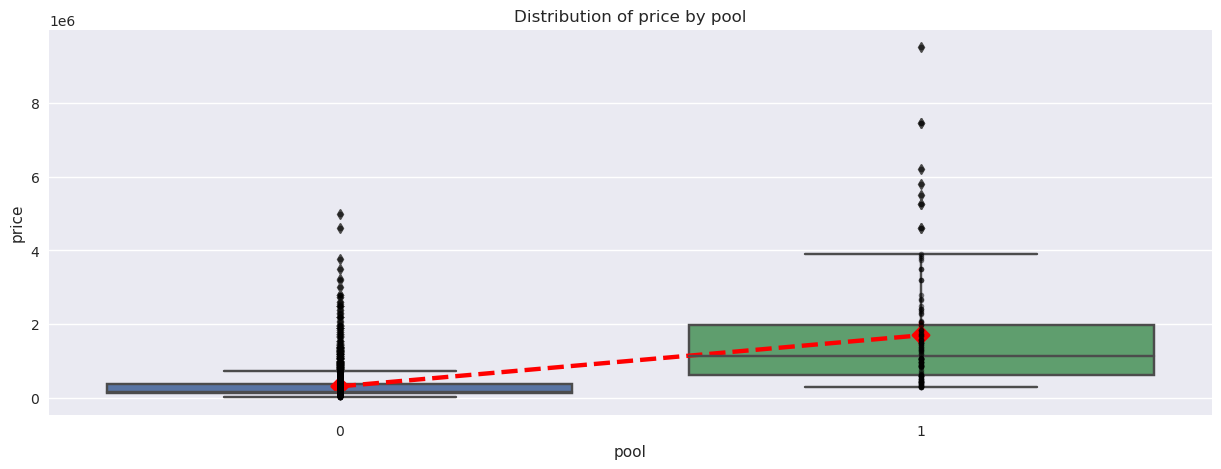

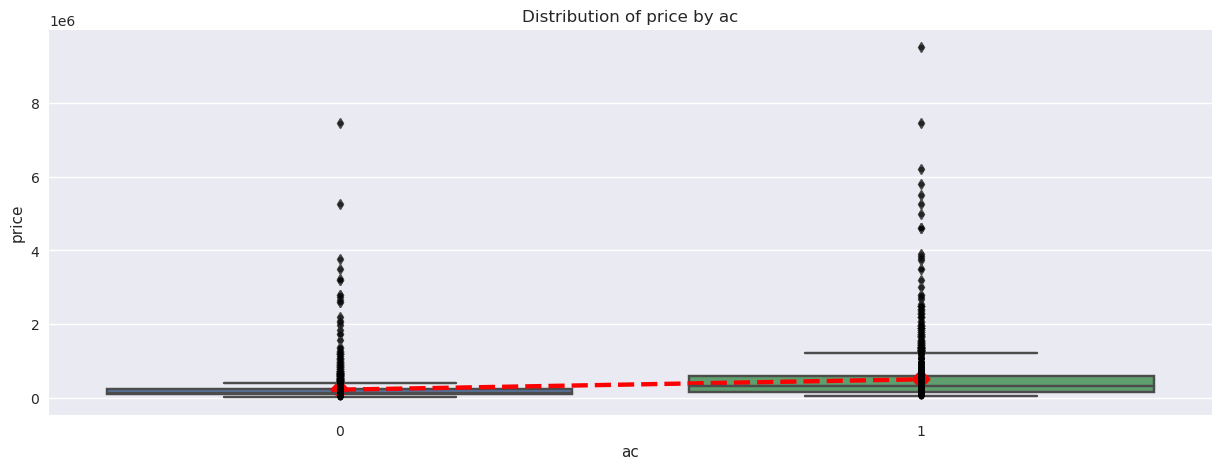

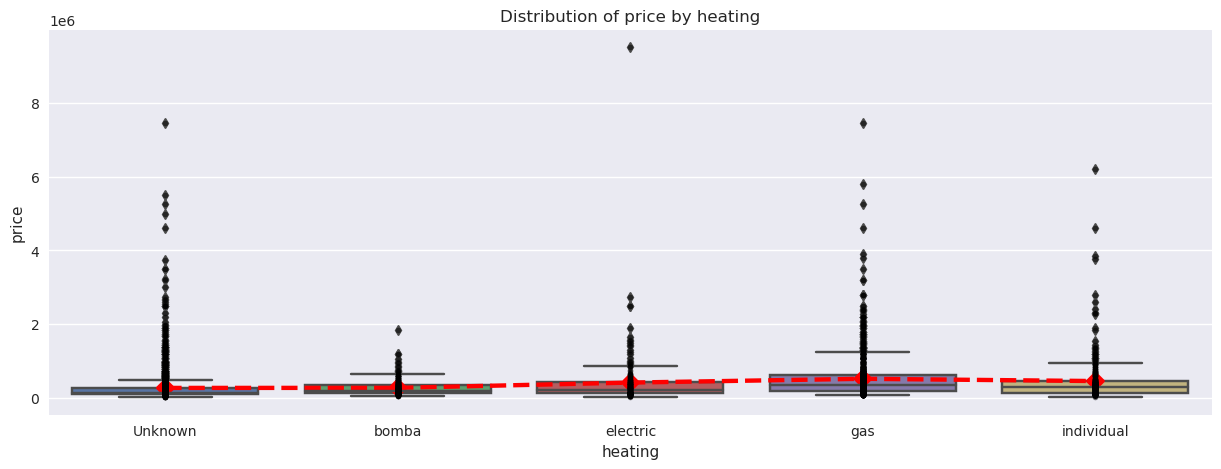

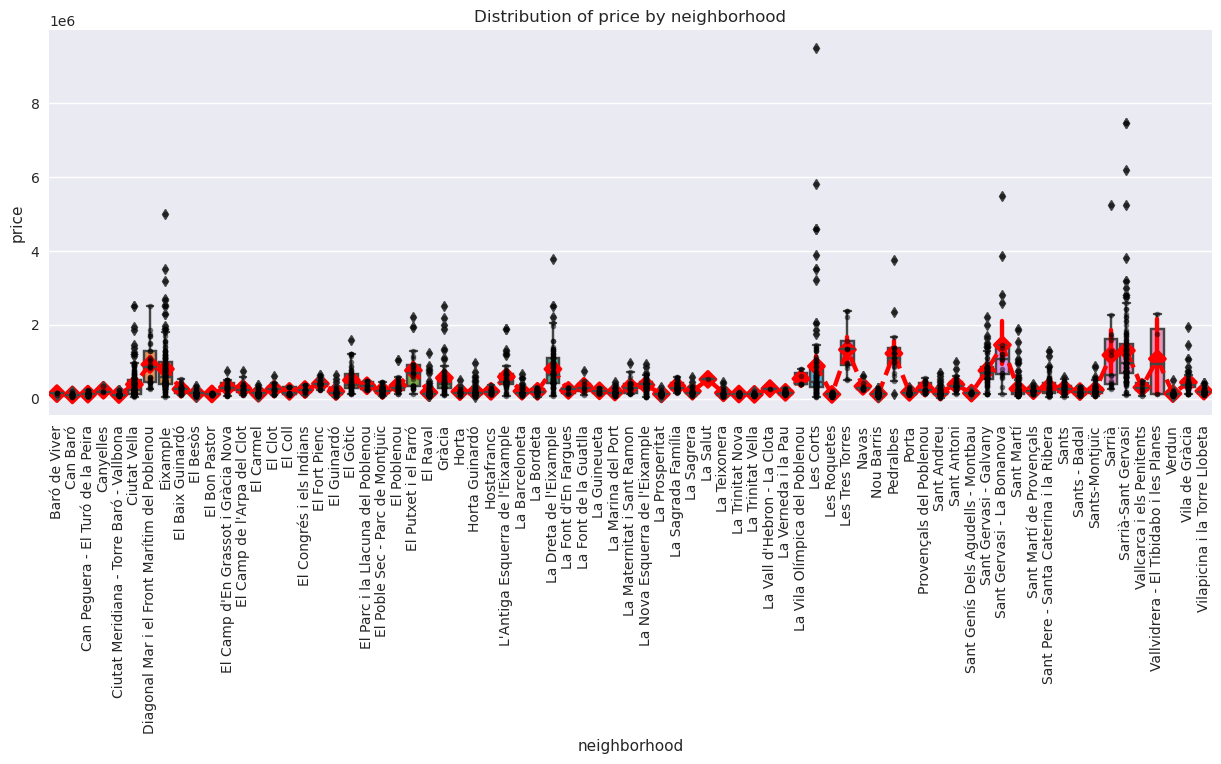

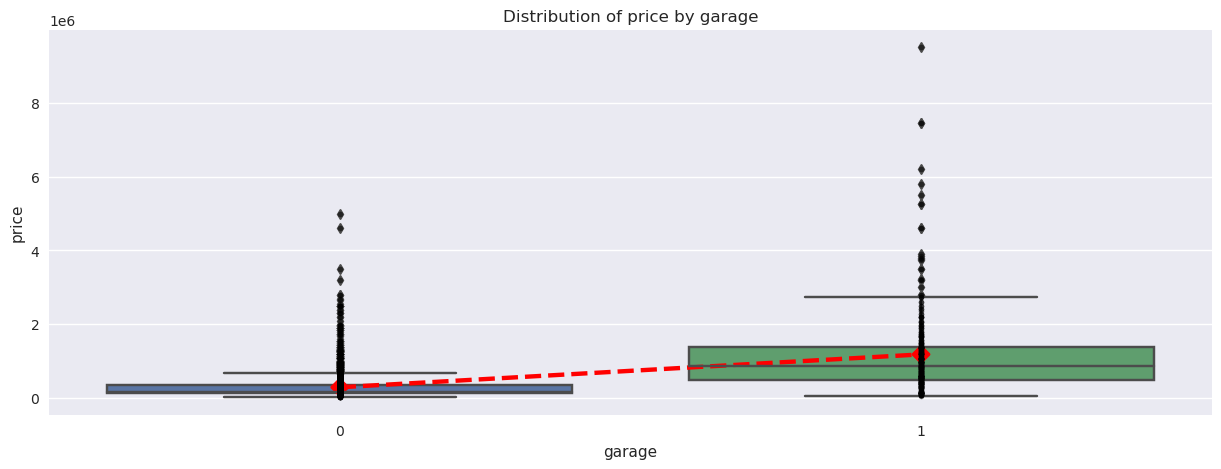

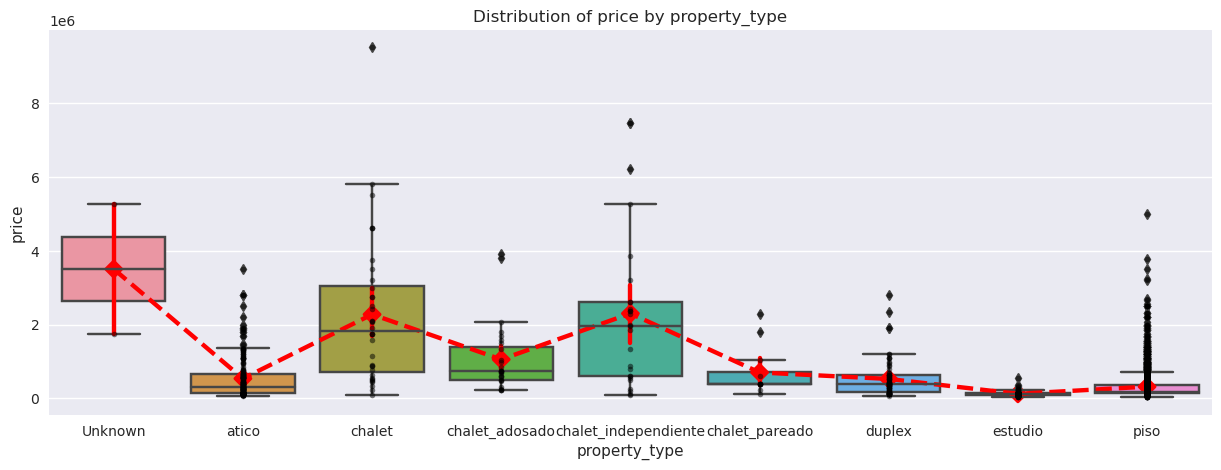

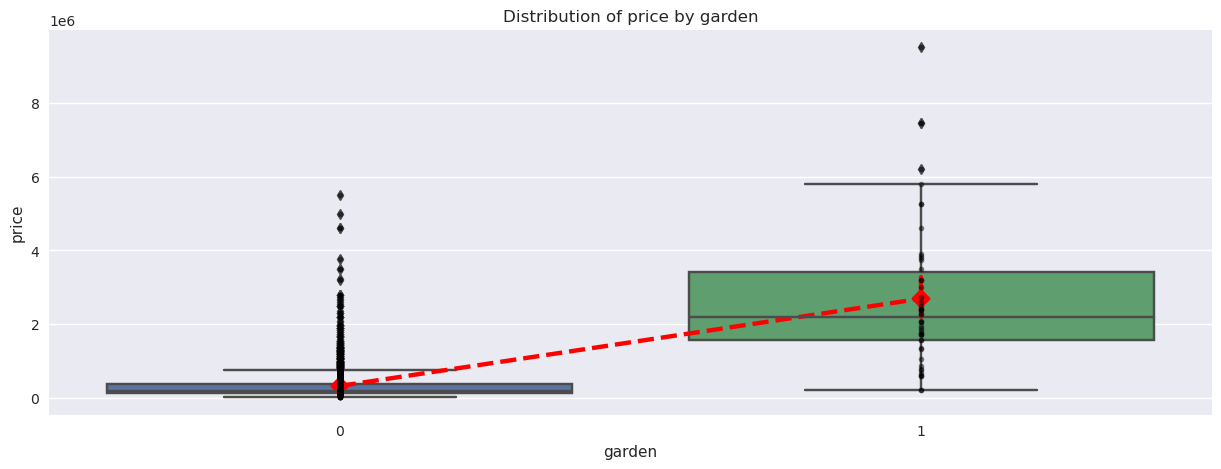

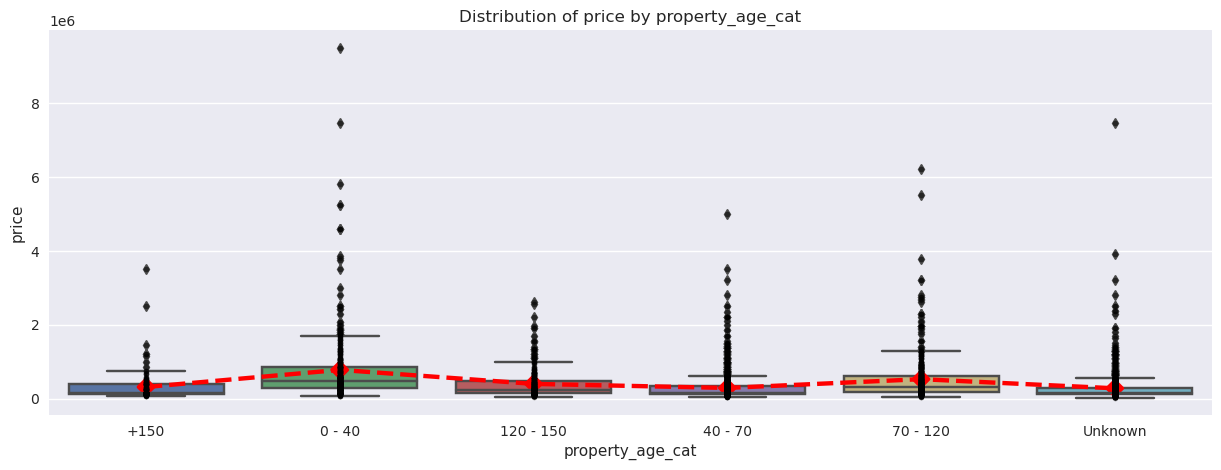

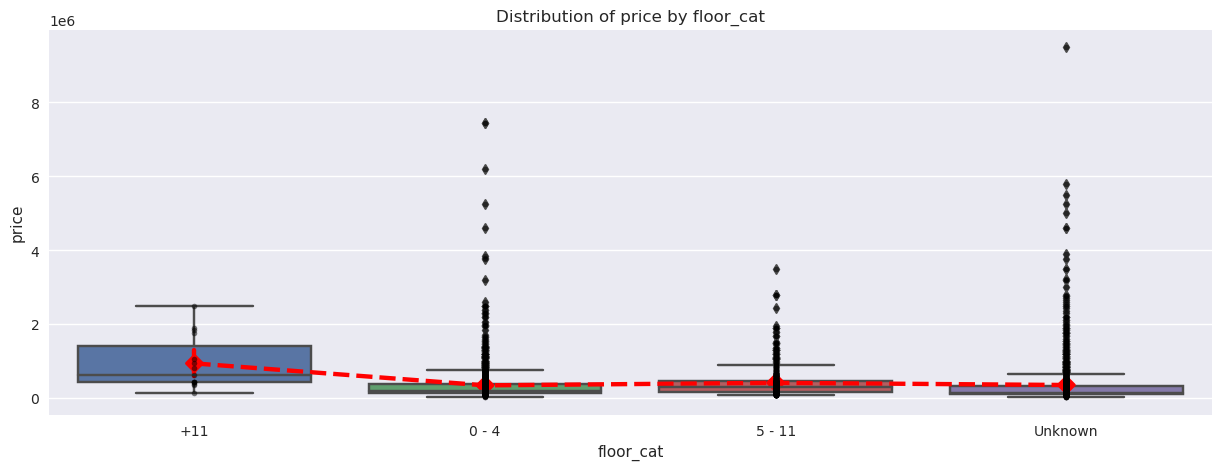

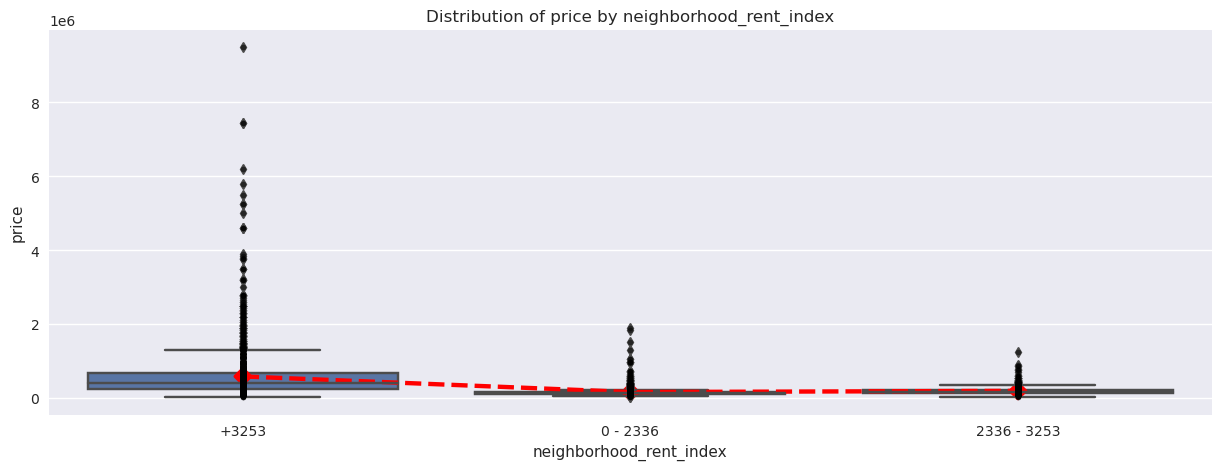

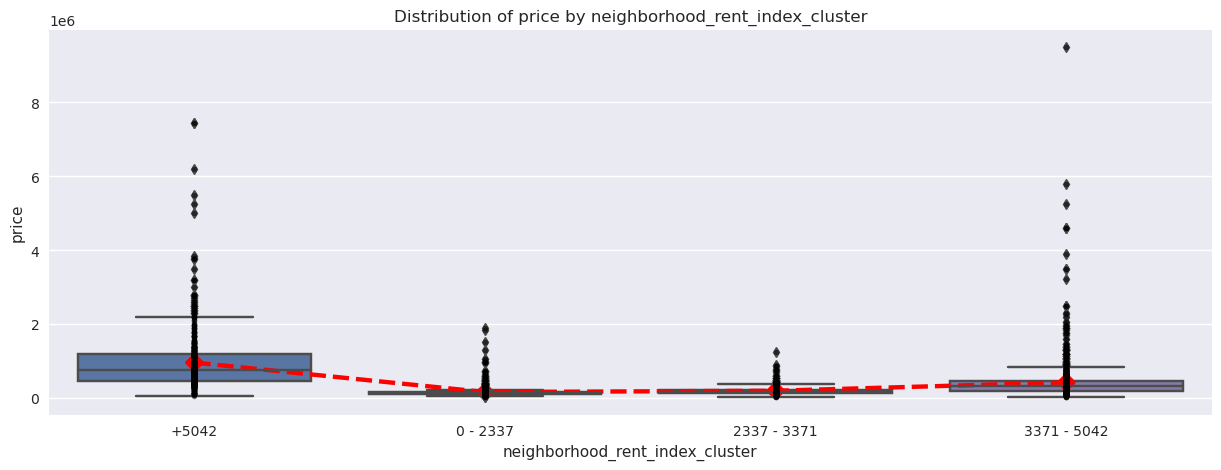

In [566]:
create_boxplots(sale_clean_df, category_vars, TARGET_VARIABLE, 15, 5)

## Eliminación de variables no útiles

Como hemos visto y justificado anteriormente, hay ciertas variables redundantes que podemos eliminar. De momento eliminaremos las siguientes: 

In [599]:
# hacemos una cópia
sales_simplified_df = sale_clean_df.copy(deep=True)

In [600]:
# variables a eliminar 
not_useful_vars = ['year_built',
                   'sq_meters',
                   'neighborhood_rent_index'
                   #'bathrooms',
                   #'rooms'
                  ]
# eliminamos not_useful_vars
sales_simplified_df.drop(not_useful_vars, axis=1, inplace=True)

In [601]:
sales_simplified_df.shape

(4677, 28)

## PCA

El análisis de componentes principales es una herramienta valiosa para seleccionar las variables más importantes y comprender mejor la estructura de los datos en modelos de machine learning.

Los resultados del análisis de componentes principales (PCA) pueden proporcionar información valiosa sobre la estructura del conjunto de datos y las variables más importantes. Los loadings son una medida de la contribución de cada variable al componente principal, y pueden ser útiles para seleccionar las variables más importantes para los modelos de machine learning.

La selección de variables puede ayudar a reducir la dimensionalidad del conjunto de datos, lo que puede mejorar la eficiencia del modelo y reducir el riesgo de sobreajuste. Al seleccionar las variables más importantes, podemos enfocar nuestros recursos en las variables más relevantes para el modelo.

Además, el PCA puede ayudarnos a entender mejor la relación entre las diferentes variables y cómo se relacionan con los componentes principales. Esto puede ser útil para identificar patrones y tendencias que podrían ser importantes para nuestros modelos de machine learning.

In [594]:
def perform_pca(df: pd.DataFrame, target_variable: str, n_components: int = 3) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    """
    Perform principal component analysis (PCA) on a DataFrame with numeric features and plot the variance explained by each 
    principal component and the loadings for each principal component. Returns the loadings for each component and the transformed data.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with numeric features.
    target_variable : str
        Name of the target variable column to be removed from the DataFrame.
    n_components : int, optional
        Number of principal components to compute. Default is 3.

    Returns:
    --------
    Tuple[pd.DataFrame, pd.DataFrame]
        Tuple containing the loadings for each component and the transformed data.
        
    Example:
    --------
    # perform PCA on the DataFrame
    loadings, transformed_data = perform_pca(df, 'target_variable', 2)
    """

    # remove the target variable from the DataFrame 
    df = df.drop(columns=target_variable)
    
    # select only the numeric features and drop na values 
    numeric_features = df.select_dtypes(include=['int64', 'float64']).dropna()    
    X = numeric_features
    
    # scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # apply PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)

    # calculate the variance explained by each component
    variance = pd.DataFrame({'variance': pca.explained_variance_ratio_*100, # *100: Percentage of explained variances
                             'PC': ['PC{}'.format(i) for i in range(1, n_components+1)]})
    variance = variance.sort_values('variance', ascending=False)

    # plot the variance explained by each component
    sns.barplot(x='PC', y='variance', data=variance, color='blue')
    plt.title('Variance explained by each principal component')
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage of explained variances') 
    plt.show()

    # get the loadings for each component
    loadings = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i) for i in range(1, n_components+1)], index=X.columns)

    # plot the loadings for each principal component
    n_rows = (n_components + 1) // 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(15, 6 * n_rows), sharey=False, gridspec_kw={'hspace': 0.4, 'wspace': 0.5})
    
    for i in range(n_components):
        row = i // 2
        col = i % 2
        loadings_pc = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
        sns.barplot(x=loadings_pc.values, y=loadings_pc.index, ax=axs[row, col], color='blue', order=loadings_pc.index)
        axs[row, col].set_title(f'Loadings for PC{i+1}')
        axs[row, col].set_xlabel('Loading Value')
        axs[row, col].set_ylabel('Variable')
        
    # adjust the subplots if n_components is odd to remove an empty subplot
    if n_components % 2 != 0:
        axs[n_rows-1, 1].remove()

    plt.show()

    # return the transformed data and the loadings
    transformed_data = pd.DataFrame(pca.transform(X_scaled), columns=['PC{}'.format(i) for i in range(1, n_components+1)])
    return loadings, transformed_data

In [602]:
# number of numeric variables 
len(sales_simplified_df.select_dtypes(include=['int64', 'float64']).columns)

12

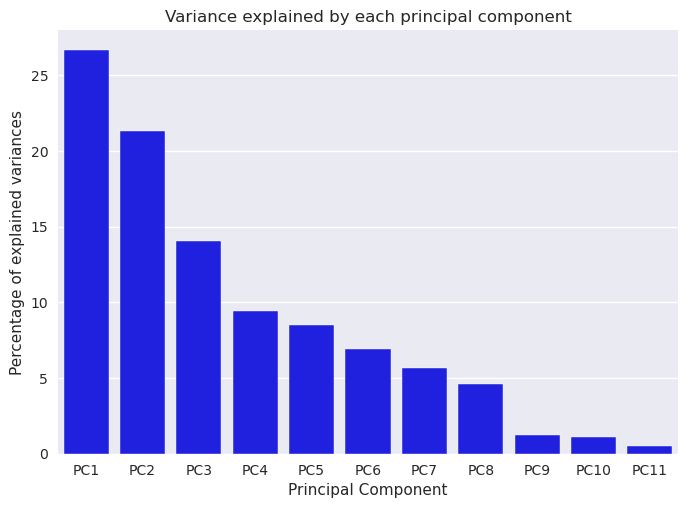

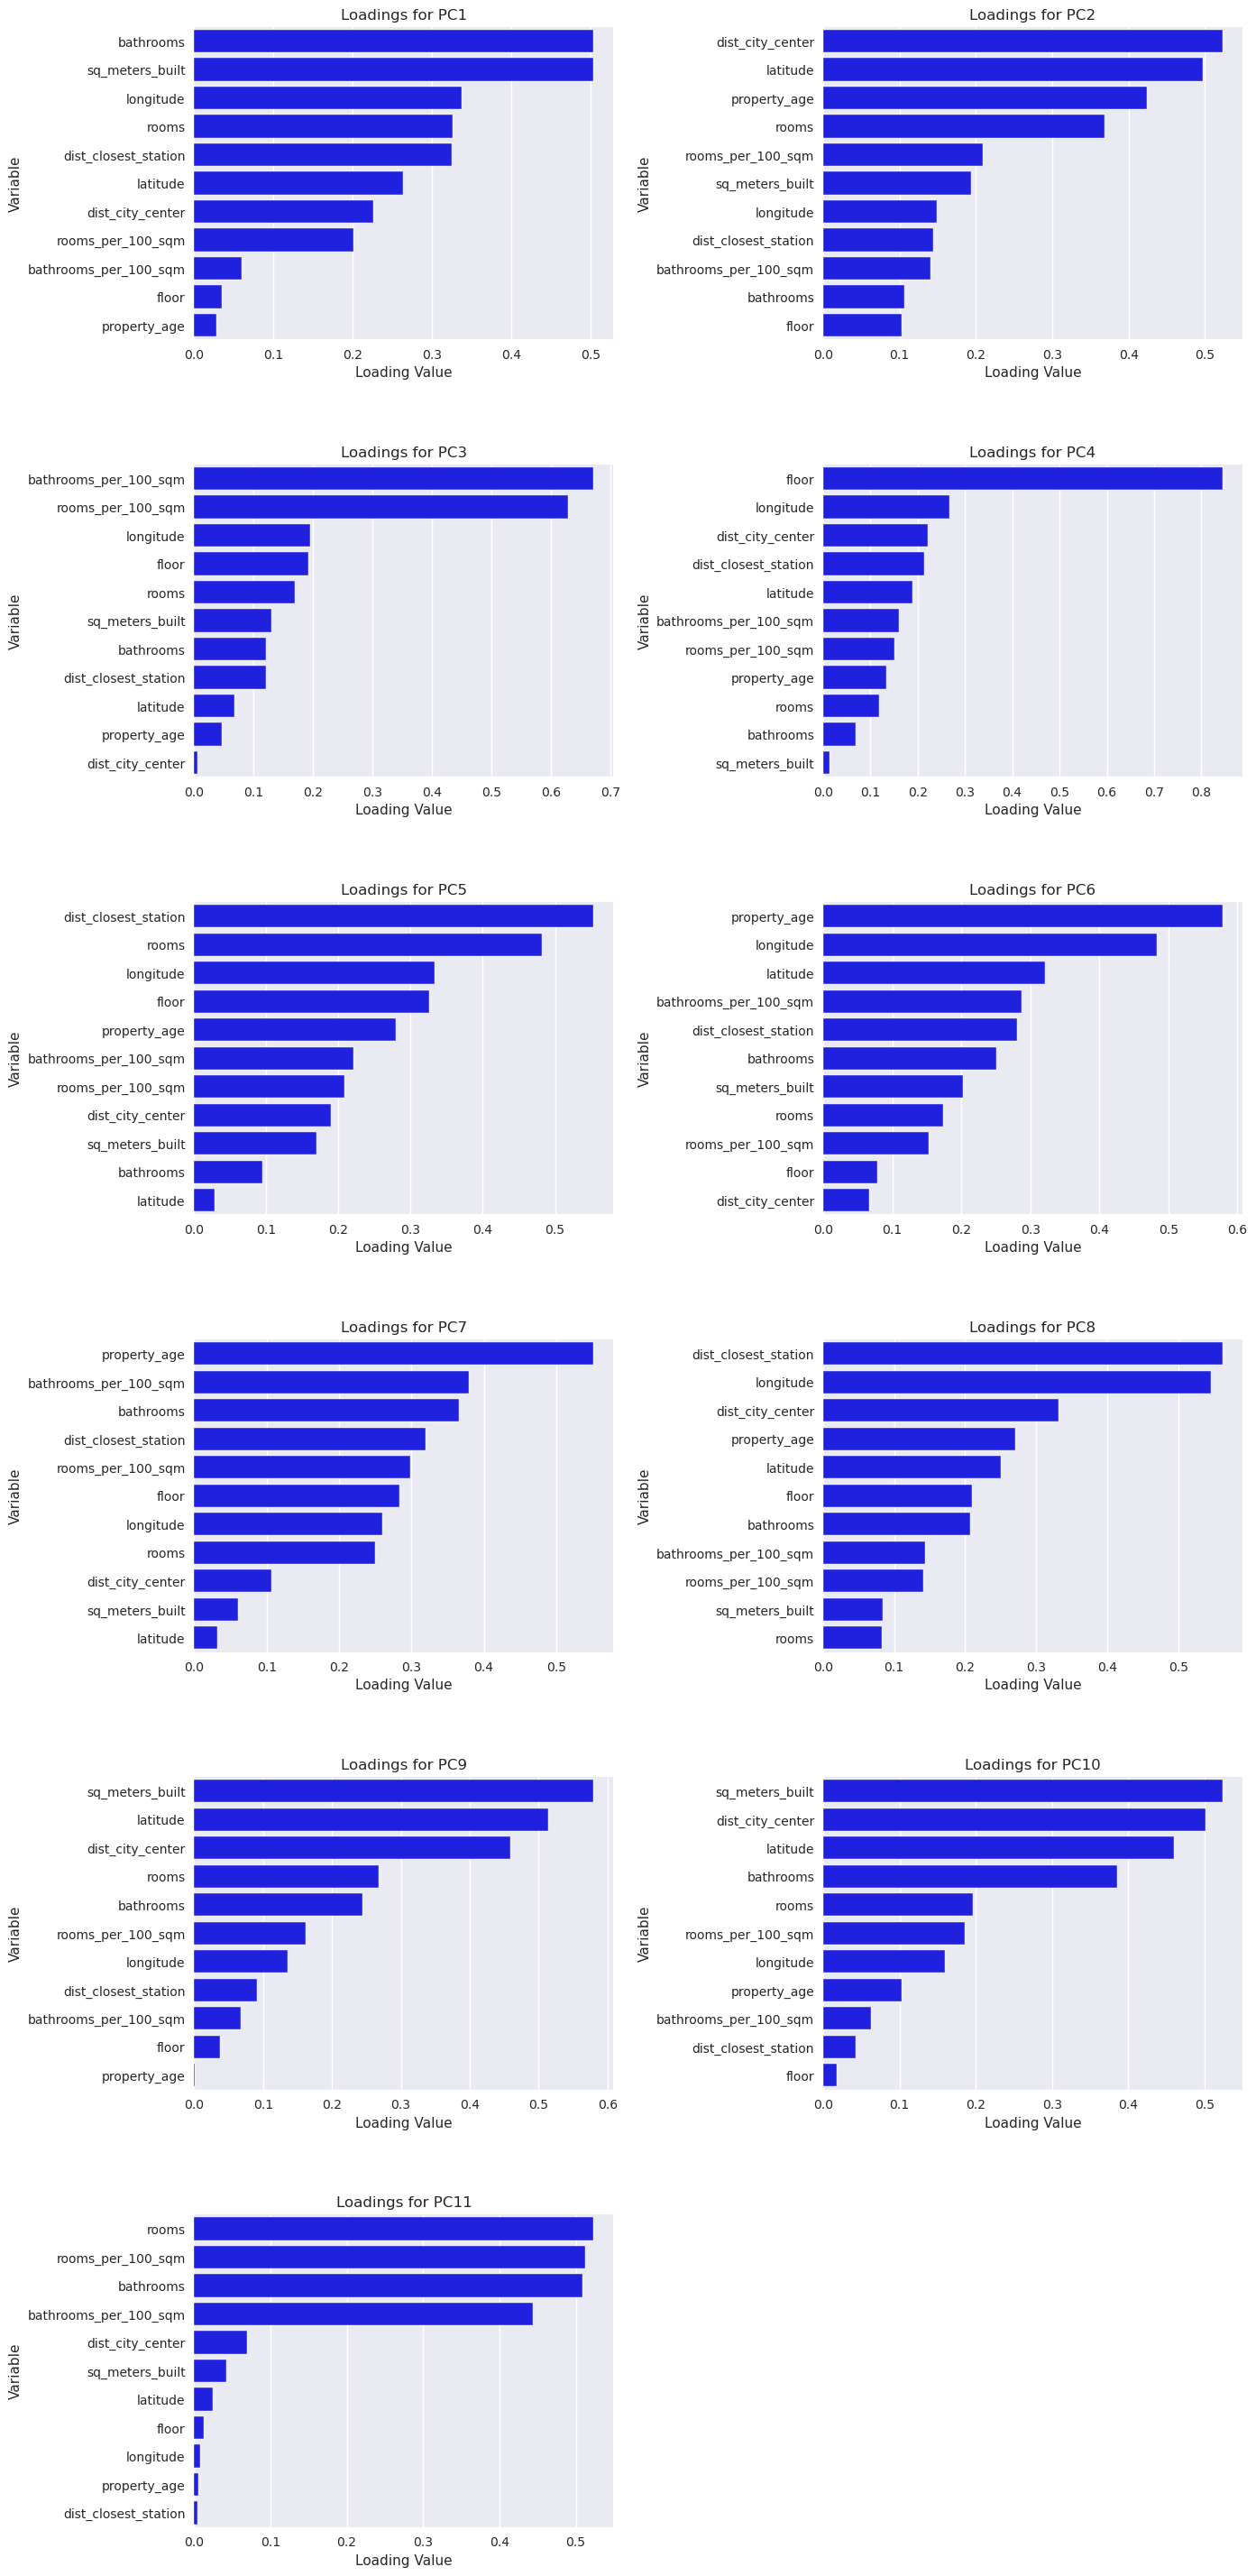

PC1       PC2       PC3       PC4       PC5  \
latitude              -0.263386  0.496831 -0.068060 -0.189450  0.027773   
longitude             -0.338037  0.149188 -0.194687  0.267120 -0.333663   
sq_meters_built        0.503549  0.193182 -0.129264 -0.012834 -0.169593   
rooms                  0.326108  0.367878  0.168459  0.119078 -0.481715   
bathrooms              0.503946  0.105814  0.120052  0.068672 -0.094739   
floor                  0.034603  0.102581 -0.192099  0.844474  0.325601   
dist_city_center      -0.225784  0.522738 -0.004824 -0.220525  0.189545   
dist_closest_station   0.325096  0.143715  0.120027 -0.214223  0.553418   
property_age          -0.028402 -0.423315  0.045618 -0.132970 -0.279532   
rooms_per_100_sqm     -0.200523  0.209278  0.628043  0.149893 -0.207833   
bathrooms_per_100_sqm -0.060086 -0.140097  0.670905  0.160895  0.220371   

                            PC6       PC7       PC8       PC9      PC10  \
latitude               0.321551 -0.031873 -0.249714 -0.513651  0.459692   
longitude              0.482836 -0.259895  0.545843  0.136152 -0.160209   
sq_meters_built        0.202887 -0.060829 -0.084453  0.579573  0.523299   
rooms                 -0.173290  0.250132  0.082803 -0.268029 -0.196431   
bathrooms              0.250843 -0.365598 -0.206546 -0.243873 -0.385750   
floor                  0.078555  0.283750 -0.209012 -0.036836  0.018232   
dist_city_center       0.066641  0.106520 -0.331182  0.458246 -0.500868   
dist_closest_station   0.280449  0.319814  0.562200 -0.090759 -0.042791   
property_age           0.578146  0.551366 -0.270568 -0.000163 -0.102969   
rooms_per_100_sqm     -0.152966  0.298464  0.140906  0.162214  0.185121   
bathrooms_per_100_sqm  0.287130 -0.379847 -0.143354  0.067153  0.062298   

                           PC11  
latitude              -0.023852  
longitude              0.007865  
sq_meters_built        0.041719  
rooms                  0.523293  
bathrooms             -0.509132  
floor                 -0.012841  
dist_city_center       0.069693  
dist_closest_station   0.004421  
property_age           0.005524  
rooms_per_100_sqm     -0.512812  
bathrooms_per_100_sqm  0.443318

In [604]:
loadings, transdformed_data = perform_pca(sales_simplified_df, TARGET_VARIABLE, n_components=11)
display(loadings)

- Obtenemos un total de 11 componentes (tantas como variables tenemos sin contar las categóricas ni la variable objetivo).

- La 1ª componente es la que más varianza nos va a explicar: ya lo resume, ya hace la combinación lineal entre nuestras variables que explique todas esas variables que le hemos metido.

- Observando las varianzas explicadas por cada componente principal (PC), vemos que entre las 3 primeras componentes ya vemos que casi todo queda explicado, las últimas son residuales.

- Miramos la medida de la cantidad de variación en los datos originales que es capturada por cada uno de los componentes principales de la componente 1, 2 y 3: 27 + 22 + 14 = 63. Es decir, la comp1, comp2 y comp3 nos explican el 63% de la variación de los datos. Con un 63%, para empezar a generar un modelo y comenzar a limpiar variables ya nos sirve.

- Loadings son los pesos: nos dice qué variables son las que realmente están aportando mayor información en esta componente. Los pesos son los coeficientes que describen la combinación lineal de las variables originales que componen cada componente principal. (Se miran tanto las positivas como las negativas, las que tengan más peso ya sea en + o en -). Los pesos de los componentes muestran las relaciones lineales entre cada variable original y los componentes. Los valores positivos indican una relación positiva entre la variable original y el componente, mientras que los valores negativos indican una relación negativa.

    - Podemos observar que varias variables tienen pesos elevados en el primer componente (Comp.1), como sq_meters_built, bathrooms y longitude (peso negativo). Esto sugiere que estas variables impulsan el primer componente, que podría captar algún aspecto importante de la variación de los datos.

    - El segundo componente (Comp.2) tiene pesos positivos para la variable dist_city_center y latitude, y pesos elevados negativos para property_age. Esto sugiere que este componente podría estar captando alguna relación entre estas variables en los datos.

    - El tercer componente (Comp.3) tiene pesos positivos elevados para bathrooms_per_100_sqm y rooms_per_100_sqm. Esto sugiere que este componente podría estar capturando alguna relación entre estas variables en los datos.

Del análisis de componentes principales (PCA), se puede observar que las variables sq_meters_built, bathrooms, longitude, dist_city_center, latitude, bathrooms_per_100_sqm y rooms_per_100_sqm tienen los mayores pesos en los primeros 3 componentes principales, lo que indica que estas variables contribuyen significativamente a la variación total de los datos. Sin embargo, se requiere un análisis adicional para determinar si estas variables tienen una relación significativa con el precio de la vivienda y cómo se relacionan con él.







## Mutual Information

La información mutua es una medida de la dependencia entre dos variables, y puede utilizarse para identificar qué predictores tienen la relación más estrecha con la variable objetivo.

Los valores más altos de MI indican una mayor dependencia entre dos variables, es decir, una puntuación más alta significa que el atributo es más informativo para predecir la variable objetivo. 

In [669]:
def mutual_info_regression_analysis(df: pd.DataFrame, 
                                     target_col: str, 
                                     figsize: tuple = (10, 15), 
                                     encoder: str = None, 
                                     ohe_cols: List[str] = None, 
                                     le_cols: List[str] = None) -> pd.DataFrame:
    """
    Performs mutual information analysis between the predictors and target variable in the given dataframe and
    returns a sorted dataframe containing feature names and their mutual information scores.
    
    Parameters:
        df: A pandas dataframe containing the predictors and target variable.
        target_col: A string indicating the name of the target variable column.
        figsize: A tuple indicating the size of the output plot (default is (10, 5)).
        encoder: An optional string indicating which encoder to use, either "ohe" for One-Hot Encoding or "le" for Label Encoding.
        ohe_cols: An optional list of column names to be one-hot encoded.
        le_cols: An optional list of column names to be label encoded.

    Returns: 
        A pandas dataframe containing feature names and their mutual information scores.
    """
    # drop rows with na
    df = df.dropna(axis=1)

    # Separate the predictors and target variable
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Apply one-hot encoding if specified
    if ohe_cols:
        categorical_cols = list(set(ohe_cols) & set(X.columns))
        if categorical_cols:
            ohe = OneHotEncoder()
            ohe.fit(X[categorical_cols])
            encoded_cols = ohe.get_feature_names_out(categorical_cols)
            X_encoded = pd.concat([X.drop(categorical_cols, axis=1), 
                                   pd.DataFrame(ohe.transform(X[categorical_cols]).toarray(), 
                                                columns=encoded_cols)], axis=1)
            X = X_encoded
   # Apply encoding if specified
    elif encoder == "ohe":
    # One-hot encode categorical variables
        categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
        if categorical_cols:
            ohe = OneHotEncoder()
            ohe.fit(X[categorical_cols])
            encoded_cols = ohe.get_feature_names_out(categorical_cols)
            X_encoded = pd.concat([X.drop(categorical_cols, axis=1), 
                                   pd.DataFrame(ohe.transform(X[categorical_cols]).toarray(), 
                                                columns=encoded_cols)], axis=1)
            X = X_encoded
    
    # Apply label encoding if specified
    if le_cols:
        categorical_cols = list(set(le_cols) & set(X.columns))
        if categorical_cols:
            le = LabelEncoder()
            X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
    elif encoder == "le":
        # Label encode categorical variables
        categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
        if categorical_cols:
            le = LabelEncoder()
            X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

    # Delete categorical vars not specified to encode
    cat_vars = X.select_dtypes(include=['category', 'object']).columns.tolist()
    if cat_vars: # if not empty
        # Remove columns with categorical variables
        categorical_cols_in_data = set(cat_vars).intersection(set(X.columns))
        X = X.drop(categorical_cols_in_data, axis=1)

    
    # Determine which predictors are discrete: all discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X.dtypes == int

    # Calculate mutual information
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # Plot mutual information scores
    fig, ax = plt.subplots(figsize=figsize)
    mi_scores.sort_values().plot.barh(ax=ax)
    ax.set(title="Mutual Information Scores", xlabel="MI Score", ylabel="Features")
    plt.show()

    return mi_scores


Debemos codificar las variables categóricas para realizar el análisis de información mutua. 
Para ello utilizaremos one-hot encoding para las variables que no siguen un orden o jerarquía, y ordinal encoder para las que hay un order o jerarquía, como floor_cat, property_age_cat y neighborhood_rent_index_cluster. Esto garantiza que los valores codificados reflejen el orden inherente de las categorías y puedan utilizarse para el análisis.

Codificaremos la categoría "Unknown" como una etiqueta separada: sustituirla por -1 antes de utilizar OrdinalEncoder. Esta es una práctica común cuando se trata de datos desconocidos o faltantes.

In [680]:
sales_simplified_df.floor_cat.value_counts()

0 - 4      2359
Unknown    1680
5 - 11      623
+11          15
Name: floor_cat, dtype: int64

In [681]:
sales_simplified_df.property_age_cat.value_counts()

40 - 70      1933
Unknown      1415
70 - 120      500
0 - 40        389
120 - 150     300
+150          140
Name: property_age_cat, dtype: int64

In [682]:
sales_simplified_df.neighborhood_rent_index_cluster.value_counts()

0 - 2337       1571
3371 - 5042    1403
2337 - 3371    1060
+5042           643
Name: neighborhood_rent_index_cluster, dtype: int64

In [724]:
# variables que queremos codificar usando ordinal encoder
oe_cols = oe_cols = ['floor_cat', # unknown
                     'property_age_cat', # unknown
                     'neighborhood_rent_index_cluster' 
                    ]
# creamos nuevo dataset para no modificar el original
oe_data = sales_simplified_df.copy(deep=True)

# Replace 'Unknown' values with -1
#oe_data[oe_cols] = oe_data[oe_cols].replace('Unknown', -1)

# Define the order of the categories for each column
floor_cat_order = ['Unknown', '0 - 4', '5 - 11', '+11']
property_age_cat_order = ['Unknown', '0 - 40', '40 - 70', '70 - 120', '120 - 150', '+150']
neighborhood_rent_index_cluster_order = ['Unknown', '0 - 2337', '2337 - 3371', '3371 - 5042', '+5042']

# Create an instance of the ordinal encoder
encoder = OrdinalEncoder(categories=[floor_cat_order, property_age_cat_order, neighborhood_rent_index_cluster_order])
# Fit and transform the selected columns
# oe_data[new_col] = encoder.fit_transform(oe_data[[col]])

for col in oe_cols:
    # Create a new column name for the encoded data
    new_col = col + '_encoded'
    # Create an instance of the ordinal encoder
    encoder = OrdinalEncoder(categories=[eval(col+'_order')])
    # Fit and transform the selected columns
    oe_data[new_col] = encoder.fit_transform(oe_data[[col]])
    # replace 0 by -1 ('Unknown' by -1)
    oe_data[new_col] = oe_data[new_col].replace(0, -1)

# Print the encoded data
display(oe_data[['floor_cat','floor_cat_encoded','property_age_cat','property_age_cat_encoded','neighborhood_rent_index_cluster','neighborhood_rent_index_cluster_encoded']].head())

floor_cat  floor_cat_encoded property_age_cat  property_age_cat_encoded  \
0     0 - 4                1.0           0 - 40                       1.0   
1   Unknown               -1.0          40 - 70                       2.0   
2     0 - 4                1.0          Unknown                      -1.0   
3   Unknown               -1.0          40 - 70                       2.0   
4    5 - 11                2.0         70 - 120                       3.0   

  neighborhood_rent_index_cluster  neighborhood_rent_index_cluster_encoded  
0                     3371 - 5042                                      3.0  
1                        0 - 2337                                      1.0  
2                        0 - 2337                                      1.0  
3                     3371 - 5042                                      3.0  
4                     3371 - 5042                                      3.0

- Ya tenemos las variables codificadas usando ordinal encoding. 

In [726]:
# variables que queremos codificar usando OHE
ohe_cols = get_binary_cols(sales_simplified_df) + ['orientation', 'heating', 'property_type']

    # ['balcony',
    #  'terrace',
    #  'exterior',
    #  'rooftop',
    #  'elevator',
    #  'pool',
    #  'ac',
    #  'garage',
    #  'garden']

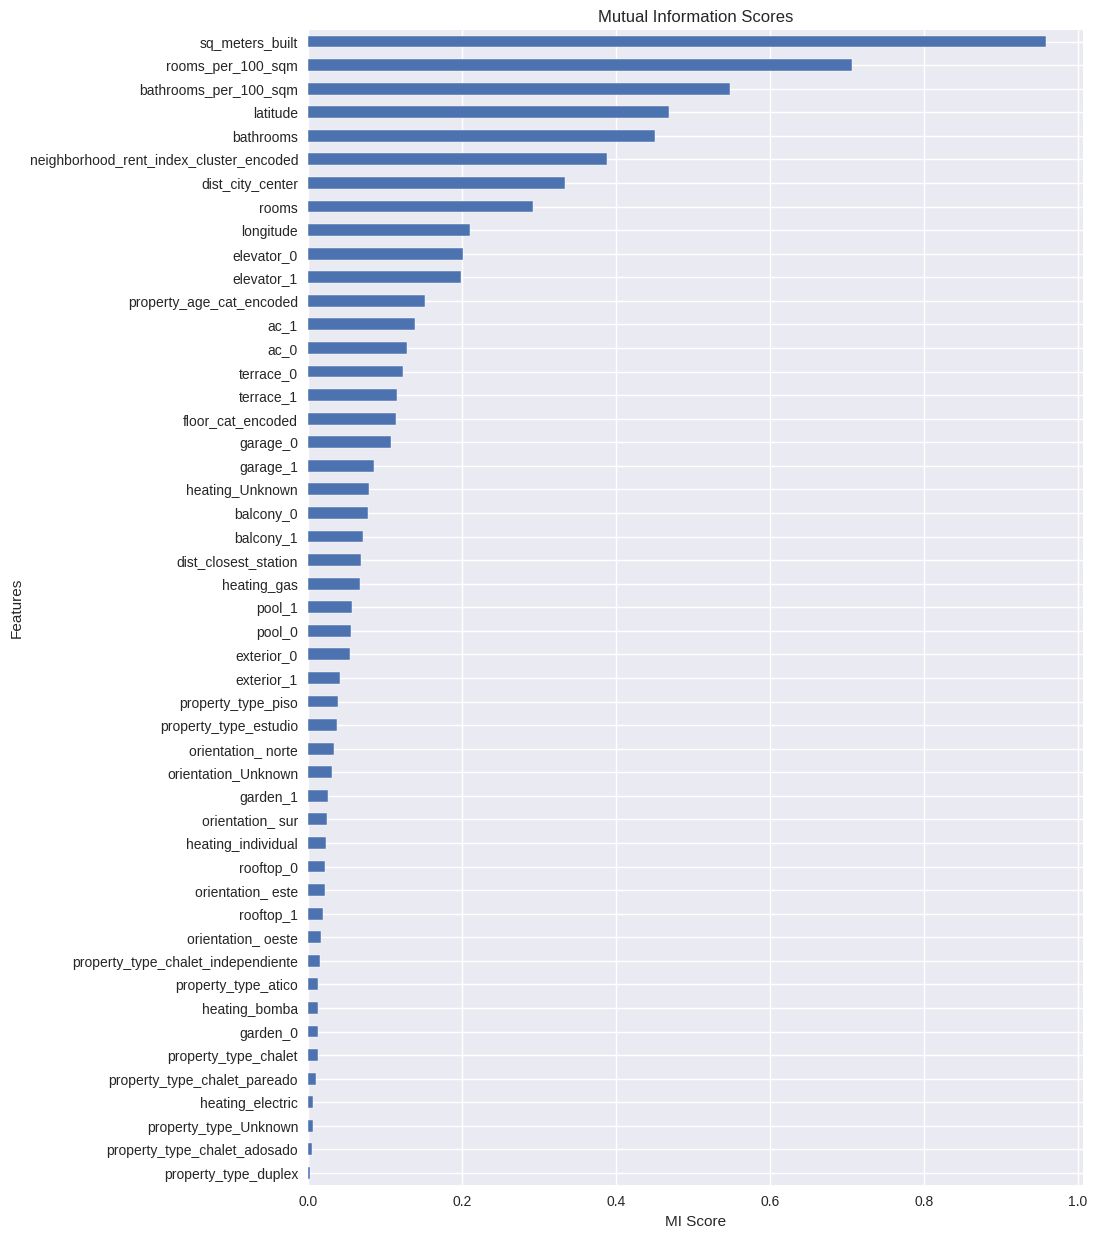

sq_meters_built                            0.958573
rooms_per_100_sqm                          0.706657
bathrooms_per_100_sqm                      0.548625
latitude                                   0.469322
bathrooms                                  0.450534
neighborhood_rent_index_cluster_encoded    0.388423
dist_city_center                           0.334636
rooms                                      0.292980
longitude                                  0.210805
elevator_0                                 0.200999
elevator_1                                 0.198359
property_age_cat_encoded                   0.152843
ac_1                                       0.139398
ac_0                                       0.129257
terrace_0                                  0.123178
terrace_1                                  0.115727
floor_cat_encoded                          0.115223
garage_0                                   0.108342
garage_1                                   0.086058
heating_Unkn

In [725]:
# calculamos la información mutua
mutual_info_regression_analysis(oe_data, TARGET_VARIABLE, ohe_cols=ohe_cols) # encoder = 'ohe' / 'le'

Recordemos que una puntuación más alta significa que la característica es más informativa para predecir la variable objetivo. 

Resultados:
- parece que "sq_meters_built" tiene la puntuación de información mutua más alta, lo que significa que puede ser el atributo más informativo para predecir el precio de la vivienda. Del mismo modo, "rooms_per_100_sqm" y "bathrooms_per_100_sqm" también tienen puntuaciones de información mutua relativamente altas, lo que indica que también son atributos informativos.

- Otros atributos que tienen puntuaciones de información mutua relativamente altas son " latitude", "bathrooms" y "neighborhood_rent_index_cluster_encoded", mientras que atributos como "property_type_duplex", "property_type_chalet_adosado" y "heating_electric" tienen puntuaciones muy bajas, lo que indica que son menos informativos a la hora predecir el precio de la vivienda.

No obstante, debemos tener en cuenta que la información mutua es sólo una métrica para evaluar la relevancia de los atributos, y no es necesariamente la única ni la mejor métrica para ello. Por eso, probaremos otros métodos de selección de características y compararemos los resultados. 

## ANOVA

- ANOVA (Analysis of Variance) es una técnica estadística que se utiliza para dos o más grupos para comprobar si existe una diferencia entre sus valores medios.

- La prueba ANOVA nos dice cómo cuantificar la pertenencia a una de las categorías: mide la variación entre grupos comparada con la variación dentro de los grupos. 

- La hipótesis nula es que las medias de todos los grupos son iguales. 

- La prueba ANOVA calcula el estadístico F y el p-value. 
    - Si el p-value es inferior a un nivel de significación (normalmente 0.05), se rechaza la hipótesis nula, lo que indica que existe una diferencia significativa entre las medias de al menos dos grupos.



In [744]:
def perform_anova_kruskall(df: pd.DataFrame, target_col: str, normal_data: bool = True) -> pd.DataFrame:
    """
    Performs ANOVA or Kruskal-Wallis analysis for each categorical variable in the dataframe.
    
    Parameters:
        df: A pandas dataframe containing the predictors and target variable.
        target_col: A string indicating the name of the target variable column.
        normal_data: A boolean indicating whether the data is normally distributed (default True).
    
    Returns: 
        A pandas dataframe containing ANOVA or Kruskal-Wallis results for each categorical variable.
    """
    
    # Select categorical columns
    cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    
    # Perform ANOVA or Kruskal-Wallis for each categorical variable
    result_list = []
    for col in cat_cols:
        if normal_data:
            model = ols(f"{target_col} ~ {col}", data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            result_list.append(anova_table)
        else:
            groups = [group[target_col].values for name, group in df.groupby(col)]
            groups = [g for g in groups if len(g)>0] # remove empty groups
            if len(groups)>1:
                stat, p = stats.kruskal(*groups)
                table = pd.DataFrame({'Group': [col], 'Statistic': [stat], 'p-value': [p]})
                result_list.append(table)
    
    # Combine the results into a single dataframe
    result_df = pd.concat(result_list, axis=0)
    
    # Filter out the residual rows
    result_df = result_df[result_df.index != "Residual"]
    
    return result_df


In [745]:
perform_anova_kruskall(sales_simplified_df, TARGET_VARIABLE, normal_data=True)

sum_sq    df            F  \
balcony                          1.492191e+13   1.0    61.289159   
terrace                          1.586301e+14   1.0   745.695503   
exterior                         1.218611e+11   1.0     0.494098   
orientation                      1.208281e+13   4.0    12.368195   
rooftop                          1.322870e+13   1.0    54.253887   
elevator                         3.951209e+13   1.0   165.872606   
pool                             2.309010e+14   1.0  1170.490286   
ac                               9.147716e+13   1.0   402.819978   
heating                          5.498184e+13   4.0    58.479069   
neighborhood                     4.209760e+14  74.0    35.757621   
garage                           2.376710e+14   1.0  1213.718826   
property_type                    2.904986e+14   8.0   196.498278   
garden                           2.758690e+14   1.0  1470.126584   
property_age_cat                 1.013818e+14   5.0    90.050776   
floor_cat                        7.406342e+12   3.0    10.069263   
neighborhood_rent_index_cluster  3.254277e+14   3.0   612.426281   

                                        PR(>F)  
balcony                           6.052713e-15  
terrace                          1.811869e-152  
exterior                          4.821397e-01  
orientation                       5.245114e-10  
rooftop                           2.071564e-13  
elevator                          2.526426e-37  
pool                             3.858810e-229  
ac                                5.129500e-86  
heating                           3.069629e-48  
neighborhood                      0.000000e+00  
garage                           1.260328e-236  
property_type                    2.116041e-287  
garden                           6.324437e-280  
property_age_cat                  1.015491e-90  
floor_cat                         1.306050e-06  
neighborhood_rent_index_cluster   0.000000e+00

Explicación de las columnas del resultado de ANOVA:
- La columna "sum_sq" representa la suma de cuadrados, que es una medida de la variación entre grupos. 

- La columna "df" representa los grados de libertad, que es el número de categorías menos uno. 

- La columna "F" representa el estadístico F, que es la relación entre el cuadrado medio entre grupos y el cuadrado medio dentro de los grupos. 

- La columna "PR(>F)" representa el p-value, que indica la probabilidad de obtener un estadístico F tan extremo como el observado, suponiendo que la hipótesis nula sea cierta.

Resultados: 
- La variable "exterior" tiene un p-value de 0.48, que es superior al nivel de significación típico de 0.05. Esto significa que no hay una diferencia significativa en el precio de venta entre los inmuebles con o sin una orientación exterior o interior en el edificio. Por tanto, no existe una diferencia significativa en el precio de venta entre los inmuebles con o sin una orientación exterior o interior en el edificio. 

- Las demás variables tienen un efecto significativo sobre la variable dependiente "price", ya que los p-values son todos menores que el nivel de significación típico de 0.05. Esto significa que cada una de las variables categóricas (excepto "exterior") está significativamente relacionada con el precio de venta de un inmueble.

- En particular, podemos ver que las variables neighborhood_rent_index_cluster, property_type, garage, pool, terrace y garden tienen los valores F más altos y los p-values más bajos, lo que indica que tienen un fuerte efecto sobre el precio de venta de un inmueble.

Variables con mayor efecto sobre el precio de venta de la vivienda:
- neighborhood_rent_index_cluster
- garden
- property_type
- pool 
- garage 
- terrace




No obstante, debemos comprobar las condiciones para poder aplicar el test ANOVA.

Las suposiciones de ANOVA son:

- La distribución de los datos es normal
- La varianza es constante entre los grupos
- Las observaciones son independientes entre sí

**Normality Tests**:
- Jarque–Bera test
    - funciona bien en muestras grandes (normalmente superiores a 2000 observaciones).
- Quantile-Quantile Plot


In [738]:
# Data preparation 
price = sales_simplified_df[target].values
print(len(price))

4677


In [739]:
# Jarque–Bera test for Normality
    # Perform Jarque-Bera test
print(stats.jarque_bera(price))
statistic, pvalue = jarque_bera(price)
check_normality(pvalue)


Jarque_beraResult(statistic=900023.8239598732, pvalue=0.0)
Since p-value ≤ 0.05, we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.


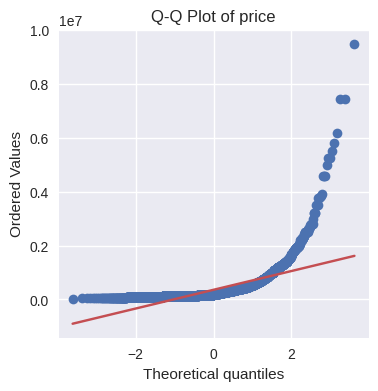

In [743]:
# figure with two subplots
fig, (ax) = plt.subplots(ncols=1, figsize=(4, 4))

# first Q-Q plot on the left subplot
stats.probplot(price, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of price')

plt.show()

Realmente, no se cumple el supuesto de normalidad en la variable objetivo 'price' así que tendríamos que usar una prueba no paramétrica como Kruskal-Wallis (prueba no paramétrica que no requiere el supuesto de normalidad).

Aplicamos la prueba de Kruskal-Wallis a las distintas variables categóricas del conjunto de datos para determinar si tienen una relación estadísticamente significativa con la variable objetivo, que es el precio de la vivienda.

In [746]:
# Kruskall-Wallis
perform_anova_kruskall(sales_simplified_df, TARGET_VARIABLE, normal_data=False)

Group    Statistic        p-value
0                          balcony   284.056992   9.806851e-64
0                          terrace   723.267358  2.607240e-159
0                         exterior   202.605342   5.640349e-46
0                      orientation    95.873648   7.429123e-20
0                          rooftop    65.136135   6.989852e-16
0                         elevator  1258.579108  1.134161e-275
0                             pool   267.584833   3.813229e-60
0                               ac   816.517434  1.383309e-179
0                          heating   582.897101  7.790265e-125
0                     neighborhood  2666.000979   0.000000e+00
0                           garage   463.219475  9.578186e-103
0                    property_type   433.876370   1.051525e-88
0                           garden   126.820576   2.033516e-29
0                 property_age_cat   536.810249  9.018004e-114
0                        floor_cat   200.328966   3.581637e-43
0  neighborhood_rent_index_cluster  2131.195854   0.000000e+00

- Podemos ver que todas las variables tienen p-values muy bajos, siendo el más bajo 0.0. Esto significa que podemos rechazar la hipótesis nula de que no hay diferencias entre los grupos y concluir que existe una relación estadísticamente significativa entre cada variable categórica y la variable objetivo, el precio.

- Por lo tanto, podemos concluir que cada una de las variables categóricas analizadas tiene un impacto significativo en el precio de la vivienda. Por ejemplo, la variable neighborhood_rent_index_cluster tiene el p-value más bajo, lo que indica que está fuertemente asociada con el precio del inmueble. Variables como terrace, heating, elevator, ac, property_age_cat y garage también tienen p-values muy bajos, lo que indica una relación significativa con el precio.


Variables con mayor efecto sobre el precio de venta de la vivienda:
- neighborhood_rent_index_cluster
- elevator
- ac
- heating
- property_age_cat 
- garage 
- terrace

## Feature Importance: ExtraTreesRegressor method

El algoritomo ExtraTreesRegressor es un método popular para la selección de atributos en ML. 

La idea es que el ExtraTreesRegressor utiliza un subconjunto aleatorio de atributos y un subconjunto aleatorio de data points para construir cada árbol de decisión, lo que conduce a un conjunto diverso de árboles con baja correlación. Esto hace que el modelo sea menos propenso al sobreajuste (overfitting) y proporciona una estimación más precisa de la importancia de los atributos.

Mediante el análisis de las puntuaciones de importancia de las características obtenidas, puedemos identificar los atributos más importantes del dataset. Estos atributos pueden utilizarse para construir un modelo más simple e interpretable o para reducir la dimensionalidad de los datos para tareas posteriores.

ExtraTreesRegressor es una herramienta útil para problemas de regresión porque puede manejar características numéricas y categóricas, puede detectar relaciones no lineales y es relativamente fácil de implementar y ajustar.

In [765]:
def perform_extra_trees_regressor(df: pd.DataFrame, 
                                  target_col: str, 
                                  figsize: tuple = (10, 15), 
                                  encoder: str = None, 
                                  ohe_cols: List[str] = None, 
                                  le_cols: List[str] = None,
                                  n_estimators: int = 100, 
                                  criterion: str ='squared_error', 
                                  max_features: float = 1.0, 
                                  k: int = 10
                                 ) -> pd.DataFrame:
    """
    Trains an ExtraTreesRegressor model on the given dataframe and returns the k most important features.

    Parameters:
    -----------
    df : pd.DataFrame
        The input dataframe with predictor and target variables.
    target_col : str
        The name of the target variable.
    figsize : tuple, optional
        The size of the matplotlib figure to display the feature importances (default is (10, 15)).
    encoder : str, optional
        The type of encoder to use on the categorical variables. Can be either 'ohe' for OneHotEncoder or 'le' for LabelEncoder (default is None).
    ohe_cols : list, optional
        The names of the columns to apply OneHotEncoder to. If not specified, all categorical columns are encoded (default is None).
    le_cols : list, optional
        The names of the columns to apply LabelEncoder to. If not specified, all categorical columns are encoded (default is None).
    n_estimators : int, optional
        The number of trees in the forest (default is 100).
    criterion : str, optional
        The function to measure the quality of a split. Can be either 'mse' for mean squared error or 'mae' for mean absolute error (default is 'squared_error').
    max_features : float, optional
        The maximum number of features each tree is allowed to use (default is 1.0).
    k : int, optional
        The number of top features to return (default is 10).

    Returns:
    --------
    pd.DataFrame
        A dataframe with the k most important features and their corresponding importances.

    """
    # drop rows with na
    df = df.dropna(axis=1)

    # Separate the predictors and target variable
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Apply one-hot encoding if specified
    if ohe_cols:
        categorical_cols = list(set(ohe_cols) & set(X.columns))
        if categorical_cols:
            ohe = OneHotEncoder()
            ohe.fit(X[categorical_cols])
            encoded_cols = ohe.get_feature_names_out(categorical_cols)
            X_encoded = pd.concat([X.drop(categorical_cols, axis=1), 
                                   pd.DataFrame(ohe.transform(X[categorical_cols]).toarray(), 
                                                columns=encoded_cols)], axis=1)
            X = X_encoded
   # Apply encoding if specified
    elif encoder == "ohe":
    # One-hot encode categorical variables
        categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
        if categorical_cols:
            ohe = OneHotEncoder()
            ohe.fit(X[categorical_cols])
            encoded_cols = ohe.get_feature_names_out(categorical_cols)
            X_encoded = pd.concat([X.drop(categorical_cols, axis=1), 
                                   pd.DataFrame(ohe.transform(X[categorical_cols]).toarray(), 
                                                columns=encoded_cols)], axis=1)
            X = X_encoded
    
    # Apply label encoding if specified
    if le_cols:
        categorical_cols = list(set(le_cols) & set(X.columns))
        if categorical_cols:
            le = LabelEncoder()
            X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
    elif encoder == "le":
        # Label encode categorical variables
        categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
        if categorical_cols:
            le = LabelEncoder()
            X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

    # Delete categorical vars not specified to encode
    cat_vars = X.select_dtypes(include=['category', 'object']).columns.tolist()
    if cat_vars: # if not empty
        # Remove columns with categorical variables
        categorical_cols_in_data = set(cat_vars).intersection(set(X.columns))
        X = X.drop(categorical_cols_in_data, axis=1)
    
    model = ExtraTreesRegressor(n_estimators = n_estimators, criterion =criterion, max_features = max_features, random_state=42) # max_features = 0.3
    model.fit(X,y)
    # use inbuilt class feature importances of tree based classitiers 
    #print(model.feature_importances_)

    # perform feature important using the extra_tree_forest.feature_importances_
    # plot graph of feature importances for better visualization
    
    k = k # k most important features
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(k).plot(kind='barh')
    plt.show()
    
    return feat_importances.nlargest(k).sort_values(ascending=False)
    

In [761]:
oe_data.columns

Index(['price', 'latitude', 'longitude', 'sq_meters_built', 'rooms',
       'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor',
       'rooftop', 'elevator', 'pool', 'ac', 'heating', 'neighborhood',
       'dist_city_center', 'garage', 'property_type', 'garden',
       'dist_closest_station', 'property_age', 'property_age_cat', 'floor_cat',
       'neighborhood_rent_index_cluster', 'rooms_per_100_sqm',
       'bathrooms_per_100_sqm', 'floor_cat_encoded',
       'property_age_cat_encoded', 'neighborhood_rent_index_cluster_encoded'],
      dtype='object')

In [759]:
# variables que queremos codificar usando OHE
ohe_cols = get_binary_cols(sales_simplified_df) + ['orientation', 'heating', 'property_type']

    # ['balcony',
    #  'terrace',
    #  'exterior',
    #  'rooftop',
    #  'elevator',
    #  'pool',
    #  'ac',
    #  'garage',
    #  'garden']
ohe_cols


['balcony',
 'terrace',
 'exterior',
 'rooftop',
 'elevator',
 'pool',
 'ac',
 'garage',
 'garden',
 'orientation',
 'heating',
 'property_type']

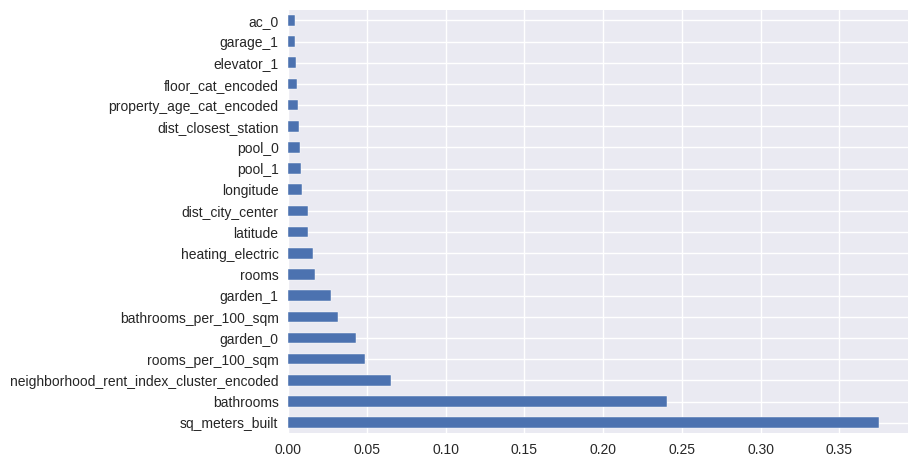

sq_meters_built                            0.374912
bathrooms                                  0.240639
neighborhood_rent_index_cluster_encoded    0.065236
rooms_per_100_sqm                          0.048994
garden_0                                   0.043345
bathrooms_per_100_sqm                      0.031479
garden_1                                   0.027108
rooms                                      0.017001
heating_electric                           0.015657
latitude                                   0.012793
dist_city_center                           0.012373
longitude                                  0.008754
pool_1                                     0.008303
pool_0                                     0.007456
dist_closest_station                       0.007154
property_age_cat_encoded                   0.006438
floor_cat_encoded                          0.005612
elevator_1                                 0.004900
garage_1                                   0.004102
ac_0        

In [768]:
# aplicamos ExtraTreesRegressor
perform_extra_trees_regressor(df = oe_data, 
                                  target_col= TARGET_VARIABLE, 
                                  figsize = (10, 15), 
                                  #encoder, 
                                  ohe_cols = ohe_cols, 
                                  #le_cols,
                                  n_estimators = 100, 
                                  criterion = 'squared_error', 
                                  max_features = 1.0, 
                                  k = 20)

Las puntuaciones de importancia de los atributos que obtiene del modelo nos indican qué atributos tienen un mayor impacto en el precio predicho:
- Observamos que según el modelo, sq_meters_built es el atributo más importante para predecir el precio de la vivienda, seguida de bathrooms y neighborhood_rent_index_cluster_encoded. 

- Otras características como rooms_per_100_sqm, garden y bathrooms_per_100_sqm también tienen puntuaciones de importancia relativamente altas.

- Esta información nos puede ser útil para la selección de atributos en fases posteriores del proceso de modelado.

## Feature selection y reducción de la dimensionalidad

En el apartado "Eliminación de variables no útiles" ya eliminamos algunas variables que no eran útiles para realizar predicciones, como 'sq_meters', 'year_built' y 'neighborhood_rent_index':
- Nos quedamos con 'sq_meters_built' y eliminamos 'sq_meters'.
- Creamos la variables categórica 'property_age_cat' (sin valores nulos) a partir de 'year_built' y 'property_age'.
- A partir de 'neighborhood' creamos 'neighborhood_rent_index' y 'neighborhood_rent_index_cluster', donde al final decidimos eliminar 'neighborhood_rent_index' y quedarnos con 'neighborhood_rent_index_cluster'.

In [776]:
# dimensión sales_simplified_df
sales_simplified_df.shape

(4677, 28)

Variables con valores nulos:

	- 'floor':  1680
	- 'property_age':  1415


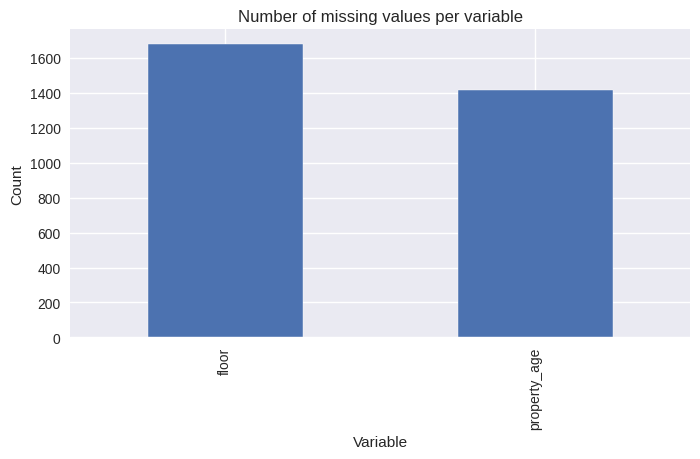

In [774]:
# missing values
count_null_values(sales_simplified_df)

- Nos quedan los valores nulos de las variables floor y property_age, pero hemos creado a partir de estas variables otras variables categóricas (floor_cat y property_age_cat) sin missing values. Por tanto, podemos eliminarlas. 

In [777]:
# eliminamos floor y property_age
cols_missing_val = ['floor','property_age']
sales_simplified_df.drop(cols_missing_val, axis=1, inplace=True)
sales_simplified_df.shape

(4677, 26)

In [778]:
# missing values
count_null_values(sales_simplified_df)

No se encontraron valores nulos en el dataset.



- Hemos eliminado los missing values de nuestro dataset. 


In [780]:
explore_data(sales_simplified_df)

The dataset includes 4677 instances (rows) and 26 variables (columns).



price   latitude  longitude  sq_meters_built  rooms  bathrooms balcony  \
0  2290000  41.409071   2.099850              532      5          6       1   
1    90000  41.434545   2.171110               50      1          1       0   
2   145000  41.444518   2.175309               53      3          1       1   
3   675000  41.392209   2.153368              120      4          2       0   
4   319000  41.413385   2.162246               69      3          1       0   

  terrace exterior orientation rooftop elevator pool ac     heating  \
0       1        0         sur       0        0    1  1  individual   
1       0        1       norte       0        1    0  1       bomba   
2       0        1     Unknown       0        0    0  0     Unknown   
3       1        0       norte       1        1    0  1  individual   
4       0        1     Unknown       1        1    0  0     Unknown   

                             neighborhood  dist_city_center garage  \
0  Vallvidrera - El Tibidabo i les Planes          6.302847      1   
1       Can Peguera - El Turó de la Peira          5.189265      0   
2                                  Verdun          6.313668      0   
3         L'Antiga Esquerra de l'Eixample          1.462060      0   
4                        El Baix Guinardó          2.906147      0   

          property_type garden  dist_closest_station property_age_cat  \
0  chalet_independiente      1              2.949904           0 - 40   
1                  piso      0              0.329115          40 - 70   
2                  piso      0              0.284071          Unknown   
3                 atico      0              0.443717          40 - 70   
4                  piso      0              0.371854         70 - 120   

  floor_cat neighborhood_rent_index_cluster  rooms_per_100_sqm  \
0     0 - 4                     3371 - 5042           0.939850   
1   Unknown                        0 - 2337           2.000000   
2     0 - 4                        0 - 2337           5.660377   
3   Unknown                     3371 - 5042           3.333333   
4    5 - 11                     3371 - 5042           4.347826   

   bathrooms_per_100_sqm  
0               1.127820  
1               2.000000  
2               1.886792  
3               1.666667  
4               1.449275



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 0 to 4676
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   price                            4677 non-null   int64   
 1   latitude                         4677 non-null   float64 
 2   longitude                        4677 non-null   float64 
 3   sq_meters_built                  4677 non-null   int64   
 4   rooms                            4677 non-null   int64   
 5   bathrooms                        4677 non-null   int64   
 6   balcony                          4677 non-null   category
 7   terrace                          4677 non-null   category
 8   exterior                         4677 non-null   category
 9   orientation                      4677 non-null   category
 10  rooftop                          4677 non-null   category
 11  elevator                         4677 non-null   category
 12  pool

price     latitude    longitude  sq_meters_built        rooms  \
count  4.677000e+03  4677.000000  4677.000000      4677.000000  4677.000000   
mean   3.581391e+05    41.406605     2.168259        86.017746     2.581997   
std    4.965949e+05     0.026132     0.022778        67.622299     1.161822   
min    2.800000e+04    41.355002     2.092727        13.000000     0.000000   
25%    1.350000e+05    41.382507     2.153542        55.000000     2.000000   
50%    1.870000e+05    41.404373     2.170357        68.000000     3.000000   
75%    3.900000e+05    41.424723     2.180815        92.000000     3.000000   
max    9.500000e+06    41.465303     2.220785       970.000000    11.000000   

         bathrooms  dist_city_center  dist_closest_station  rooms_per_100_sqm  \
count  4677.000000       4677.000000           4677.000000        4677.000000   
mean      1.411375          3.502737              0.360227           3.378910   
std       0.794350          2.034107              0.283624           1.693692   
min       1.000000          0.075001              0.003595           0.000000   
25%       1.000000          1.749035              0.212806           2.439024   
50%       1.000000          3.361964              0.311484           3.448276   
75%       2.000000          4.915237              0.421032           4.347826   
max       9.000000          8.627149              4.203571          55.555556   

       bathrooms_per_100_sqm  
count            4677.000000  
mean                1.843792  
std                 1.088450  
min                 0.227273  
25%                 1.428571  
50%                 1.666667  
75%                 2.083333  
max                52.941176


 Number of duplicates: 4


Para dar por cerrado este apartado, nos hemos dado cuenta que para property_type sólo había 2 valores nulos en el dataset inicial, antes de dividirlo en train y test data. Como hemos visto, estos dos valores nulos se encuentran en el dataset de train, por lo que en el de test no habrá ninguno. Esto nos puede llevar problemas, ya que por ejemplo, a la hora de codificar la variable property_type, si usamos por ejemplo OHE, en el dataset de train habrá una columna más (property_type_Unknown) que en el de test. 

Debido a esto y a que eliminar 2 filas de el dataset de train (que tiene 4677 instancias) no supone un problema de pérdida de información. Por tanto, eliminaremos estas 2 filas dónde se encuentran los valores nulos.


In [1040]:
sales_simplified_df.property_type.value_counts()

piso                    4086
atico                    235
estudio                  177
duplex                    75
chalet                    36
chalet_adosado            28
chalet_independiente      26
chalet_pareado            12
Unknown                    2
Name: property_type, dtype: int64

In [1041]:
# eliminamos las filas donde property_type es Unknown:
sales_simplified_df.drop(sales_simplified_df[sales_simplified_df['property_type'] == 'Unknown'].index, inplace=True)
sales_simplified_df.property_type.value_counts()

piso                    4086
atico                    235
estudio                  177
duplex                    75
chalet                    36
chalet_adosado            28
chalet_independiente      26
chalet_pareado            12
Unknown                    0
Name: property_type, dtype: int64

In [1045]:
sales_simplified_df.shape

(4675, 26)

In [1057]:
# guardamos en csv
sales_simplified_df.to_csv('train_data_preprocessed.csv', index=False)

In [427]:
# cargamos el dataset de train
sales_simplified_df = pd.read_csv('train_data_preprocessed.csv', delimiter = ',')
# convertimos object a category
sales_simplified_df = convert_object_to_category(sales_simplified_df)

## Test dataset pre-processing

Es importante preprocesar el conjunto de datos de test del mismo modo que el conjunto de datos de entrenamiento. Esto garantiza que los datos de prueba se representen en el mismo formato y escala que los datos de entrenamiento, lo cual es necesario para obtener predicciones precisas.

Procesamos el conjunto de datos de prueba siguiendo los mismos pasos que utilizamos para preprocesar el conjunto de datos de entrenamiento. 



In [240]:
class DataPreprocessor:
    target=TARGET_VARIABLE
    not_useful_vars = ['id', 
                       'doorman', 
                       'quality', 
                       'city', 
                       'currency', 
                       'furniture', 
                       'closest_station',
                       'created_at',
                       'last_seen'
                      ]
    def test_data_preprocessor(self, file_path):
        self.load_data(file_path)
        self.initial_feature_selection()
        self.replace_binary_cols_nulls_by_zero()
        self.convert_binary_to_category()
        self.property_age_cat()
        self.missing_values()
        self.floor_cat()
        self.dim_reduction_neighborhood()
        self.convert_object_to_category()
        self.bathrooms_roms_per_100_sqm()
        self.feature_selection_2()

    def load_data(self, file_path):
        self.df = pd.read_csv(file_path, delimiter=',').copy()

        
    def initial_feature_selection(self):
        self.df.drop(self.not_useful_vars, axis=1, inplace=True)

    
    def get_binary_cols(self) -> list[str]:
        """
        Returns a list with the names of the binary variables in a Pandas DataFrame.

        Parameters:
            None
            
        Returns:
            A list with the names of the binary variables in the DataFrame.
        """
        binary_cols = [col for col in self.df if (len(self.df[col].value_counts()) > 0) and all(self.df[col].value_counts().index.isin([0, 1]))]

        return binary_cols
    
    
    def replace_binary_cols_nulls_by_zero(self) -> None:
        """
        Replaces missing values in binary columns of a pandas DataFrame with 0.

        Parameters:
            None

        Returns: 
            None    
        """
        binary_cols = self.get_binary_cols()
        if binary_cols:
            self.df.loc[:, binary_cols] = self.df.loc[:, binary_cols].fillna(0)
    
    def convert_binary_to_category(self) -> None: 
        # primero las convertimos a int64 para eliminar los decimales: 0 y 1
        self.df[get_binary_cols(self.df)] = self.df[get_binary_cols(self.df)].astype("int64")
        # luego las convertimos a 'category': '0' y '1'
        self.df[get_binary_cols(self.df)] = self.df[get_binary_cols(self.df)].astype("category")
        
    
    def property_age_conditions(self, x: float) -> str:
        """
        Assigns a property age range label to a property age value.

        Parameters:
            x (float): The property age value.

        Returns:
            str: The label for the property age range that the value falls into.
        """
        if pd.isna(x):  # check for NaN values
            return "Unknown"
        elif x < 0: # viviendas dónde no tengo valores (missing values)
            return "Unknown"
        elif 0 <= x <= 40:  # entre 0 y 40 años
            return "0 - 40"
        elif 40 < x <= 70:  # entre 41 y 70 años
            return "40 - 70"
        elif 70 < x <= 120:  # entre 71 y 120 años
            return "70 - 120"
        elif 120 < x <= 150:  # entre 121 y 150 años
            return "120 - 150"
        elif x > 150:  # más de 150 años
            return "+150"
        else:
            return "Unknown"

    def property_age_cat(self) -> None: 
        # Creamos la edad (años) de la vivienda:
        self.df['property_age'] = 2023 - self.df['year_built']
        # aplicamos la función a la columna 'property_age' del DataFrame  
        self.df['property_age_cat'] = self.df['property_age'].apply(property_age_conditions)

    def missing_values(self) -> None:
        # variables categóricas con missing values que queremos convertir a categoría 'Unknown'
        cat_features_na_to_unknown = ['property_type', 
                                      'orientation', 
                                      'heating'
                                      ]
        # Fill missing values with 'Unknown' for all columns
        for col in cat_features_na_to_unknown:
            if col == 'heating':
                self.df[col].fillna('Unknown', inplace=True)
                self.df[col].replace('na', 'Unknown', inplace=True)
            else:
                self.df[col].fillna('Unknown', inplace=True)
    
    def conditions_floor(self, x: float) -> str:
        """
        Categorize floors of a property 

        Parameters:
        x (Union[float, int]): Number of floors of a property

        Returns:
        str: Categorized floor of the property
        """
        if pd.isna(x):  # check for NaN values
            return "Unknown"
        elif x < 0: # viviendas dónde no tengo valores (missing values)
            return "Unknown"
        elif ((x >= 0) & (x <= 4)): # viviendas entre 0 y 4 pisos
            return "0 - 4"
        elif ((x >= 5) & (x <= 11)): # viviendas entre 5 y 11 pisos
            return "5 - 11"
        elif ((x > 11)): # viviendas con más de 11 pisos
            return "+11"
        else:
            return "Unknown"

    def floor_cat(self) -> None:
        # aplicamos la función a la columna 'floor' del DataFrame  
        self.df['floor_cat'] =  self.df['floor'].apply(conditions_floor)
    
    
    # asignamos tiers
    def assign_price_tier_cluster(self, x: float) -> str:
        if x < 0:
            return "Unknown"
        elif ((x >= 0) & (x < 2337)): # bajo 
            return "0 - 2337" # cluster 2 

        elif ((x >= 2337) & (x < 3371)): # medio - bajo  
            return "2337 - 3371" # cluster 1

        elif ((x >= 3371) & (x < 5042)): # medio - alto
            return "3371 - 5042" # cluster 6 y 5

        elif ((x >= 5042)): # alto
            return "+5042" # cluster 4 y 3
        else:
            return "Unknown"

    def dim_reduction_neighborhood(self) -> None: 
        neighborhood_df = self.df[['neighborhood', 'price', 'sq_meters_built']].groupby('neighborhood', as_index=False).agg(
            # Number of instances per category
            category_count=('price', "count"),
            # Mean price
            mean_price=('price', "mean"),
            # Median price
            mean_sq_meters_built=('sq_meters_built', "mean"),
            # Median price
            median_price=('price', "median"),
            # Median price
            median_sq_meters_built=('sq_meters_built', "median"))

        neighborhood_df['mean_price_per_sq_meters_built'] = neighborhood_df['mean_price'] / neighborhood_df['mean_sq_meters_built']
        neighborhood_df['median_price_per_sq_meters_built'] = neighborhood_df['median_price'] / neighborhood_df['median_sq_meters_built']

        neighborhood_df['neighborhood_rent_index_cluster'] = neighborhood_df['median_price_per_sq_meters_built'].apply(assign_price_tier_cluster)

        # agregamos esta información el modelo de datos:
        neighborhood_mapping = neighborhood_df[['neighborhood', 'neighborhood_rent_index_cluster']]
        self.df = pd.merge(self.df, neighborhood_mapping, on='neighborhood', how='left')
        
        
    ###### Convertimos las categóricas de object a category ########
    def convert_object_to_category(self) -> pd.DataFrame:
        """
        Convert object columns in a pandas dataframe to category data type.

        Parameters:
        df (pd.DataFrame): Input pandas dataframe

        Returns:
        pd.DataFrame: A copy of the input dataframe with object columns converted to category data type.
        """    
        # loop through columns and convert object columns to category
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                self.df[col] = self.df[col].astype('category')

        return self.df


    ####### Tratamiento de sq_meters_built en relación al número de habitaciones y de baños #######
    def bathrooms_roms_per_100_sqm(self) -> None: 
        self.df['rooms_per_100_sqm'] = self.df['rooms'] * 100 / self.df['sq_meters_built']
        self.df['bathrooms_per_100_sqm'] = self.df['bathrooms'] * 100 / self.df['sq_meters_built']

    def feature_selection_2(self) -> None:
        ########## Feature Selection 2: Eliminación de variables no útiles #########
        # variables a eliminar 
        not_useful_vars = ['year_built', 'sq_meters', 'floor','property_age']
        # eliminamos not_useful_vars
        self.df.drop(not_useful_vars, axis=1, inplace=True)

In [991]:
file_path = 'test_data.csv'

data_preprocessor = DataPreprocessor()
data_preprocessor.test_data_preprocessor(file_path)

# guardamos en csv
data_preprocessor.df.to_csv('test_data_preprocessed.csv', index=False)

In [417]:
# cargamos el dataset de test preprocesado
test_data_preprocessed = pd.read_csv('test_data_preprocessed.csv', delimiter=',')
# convertimos object a category
test_data_preprocessed = convert_object_to_category(test_data_preprocessed)

explore_data(test_data_preprocessed)

The dataset includes 1170 instances (rows) and 26 variables (columns).



price   latitude  longitude  sq_meters_built  rooms  bathrooms  balcony  \
0   133000  41.421077   2.213120               76      3          1        0   
1   485000  41.380788   2.152472              130      4          2        0   
2   265000  41.406803   2.183533               77      3          1        0   
3   154500  41.433890   2.172277               61      2          1        1   
4  1200000  41.393411   2.145017              120      3          2        0   

   terrace  exterior orientation  rooftop  elevator  pool  ac  heating  \
0        0         1     Unknown        0         1     0   0      gas   
1        0         0     Unknown        0         1     0   0  Unknown   
2        0         1       norte        0         1     0   1  Unknown   
3        0         1     Unknown        0         1     0   0      gas   
4        0         1         sur        0         1     0   1      gas   

                     neighborhood  dist_city_center  garage property_type  \
0                      Sant Martí          5.158288       0          piso   
1  La Nova Esquerra de l'Eixample          1.657143       0          piso   
2      El Camp de l'Arpa del Clot          2.389801       0          piso   
3                           Porta          5.119194       0          piso   
4          Sant Gervasi - Galvany          2.166588       0          piso   

   garden  dist_closest_station property_age_cat floor_cat  \
0       0              0.272653          40 - 70     0 - 4   
1       0              0.245719         70 - 120   Unknown   
2       0              0.084520          40 - 70    5 - 11   
3       0              0.355555          40 - 70     0 - 4   
4       0              0.735841         70 - 120     0 - 4   

  neighborhood_rent_index_cluster  rooms_per_100_sqm  bathrooms_per_100_sqm  
0                     2337 - 3371           3.947368               1.315789  
1                     3371 - 5042           3.076923               1.538462  
2                     3371 - 5042           3.896104               1.298701  
3                     2337 - 3371           3.278689               1.639344  
4                           +5042           2.500000               1.666667



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   price                            1170 non-null   int64   
 1   latitude                         1170 non-null   float64 
 2   longitude                        1170 non-null   float64 
 3   sq_meters_built                  1170 non-null   int64   
 4   rooms                            1170 non-null   int64   
 5   bathrooms                        1170 non-null   int64   
 6   balcony                          1170 non-null   int64   
 7   terrace                          1170 non-null   int64   
 8   exterior                         1170 non-null   int64   
 9   orientation                      1170 non-null   category
 10  rooftop                          1170 non-null   int64   
 11  elevator                         1170 non-null   int64   
 12  pool

price     latitude    longitude  sq_meters_built        rooms  \
count  1.170000e+03  1170.000000  1170.000000      1170.000000  1170.000000   
mean   4.050583e+05    41.406164     2.167129        89.911966     2.647863   
std    6.442154e+05     0.025809     0.023118        67.150712     1.130085   
min    2.900000e+04    41.355143     2.099004        10.000000     0.000000   
25%    1.396000e+05    41.383035     2.152141        57.000000     2.000000   
50%    2.025000e+05    41.403535     2.169455        70.000000     3.000000   
75%    4.147500e+05    41.424744     2.180327       100.000000     3.000000   
max    9.500000e+06    41.464340     2.220334       807.000000     8.000000   

         bathrooms      balcony      terrace     exterior      rooftop  \
count  1170.000000  1170.000000  1170.000000  1170.000000  1170.000000   
mean      1.453846     0.385470     0.262393     0.735897     0.070940   
std       0.844652     0.486914     0.440123     0.441043     0.256835   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     1.000000     0.000000   
75%       2.000000     1.000000     1.000000     1.000000     0.000000   
max       7.000000     1.000000     1.000000     1.000000     1.000000   

          elevator         pool           ac  dist_city_center       garage  \
count  1170.000000  1170.000000  1170.000000       1170.000000  1170.000000   
mean      0.600000     0.039316     0.462393          3.494901     0.070940   
std       0.490107     0.194429     0.498797          1.980491     0.256835   
min       0.000000     0.000000     0.000000          0.074264     0.000000   
25%       0.000000     0.000000     0.000000          1.782861     0.000000   
50%       1.000000     0.000000     0.000000          3.415416     0.000000   
75%       1.000000     0.000000     1.000000          4.787665     0.000000   
max       1.000000     1.000000     1.000000          8.522102     1.000000   

            garden  dist_closest_station  rooms_per_100_sqm  \
count  1170.000000           1170.000000        1170.000000   
mean      0.009402              0.367251           3.403759   
std       0.096547              0.295759           2.202354   
min       0.000000              0.014215           0.000000   
25%       0.000000              0.217491           2.439024   
50%       0.000000              0.315010           3.380309   
75%       0.000000              0.429002           4.347826   
max       1.000000              3.549846          50.000000   

       bathrooms_per_100_sqm  
count            1170.000000  
mean                1.847461  
std                 1.893766  
min                 0.558659  
25%                 1.388889  
50%                 1.666667  
75%                 2.000000  
max                50.000000


 Number of duplicates: 0
